In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

/home/raflicky/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
def clean_data(path = "/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/folder_acciones"):
    files = os.listdir(path)
    df = pd.read_csv(path + "/" + files[0])
    df = df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
    df.columns = ["Date", files[0]]
    for file in files[1:]:
        stock_price = pd.read_csv(path + "/" + file)
        stock_price = stock_price.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
        stock_price.columns = ["Date", file]
        df = pd.merge(stock_price, df, how='left',on='Date')
    return df

In [5]:
def import_some_files(path = "/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/tipo_cambio"):
    files = os.listdir(path)
    dfs = []
    for file in files:
        some_df = pd.read_csv(path + "/" + file)
        dfs.append(some_df)
    return dfs

In [6]:
def merge_common_dates(dataframe, series):
    df = dataframe
    series = series.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
    df = pd.merge(df, series, how='left',on='Date')
    return df

In [7]:
path = ("/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/modified")
files = os.listdir(path)
BMV = pd.read_csv(path + "/" + files[0])

In [8]:
eur_usd, usd_mxn = import_some_files()

In [9]:
all_variables = merge_common_dates(BMV, eur_usd)
all_variables = merge_common_dates(all_variables, usd_mxn)

In [10]:
all_variables = all_variables.fillna(method='ffill')
all_variables = all_variables.fillna(0)

In [11]:
my_data_frame_sum = all_variables.iloc[:,2]
my_data_frame = all_variables.drop(['Date', 'Adj Close.1'], axis=1)

In [12]:
#my_data_frame.to_csv("theXs")      
#my_data_frame_sum.to_csv("theYs")

In [13]:
working_data = my_data_frame.iloc[0:1000]
working_data_sum = my_data_frame_sum.iloc[0:1000]
validate_data = my_data_frame.iloc[1000:]
validate_data_sum = my_data_frame_sum.iloc[1000:]

In [14]:
my_x = working_data.iloc[:,1:]
my_y = working_data_sum

In [15]:
import random
def next_batch2(dataframe, dataframe2, features):

    
    data = dataframe.values
    data2 = dataframe2.values

    X = data[:-1].reshape(len(data)-1,1,features)
    Y = data2[1:].reshape(len(data2)-1)
        
    return X, Y

In [16]:
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)

In [17]:
validateX, validateY = next_batch2(validate_data.iloc[:,1:], validate_data_sum, 36)

In [18]:
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras import backend as K; K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=32, inter_op_parallelism_threads=32)))

Using TensorFlow backend.


In [27]:
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

Train on 999 samples, validate on 999 samples
Epoch 1/10000
 - 3s - loss: 4.7532 - val_loss: 4.9982
Epoch 2/10000
 - 1s - loss: 3.0910 - val_loss: 4.4059
Epoch 3/10000
 - 1s - loss: 2.4158 - val_loss: 4.1531
Epoch 4/10000
 - 1s - loss: 2.0245 - val_loss: 4.1926
Epoch 5/10000
 - 1s - loss: 1.8186 - val_loss: 3.7947
Epoch 6/10000
 - 1s - loss: 1.5081 - val_loss: 3.9534
Epoch 7/10000
 - 1s - loss: 1.4933 - val_loss: 4.0915
Epoch 8/10000
 - 1s - loss: 1.3496 - val_loss: 3.8788
Epoch 9/10000
 - 1s - loss: 1.2484 - val_loss: 3.5616
Epoch 10/10000
 - 1s - loss: 1.0476 - val_loss: 3.2884
Epoch 11/10000
 - 1s - loss: 0.9323 - val_loss: 2.6608
Epoch 12/10000
 - 1s - loss: 0.8185 - val_loss: 2.8559
Epoch 13/10000
 - 1s - loss: 0.7242 - val_loss: 2.2991
Epoch 14/10000
 - 1s - loss: 0.6638 - val_loss: 2.1124
Epoch 15/10000
 - 1s - loss: 0.6057 - val_loss: 1.5825
Epoch 16/10000
 - 1s - loss: 0.5677 - val_loss: 1.6412
Epoch 17/10000
 - 1s - loss: 0.5997 - val_loss: 1.7518
Epoch 18/10000
 - 1s - loss:

Epoch 149/10000
 - 1s - loss: 0.4859 - val_loss: 0.4733
Epoch 150/10000
 - 1s - loss: 0.5045 - val_loss: 0.4755
Epoch 151/10000
 - 1s - loss: 0.4669 - val_loss: 0.4812
Epoch 152/10000
 - 1s - loss: 0.5038 - val_loss: 0.4899
Epoch 153/10000
 - 1s - loss: 0.4784 - val_loss: 0.4723
Epoch 154/10000
 - 1s - loss: 0.4729 - val_loss: 0.4686
Epoch 155/10000
 - 1s - loss: 0.4652 - val_loss: 0.4848
Epoch 156/10000
 - 1s - loss: 0.4752 - val_loss: 0.4715
Epoch 157/10000
 - 1s - loss: 0.4636 - val_loss: 0.4690
Epoch 158/10000
 - 1s - loss: 0.4512 - val_loss: 0.4721
Epoch 159/10000
 - 1s - loss: 0.5036 - val_loss: 0.4784
Epoch 160/10000
 - 1s - loss: 0.4493 - val_loss: 0.4750
Epoch 161/10000
 - 1s - loss: 0.4709 - val_loss: 0.4798
Epoch 162/10000
 - 1s - loss: 0.4985 - val_loss: 0.4742
Epoch 163/10000
 - 1s - loss: 0.4927 - val_loss: 0.4860
Epoch 164/10000
 - 1s - loss: 0.4748 - val_loss: 0.4840
Epoch 165/10000
 - 1s - loss: 0.4612 - val_loss: 0.4829
Epoch 166/10000
 - 1s - loss: 0.5234 - val_loss:

Epoch 296/10000
 - 1s - loss: 0.4445 - val_loss: 0.4654
Epoch 297/10000
 - 1s - loss: 0.4912 - val_loss: 0.4705
Epoch 298/10000
 - 1s - loss: 0.4751 - val_loss: 0.4903
Epoch 299/10000
 - 1s - loss: 0.4230 - val_loss: 0.4871
Epoch 300/10000
 - 1s - loss: 0.4169 - val_loss: 0.4800
Epoch 301/10000
 - 1s - loss: 0.5475 - val_loss: 0.4549
Epoch 302/10000
 - 1s - loss: 0.4638 - val_loss: 0.4904
Epoch 303/10000
 - 1s - loss: 0.5498 - val_loss: 0.4959
Epoch 304/10000
 - 1s - loss: 0.4545 - val_loss: 0.4866
Epoch 305/10000
 - 1s - loss: 0.4741 - val_loss: 0.4775
Epoch 306/10000
 - 1s - loss: 0.5171 - val_loss: 0.4890
Epoch 307/10000
 - 1s - loss: 0.5066 - val_loss: 0.4882
Epoch 308/10000
 - 1s - loss: 0.4803 - val_loss: 0.4719
Epoch 309/10000
 - 1s - loss: 0.4841 - val_loss: 0.4725
Epoch 310/10000
 - 1s - loss: 0.4676 - val_loss: 0.4627
Epoch 311/10000
 - 1s - loss: 0.5061 - val_loss: 0.4656
Epoch 312/10000
 - 1s - loss: 0.4917 - val_loss: 0.4743
Epoch 313/10000
 - 1s - loss: 0.4766 - val_loss:

Epoch 443/10000
 - 1s - loss: 0.4827 - val_loss: 0.5161
Epoch 444/10000
 - 1s - loss: 0.5538 - val_loss: 0.5140
Epoch 445/10000
 - 1s - loss: 0.4387 - val_loss: 0.5073
Epoch 446/10000
 - 1s - loss: 0.5105 - val_loss: 0.5079
Epoch 447/10000
 - 1s - loss: 0.4685 - val_loss: 0.5052
Epoch 448/10000
 - 1s - loss: 0.5327 - val_loss: 0.5015
Epoch 449/10000
 - 1s - loss: 0.4386 - val_loss: 0.4912
Epoch 450/10000
 - 1s - loss: 0.4744 - val_loss: 0.4941
Epoch 451/10000
 - 1s - loss: 0.5027 - val_loss: 0.5109
Epoch 452/10000
 - 1s - loss: 0.4710 - val_loss: 0.5194
Epoch 453/10000
 - 1s - loss: 0.5010 - val_loss: 0.5030
Epoch 454/10000
 - 1s - loss: 0.4972 - val_loss: 0.5007
Epoch 455/10000
 - 1s - loss: 0.4598 - val_loss: 0.5108
Epoch 456/10000
 - 1s - loss: 0.5140 - val_loss: 0.4996
Epoch 457/10000
 - 1s - loss: 0.4676 - val_loss: 0.4827
Epoch 458/10000
 - 1s - loss: 0.4599 - val_loss: 0.5207
Epoch 459/10000
 - 1s - loss: 0.4634 - val_loss: 0.5010
Epoch 460/10000
 - 1s - loss: 0.4702 - val_loss:

Epoch 590/10000
 - 1s - loss: 0.4825 - val_loss: 0.5049
Epoch 591/10000
 - 1s - loss: 0.4547 - val_loss: 0.5231
Epoch 592/10000
 - 1s - loss: 0.4817 - val_loss: 0.5227
Epoch 593/10000
 - 1s - loss: 0.4929 - val_loss: 0.4946
Epoch 594/10000
 - 1s - loss: 0.4864 - val_loss: 0.4488
Epoch 595/10000
 - 1s - loss: 0.4576 - val_loss: 0.4586
Epoch 596/10000
 - 1s - loss: 0.4845 - val_loss: 0.5155
Epoch 597/10000
 - 1s - loss: 0.4705 - val_loss: 0.4968
Epoch 598/10000
 - 1s - loss: 0.4567 - val_loss: 0.4752
Epoch 599/10000
 - 1s - loss: 0.4925 - val_loss: 0.4565
Epoch 600/10000
 - 1s - loss: 0.5108 - val_loss: 0.5030
Epoch 601/10000
 - 1s - loss: 0.4959 - val_loss: 0.5035
Epoch 602/10000
 - 1s - loss: 0.4553 - val_loss: 0.5076
Epoch 603/10000
 - 1s - loss: 0.4743 - val_loss: 0.5110
Epoch 604/10000
 - 1s - loss: 0.4815 - val_loss: 0.5146
Epoch 605/10000
 - 1s - loss: 0.4723 - val_loss: 0.5065
Epoch 606/10000
 - 1s - loss: 0.4718 - val_loss: 0.4969
Epoch 607/10000
 - 1s - loss: 0.5291 - val_loss:

Epoch 737/10000
 - 1s - loss: 0.4634 - val_loss: 0.4570
Epoch 738/10000
 - 1s - loss: 0.4167 - val_loss: 0.5085
Epoch 739/10000
 - 1s - loss: 0.4871 - val_loss: 0.4891
Epoch 740/10000
 - 1s - loss: 0.4237 - val_loss: 0.5069
Epoch 741/10000
 - 1s - loss: 0.5257 - val_loss: 0.4882
Epoch 742/10000
 - 1s - loss: 0.4906 - val_loss: 0.4522
Epoch 743/10000
 - 1s - loss: 0.4444 - val_loss: 0.4837
Epoch 744/10000
 - 1s - loss: 0.4307 - val_loss: 0.4899
Epoch 745/10000
 - 1s - loss: 0.4955 - val_loss: 0.4882
Epoch 746/10000
 - 1s - loss: 0.4715 - val_loss: 0.4842
Epoch 747/10000
 - 1s - loss: 0.4526 - val_loss: 0.4910
Epoch 748/10000
 - 1s - loss: 0.4326 - val_loss: 0.5192
Epoch 749/10000
 - 1s - loss: 0.4503 - val_loss: 0.5098
Epoch 750/10000
 - 1s - loss: 0.4953 - val_loss: 0.4996
Epoch 751/10000
 - 1s - loss: 0.4684 - val_loss: 0.4772
Epoch 752/10000
 - 1s - loss: 0.5759 - val_loss: 0.5020
Epoch 753/10000
 - 1s - loss: 0.5499 - val_loss: 0.4572
Epoch 754/10000
 - 1s - loss: 0.5406 - val_loss:

Epoch 884/10000
 - 1s - loss: 0.4644 - val_loss: 0.4504
Epoch 885/10000
 - 1s - loss: 0.4757 - val_loss: 0.4633
Epoch 886/10000
 - 1s - loss: 0.4763 - val_loss: 0.4656
Epoch 887/10000
 - 1s - loss: 0.4563 - val_loss: 0.4475
Epoch 888/10000
 - 1s - loss: 0.4769 - val_loss: 0.4521
Epoch 889/10000
 - 1s - loss: 0.4481 - val_loss: 0.4568
Epoch 890/10000
 - 1s - loss: 0.4478 - val_loss: 0.4822
Epoch 891/10000
 - 1s - loss: 0.4551 - val_loss: 0.4649
Epoch 892/10000
 - 1s - loss: 0.4885 - val_loss: 0.4563
Epoch 893/10000
 - 1s - loss: 0.4784 - val_loss: 0.4541
Epoch 894/10000
 - 1s - loss: 0.5823 - val_loss: 0.4671
Epoch 895/10000
 - 1s - loss: 0.5018 - val_loss: 0.4473
Epoch 896/10000
 - 1s - loss: 0.4349 - val_loss: 0.4459
Epoch 897/10000
 - 1s - loss: 0.4621 - val_loss: 0.4344
Epoch 898/10000
 - 1s - loss: 0.4518 - val_loss: 0.4515
Epoch 899/10000
 - 1s - loss: 0.4650 - val_loss: 0.4427
Epoch 900/10000
 - 1s - loss: 0.4752 - val_loss: 0.4482
Epoch 901/10000
 - 1s - loss: 0.4723 - val_loss:

Epoch 1030/10000
 - 1s - loss: 0.5707 - val_loss: 0.4458
Epoch 1031/10000
 - 1s - loss: 0.4768 - val_loss: 0.4403
Epoch 1032/10000
 - 1s - loss: 0.4618 - val_loss: 0.4508
Epoch 1033/10000
 - 1s - loss: 0.4768 - val_loss: 0.4494
Epoch 1034/10000
 - 1s - loss: 0.4846 - val_loss: 0.4468
Epoch 1035/10000
 - 1s - loss: 0.4775 - val_loss: 0.4491
Epoch 1036/10000
 - 1s - loss: 0.4811 - val_loss: 0.4557
Epoch 1037/10000
 - 1s - loss: 0.5475 - val_loss: 0.4399
Epoch 1038/10000
 - 1s - loss: 0.4809 - val_loss: 0.4537
Epoch 1039/10000
 - 1s - loss: 0.4359 - val_loss: 0.4655
Epoch 1040/10000
 - 1s - loss: 0.4605 - val_loss: 0.4568
Epoch 1041/10000
 - 1s - loss: 0.5126 - val_loss: 0.4351
Epoch 1042/10000
 - 1s - loss: 0.4809 - val_loss: 0.4489
Epoch 1043/10000
 - 1s - loss: 0.4613 - val_loss: 0.4496
Epoch 1044/10000
 - 1s - loss: 0.4624 - val_loss: 0.4420
Epoch 1045/10000
 - 1s - loss: 0.4947 - val_loss: 0.4376
Epoch 1046/10000
 - 1s - loss: 0.4630 - val_loss: 0.4481
Epoch 1047/10000
 - 1s - loss: 

Epoch 1174/10000
 - 1s - loss: 0.5252 - val_loss: 0.4589
Epoch 1175/10000
 - 1s - loss: 0.4641 - val_loss: 0.4877
Epoch 1176/10000
 - 1s - loss: 0.4957 - val_loss: 0.4551
Epoch 1177/10000
 - 1s - loss: 0.4903 - val_loss: 0.4589
Epoch 1178/10000
 - 1s - loss: 0.4552 - val_loss: 0.4681
Epoch 1179/10000
 - 1s - loss: 0.4841 - val_loss: 0.4547
Epoch 1180/10000
 - 1s - loss: 0.4903 - val_loss: 0.4668
Epoch 1181/10000
 - 1s - loss: 0.5156 - val_loss: 0.4521
Epoch 1182/10000
 - 1s - loss: 0.5169 - val_loss: 0.4591
Epoch 1183/10000
 - 1s - loss: 0.4579 - val_loss: 0.4528
Epoch 1184/10000
 - 1s - loss: 0.4577 - val_loss: 0.4288
Epoch 1185/10000
 - 1s - loss: 0.4483 - val_loss: 0.4777
Epoch 1186/10000
 - 1s - loss: 0.4676 - val_loss: 0.4500
Epoch 1187/10000
 - 1s - loss: 0.4864 - val_loss: 0.4600
Epoch 1188/10000
 - 1s - loss: 0.4882 - val_loss: 0.4560
Epoch 1189/10000
 - 1s - loss: 0.4920 - val_loss: 0.4705
Epoch 1190/10000
 - 1s - loss: 0.5271 - val_loss: 0.4386
Epoch 1191/10000
 - 1s - loss: 

Epoch 1318/10000
 - 1s - loss: 0.4742 - val_loss: 0.4528
Epoch 1319/10000
 - 1s - loss: 0.5075 - val_loss: 0.4516
Epoch 1320/10000
 - 1s - loss: 0.4697 - val_loss: 0.4536
Epoch 1321/10000
 - 1s - loss: 0.4711 - val_loss: 0.4682
Epoch 1322/10000
 - 1s - loss: 0.5401 - val_loss: 0.4464
Epoch 1323/10000
 - 1s - loss: 0.4554 - val_loss: 0.4657
Epoch 1324/10000
 - 1s - loss: 0.4546 - val_loss: 0.4637
Epoch 1325/10000
 - 1s - loss: 0.4666 - val_loss: 0.4432
Epoch 1326/10000
 - 1s - loss: 0.4997 - val_loss: 0.4430
Epoch 1327/10000
 - 1s - loss: 0.4588 - val_loss: 0.4616
Epoch 1328/10000
 - 1s - loss: 0.4717 - val_loss: 0.5262
Epoch 1329/10000
 - 1s - loss: 0.5236 - val_loss: 0.4580
Epoch 1330/10000
 - 1s - loss: 0.5535 - val_loss: 0.4395
Epoch 1331/10000
 - 1s - loss: 0.4960 - val_loss: 0.4370
Epoch 1332/10000
 - 1s - loss: 0.4912 - val_loss: 0.4380
Epoch 1333/10000
 - 1s - loss: 0.4517 - val_loss: 0.5020
Epoch 1334/10000
 - 1s - loss: 0.4688 - val_loss: 0.4414
Epoch 1335/10000
 - 1s - loss: 

Epoch 1462/10000
 - 1s - loss: 0.4628 - val_loss: 0.4378
Epoch 1463/10000
 - 1s - loss: 0.4633 - val_loss: 0.4597
Epoch 1464/10000
 - 1s - loss: 0.4938 - val_loss: 0.4624
Epoch 1465/10000
 - 1s - loss: 0.5216 - val_loss: 0.4471
Epoch 1466/10000
 - 1s - loss: 0.4180 - val_loss: 0.4875
Epoch 1467/10000
 - 1s - loss: 0.4964 - val_loss: 0.4422
Epoch 1468/10000
 - 1s - loss: 0.4662 - val_loss: 0.4420
Epoch 1469/10000
 - 1s - loss: 0.5326 - val_loss: 0.4325
Epoch 1470/10000
 - 1s - loss: 0.4532 - val_loss: 0.4469
Epoch 1471/10000
 - 1s - loss: 0.4720 - val_loss: 0.4584
Epoch 1472/10000
 - 1s - loss: 0.5041 - val_loss: 0.4603
Epoch 1473/10000
 - 1s - loss: 0.4935 - val_loss: 0.4557
Epoch 1474/10000
 - 1s - loss: 0.4610 - val_loss: 0.4651
Epoch 1475/10000
 - 1s - loss: 0.4498 - val_loss: 0.4601
Epoch 1476/10000
 - 1s - loss: 0.5441 - val_loss: 0.4573
Epoch 1477/10000
 - 1s - loss: 0.4616 - val_loss: 0.4630
Epoch 1478/10000
 - 1s - loss: 0.4760 - val_loss: 0.4417
Epoch 1479/10000
 - 1s - loss: 

Epoch 1606/10000
 - 1s - loss: 0.4732 - val_loss: 0.4333
Epoch 1607/10000
 - 1s - loss: 0.4355 - val_loss: 0.4609
Epoch 1608/10000
 - 1s - loss: 0.5667 - val_loss: 0.4507
Epoch 1609/10000
 - 2s - loss: 0.4622 - val_loss: 0.4626
Epoch 1610/10000
 - 2s - loss: 0.5041 - val_loss: 0.4482
Epoch 1611/10000
 - 2s - loss: 0.4653 - val_loss: 0.4712
Epoch 1612/10000
 - 1s - loss: 0.4548 - val_loss: 0.4845
Epoch 1613/10000
 - 1s - loss: 0.4714 - val_loss: 0.4436
Epoch 1614/10000
 - 1s - loss: 0.3997 - val_loss: 0.4801
Epoch 1615/10000
 - 1s - loss: 0.5319 - val_loss: 0.4801
Epoch 1616/10000
 - 1s - loss: 0.5475 - val_loss: 0.4573
Epoch 1617/10000
 - 1s - loss: 0.5096 - val_loss: 0.4834
Epoch 1618/10000
 - 1s - loss: 0.4577 - val_loss: 0.4662
Epoch 1619/10000
 - 1s - loss: 0.4712 - val_loss: 0.4782
Epoch 1620/10000
 - 1s - loss: 0.4663 - val_loss: 0.4464
Epoch 1621/10000
 - 1s - loss: 0.4872 - val_loss: 0.4536
Epoch 1622/10000
 - 1s - loss: 0.5157 - val_loss: 0.4400
Epoch 1623/10000
 - 1s - loss: 

Epoch 1750/10000
 - 1s - loss: 0.4943 - val_loss: 0.4878
Epoch 1751/10000
 - 1s - loss: 0.5028 - val_loss: 0.4512
Epoch 1752/10000
 - 1s - loss: 0.5651 - val_loss: 0.4507
Epoch 1753/10000
 - 1s - loss: 0.4731 - val_loss: 0.4580
Epoch 1754/10000
 - 1s - loss: 0.4576 - val_loss: 0.4564
Epoch 1755/10000
 - 1s - loss: 0.4894 - val_loss: 0.4496
Epoch 1756/10000
 - 1s - loss: 0.4766 - val_loss: 0.4413
Epoch 1757/10000
 - 1s - loss: 0.4448 - val_loss: 0.4793
Epoch 1758/10000
 - 1s - loss: 0.4594 - val_loss: 0.4598
Epoch 1759/10000
 - 1s - loss: 0.4596 - val_loss: 0.4599
Epoch 1760/10000
 - 1s - loss: 0.4621 - val_loss: 0.4537
Epoch 1761/10000
 - 1s - loss: 0.4457 - val_loss: 0.4572
Epoch 1762/10000
 - 1s - loss: 0.4269 - val_loss: 0.4376
Epoch 1763/10000
 - 1s - loss: 0.4359 - val_loss: 0.4475
Epoch 1764/10000
 - 1s - loss: 0.5061 - val_loss: 0.4599
Epoch 1765/10000
 - 1s - loss: 0.5591 - val_loss: 0.4745
Epoch 1766/10000
 - 1s - loss: 0.4701 - val_loss: 0.4545
Epoch 1767/10000
 - 1s - loss: 

Epoch 1894/10000
 - 1s - loss: 0.4859 - val_loss: 0.4727
Epoch 1895/10000
 - 1s - loss: 0.4563 - val_loss: 0.4585
Epoch 1896/10000
 - 1s - loss: 0.4599 - val_loss: 0.4665
Epoch 1897/10000
 - 1s - loss: 0.4664 - val_loss: 0.4348
Epoch 1898/10000
 - 1s - loss: 0.4522 - val_loss: 0.4728
Epoch 1899/10000
 - 1s - loss: 0.5185 - val_loss: 0.4364
Epoch 1900/10000
 - 1s - loss: 0.4860 - val_loss: 0.4574
Epoch 1901/10000
 - 1s - loss: 0.4911 - val_loss: 0.4471
Epoch 1902/10000
 - 1s - loss: 0.5536 - val_loss: 0.4616
Epoch 1903/10000
 - 1s - loss: 0.4941 - val_loss: 0.4734
Epoch 1904/10000
 - 1s - loss: 0.4797 - val_loss: 0.4449
Epoch 1905/10000
 - 1s - loss: 0.4853 - val_loss: 0.4594
Epoch 1906/10000
 - 1s - loss: 0.4682 - val_loss: 0.4768
Epoch 1907/10000
 - 1s - loss: 0.4684 - val_loss: 0.4500
Epoch 1908/10000
 - 1s - loss: 0.4589 - val_loss: 0.4637
Epoch 1909/10000
 - 1s - loss: 0.5599 - val_loss: 0.4995
Epoch 1910/10000
 - 1s - loss: 0.4905 - val_loss: 0.4633
Epoch 1911/10000
 - 1s - loss: 

Epoch 2038/10000
 - 1s - loss: 0.5585 - val_loss: 0.4630
Epoch 2039/10000
 - 1s - loss: 0.4570 - val_loss: 0.4561
Epoch 2040/10000
 - 1s - loss: 0.5014 - val_loss: 0.4689
Epoch 2041/10000
 - 1s - loss: 0.4988 - val_loss: 0.4748
Epoch 2042/10000
 - 1s - loss: 0.4475 - val_loss: 0.4797
Epoch 2043/10000
 - 1s - loss: 0.4482 - val_loss: 0.4468
Epoch 2044/10000
 - 1s - loss: 0.4729 - val_loss: 0.4475
Epoch 2045/10000
 - 1s - loss: 0.4731 - val_loss: 0.4399
Epoch 2046/10000
 - 1s - loss: 0.4967 - val_loss: 0.4432
Epoch 2047/10000
 - 1s - loss: 0.4731 - val_loss: 0.4406
Epoch 2048/10000
 - 1s - loss: 0.4971 - val_loss: 0.4297
Epoch 2049/10000
 - 1s - loss: 0.5235 - val_loss: 0.4282
Epoch 2050/10000
 - 1s - loss: 0.4586 - val_loss: 0.4402
Epoch 2051/10000
 - 1s - loss: 0.4718 - val_loss: 0.4390
Epoch 2052/10000
 - 1s - loss: 0.4691 - val_loss: 0.4532
Epoch 2053/10000
 - 1s - loss: 0.4851 - val_loss: 0.4542
Epoch 2054/10000
 - 1s - loss: 0.4751 - val_loss: 0.4391
Epoch 2055/10000
 - 1s - loss: 

Epoch 2182/10000
 - 1s - loss: 0.4714 - val_loss: 0.4586
Epoch 2183/10000
 - 1s - loss: 0.4872 - val_loss: 0.4982
Epoch 2184/10000
 - 1s - loss: 0.4870 - val_loss: 0.4616
Epoch 2185/10000
 - 1s - loss: 0.4593 - val_loss: 0.4823
Epoch 2186/10000
 - 1s - loss: 0.4594 - val_loss: 0.4476
Epoch 2187/10000
 - 1s - loss: 0.4751 - val_loss: 0.4540
Epoch 2188/10000
 - 1s - loss: 0.4785 - val_loss: 0.4637
Epoch 2189/10000
 - 1s - loss: 0.4825 - val_loss: 0.4626
Epoch 2190/10000
 - 1s - loss: 0.4615 - val_loss: 0.4539
Epoch 2191/10000
 - 1s - loss: 0.4640 - val_loss: 0.4574
Epoch 2192/10000
 - 1s - loss: 0.4337 - val_loss: 0.4375
Epoch 2193/10000
 - 1s - loss: 0.4469 - val_loss: 0.4537
Epoch 2194/10000
 - 1s - loss: 0.4569 - val_loss: 0.4721
Epoch 2195/10000
 - 1s - loss: 0.4748 - val_loss: 0.4411
Epoch 2196/10000
 - 1s - loss: 0.4820 - val_loss: 0.4464
Epoch 2197/10000
 - 1s - loss: 0.4573 - val_loss: 0.4453
Epoch 2198/10000
 - 1s - loss: 0.4789 - val_loss: 0.4446
Epoch 2199/10000
 - 1s - loss: 

Epoch 2326/10000
 - 1s - loss: 0.4425 - val_loss: 0.4458
Epoch 2327/10000
 - 1s - loss: 0.4384 - val_loss: 0.4463
Epoch 2328/10000
 - 1s - loss: 0.4892 - val_loss: 0.4485
Epoch 2329/10000
 - 1s - loss: 0.4133 - val_loss: 0.4400
Epoch 2330/10000
 - 1s - loss: 0.4826 - val_loss: 0.4318
Epoch 2331/10000
 - 1s - loss: 0.4563 - val_loss: 0.4466
Epoch 2332/10000
 - 1s - loss: 0.4447 - val_loss: 0.4529
Epoch 2333/10000
 - 1s - loss: 0.4136 - val_loss: 0.4392
Epoch 2334/10000
 - 1s - loss: 0.4551 - val_loss: 0.4438
Epoch 2335/10000
 - 1s - loss: 0.4521 - val_loss: 0.4558
Epoch 2336/10000
 - 1s - loss: 0.4838 - val_loss: 0.4389
Epoch 2337/10000
 - 1s - loss: 0.4889 - val_loss: 0.4473
Epoch 2338/10000
 - 1s - loss: 0.4470 - val_loss: 0.4421
Epoch 2339/10000
 - 1s - loss: 0.4377 - val_loss: 0.4419
Epoch 2340/10000
 - 1s - loss: 0.4507 - val_loss: 0.4302
Epoch 2341/10000
 - 1s - loss: 0.4512 - val_loss: 0.4623
Epoch 2342/10000
 - 1s - loss: 0.4460 - val_loss: 0.4383
Epoch 2343/10000
 - 1s - loss: 

Epoch 2470/10000
 - 1s - loss: 0.5129 - val_loss: 0.4321
Epoch 2471/10000
 - 1s - loss: 0.4905 - val_loss: 0.4270
Epoch 2472/10000
 - 1s - loss: 0.4889 - val_loss: 0.4808
Epoch 2473/10000
 - 1s - loss: 0.4802 - val_loss: 0.4467
Epoch 2474/10000
 - 1s - loss: 0.4868 - val_loss: 0.4766
Epoch 2475/10000
 - 1s - loss: 0.4344 - val_loss: 0.4591
Epoch 2476/10000
 - 1s - loss: 0.4497 - val_loss: 0.4518
Epoch 2477/10000
 - 1s - loss: 0.4784 - val_loss: 0.4688
Epoch 2478/10000
 - 1s - loss: 0.4807 - val_loss: 0.4607
Epoch 2479/10000
 - 1s - loss: 0.4752 - val_loss: 0.4626
Epoch 2480/10000
 - 1s - loss: 0.4844 - val_loss: 0.4785
Epoch 2481/10000
 - 1s - loss: 0.4730 - val_loss: 0.4796
Epoch 2482/10000
 - 1s - loss: 0.4514 - val_loss: 0.4334
Epoch 2483/10000
 - 1s - loss: 0.4712 - val_loss: 0.4416
Epoch 2484/10000
 - 1s - loss: 0.5039 - val_loss: 0.4351
Epoch 2485/10000
 - 1s - loss: 0.4548 - val_loss: 0.4473
Epoch 2486/10000
 - 1s - loss: 0.5109 - val_loss: 0.4556
Epoch 2487/10000
 - 1s - loss: 

Epoch 2614/10000
 - 1s - loss: 0.4486 - val_loss: 0.4788
Epoch 2615/10000
 - 1s - loss: 0.4237 - val_loss: 0.4282
Epoch 2616/10000
 - 1s - loss: 0.4439 - val_loss: 0.4562
Epoch 2617/10000
 - 1s - loss: 0.5081 - val_loss: 0.4679
Epoch 2618/10000
 - 1s - loss: 0.4322 - val_loss: 0.5023
Epoch 2619/10000
 - 1s - loss: 0.4479 - val_loss: 0.4557
Epoch 2620/10000
 - 1s - loss: 0.4211 - val_loss: 0.4951
Epoch 2621/10000
 - 1s - loss: 0.4629 - val_loss: 0.4494
Epoch 2622/10000
 - 1s - loss: 0.4456 - val_loss: 0.4548
Epoch 2623/10000
 - 1s - loss: 0.4489 - val_loss: 0.4773
Epoch 2624/10000
 - 1s - loss: 0.4643 - val_loss: 0.4541
Epoch 2625/10000
 - 1s - loss: 0.4804 - val_loss: 0.4593
Epoch 2626/10000
 - 1s - loss: 0.4817 - val_loss: 0.4546
Epoch 2627/10000
 - 1s - loss: 0.4874 - val_loss: 0.4726
Epoch 2628/10000
 - 1s - loss: 0.4484 - val_loss: 0.4422
Epoch 2629/10000
 - 1s - loss: 0.4685 - val_loss: 0.4564
Epoch 2630/10000
 - 1s - loss: 0.4638 - val_loss: 0.4952
Epoch 2631/10000
 - 1s - loss: 

Epoch 2758/10000
 - 1s - loss: 0.4618 - val_loss: 0.4624
Epoch 2759/10000
 - 1s - loss: 0.4961 - val_loss: 0.4393
Epoch 2760/10000
 - 1s - loss: 0.4296 - val_loss: 0.4440
Epoch 2761/10000
 - 1s - loss: 0.4608 - val_loss: 0.4411
Epoch 2762/10000
 - 1s - loss: 0.4653 - val_loss: 0.4855
Epoch 2763/10000
 - 1s - loss: 0.4527 - val_loss: 0.4430
Epoch 2764/10000
 - 1s - loss: 0.4519 - val_loss: 0.4657
Epoch 2765/10000
 - 1s - loss: 0.4844 - val_loss: 0.4455
Epoch 2766/10000
 - 1s - loss: 0.4443 - val_loss: 0.4586
Epoch 2767/10000
 - 1s - loss: 0.4263 - val_loss: 0.4850
Epoch 2768/10000
 - 1s - loss: 0.4598 - val_loss: 0.4732
Epoch 2769/10000
 - 1s - loss: 0.4948 - val_loss: 0.4376
Epoch 2770/10000
 - 1s - loss: 0.4773 - val_loss: 0.4473
Epoch 2771/10000
 - 1s - loss: 0.5070 - val_loss: 0.4362
Epoch 2772/10000
 - 1s - loss: 0.3913 - val_loss: 0.4721
Epoch 2773/10000
 - 1s - loss: 0.4528 - val_loss: 0.4651
Epoch 2774/10000
 - 1s - loss: 0.4522 - val_loss: 0.4643
Epoch 2775/10000
 - 1s - loss: 

Epoch 2902/10000
 - 1s - loss: 0.4516 - val_loss: 0.4857
Epoch 2903/10000
 - 1s - loss: 0.4603 - val_loss: 0.4632
Epoch 2904/10000
 - 1s - loss: 0.4577 - val_loss: 0.4713
Epoch 2905/10000
 - 1s - loss: 0.4413 - val_loss: 0.4856
Epoch 2906/10000
 - 1s - loss: 0.4818 - val_loss: 0.4960
Epoch 2907/10000
 - 1s - loss: 0.4841 - val_loss: 0.4711
Epoch 2908/10000
 - 1s - loss: 0.4385 - val_loss: 0.4941
Epoch 2909/10000
 - 1s - loss: 0.4947 - val_loss: 0.4722
Epoch 2910/10000
 - 1s - loss: 0.4483 - val_loss: 0.4861
Epoch 2911/10000
 - 1s - loss: 0.4511 - val_loss: 0.4504
Epoch 2912/10000
 - 1s - loss: 0.4453 - val_loss: 0.4931
Epoch 2913/10000
 - 1s - loss: 0.4797 - val_loss: 0.4811
Epoch 2914/10000
 - 1s - loss: 0.4796 - val_loss: 0.4702
Epoch 2915/10000
 - 1s - loss: 0.4340 - val_loss: 0.4970
Epoch 2916/10000
 - 1s - loss: 0.4911 - val_loss: 0.4655
Epoch 2917/10000
 - 1s - loss: 0.5175 - val_loss: 0.4478
Epoch 2918/10000
 - 1s - loss: 0.4884 - val_loss: 0.4935
Epoch 2919/10000
 - 1s - loss: 

Epoch 3046/10000
 - 1s - loss: 0.4628 - val_loss: 0.4940
Epoch 3047/10000
 - 1s - loss: 0.4819 - val_loss: 0.4841
Epoch 3048/10000
 - 1s - loss: 0.4326 - val_loss: 0.4922
Epoch 3049/10000
 - 1s - loss: 0.4689 - val_loss: 0.4820
Epoch 3050/10000
 - 1s - loss: 0.5195 - val_loss: 0.4974
Epoch 3051/10000
 - 1s - loss: 0.4597 - val_loss: 0.5089
Epoch 3052/10000
 - 1s - loss: 0.3905 - val_loss: 0.4810
Epoch 3053/10000
 - 1s - loss: 0.4589 - val_loss: 0.5095
Epoch 3054/10000
 - 1s - loss: 0.4972 - val_loss: 0.4890
Epoch 3055/10000
 - 1s - loss: 0.4586 - val_loss: 0.4831
Epoch 3056/10000
 - 1s - loss: 0.3999 - val_loss: 0.4640
Epoch 3057/10000
 - 1s - loss: 0.4523 - val_loss: 0.4898
Epoch 3058/10000
 - 1s - loss: 0.4700 - val_loss: 0.5012
Epoch 3059/10000
 - 1s - loss: 0.4674 - val_loss: 0.4851
Epoch 3060/10000
 - 1s - loss: 0.5322 - val_loss: 0.5003
Epoch 3061/10000
 - 1s - loss: 0.4610 - val_loss: 0.5009
Epoch 3062/10000
 - 1s - loss: 0.4470 - val_loss: 0.5072
Epoch 3063/10000
 - 1s - loss: 

Epoch 3190/10000
 - 1s - loss: 0.4399 - val_loss: 0.4916
Epoch 3191/10000
 - 1s - loss: 0.4570 - val_loss: 0.4962
Epoch 3192/10000
 - 1s - loss: 0.4903 - val_loss: 0.4747
Epoch 3193/10000
 - 1s - loss: 0.4406 - val_loss: 0.4751
Epoch 3194/10000
 - 1s - loss: 0.4574 - val_loss: 0.5087
Epoch 3195/10000
 - 1s - loss: 0.4829 - val_loss: 0.4977
Epoch 3196/10000
 - 1s - loss: 0.4775 - val_loss: 0.5124
Epoch 3197/10000
 - 1s - loss: 0.4164 - val_loss: 0.5092
Epoch 3198/10000
 - 1s - loss: 0.4552 - val_loss: 0.5335
Epoch 3199/10000
 - 1s - loss: 0.4117 - val_loss: 0.5387
Epoch 3200/10000
 - 1s - loss: 0.4710 - val_loss: 0.5419
Epoch 3201/10000
 - 1s - loss: 0.4377 - val_loss: 0.4953
Epoch 3202/10000
 - 1s - loss: 0.4504 - val_loss: 0.5008
Epoch 3203/10000
 - 1s - loss: 0.4680 - val_loss: 0.4940
Epoch 3204/10000
 - 1s - loss: 0.4751 - val_loss: 0.5084
Epoch 3205/10000
 - 1s - loss: 0.4841 - val_loss: 0.4627
Epoch 3206/10000
 - 1s - loss: 0.4330 - val_loss: 0.5290
Epoch 3207/10000
 - 1s - loss: 

Epoch 3334/10000
 - 1s - loss: 0.4112 - val_loss: 0.4829
Epoch 3335/10000
 - 1s - loss: 0.4540 - val_loss: 0.5106
Epoch 3336/10000
 - 1s - loss: 0.4442 - val_loss: 0.4839
Epoch 3337/10000
 - 1s - loss: 0.4338 - val_loss: 0.4877
Epoch 3338/10000
 - 1s - loss: 0.4654 - val_loss: 0.4830
Epoch 3339/10000
 - 1s - loss: 0.4729 - val_loss: 0.5283
Epoch 3340/10000
 - 1s - loss: 0.4901 - val_loss: 0.4771
Epoch 3341/10000
 - 1s - loss: 0.4829 - val_loss: 0.4539
Epoch 3342/10000
 - 1s - loss: 0.4944 - val_loss: 0.5258
Epoch 3343/10000
 - 1s - loss: 0.4412 - val_loss: 0.4760
Epoch 3344/10000
 - 1s - loss: 0.4254 - val_loss: 0.5063
Epoch 3345/10000
 - 1s - loss: 0.4913 - val_loss: 0.4619
Epoch 3346/10000
 - 1s - loss: 0.3725 - val_loss: 0.4952
Epoch 3347/10000
 - 1s - loss: 0.4519 - val_loss: 0.4973
Epoch 3348/10000
 - 1s - loss: 0.4474 - val_loss: 0.4716
Epoch 3349/10000
 - 1s - loss: 0.4524 - val_loss: 0.5059
Epoch 3350/10000
 - 1s - loss: 0.4708 - val_loss: 0.4938
Epoch 3351/10000
 - 1s - loss: 

Epoch 3478/10000
 - 1s - loss: 0.4868 - val_loss: 0.5338
Epoch 3479/10000
 - 1s - loss: 0.4548 - val_loss: 0.5339
Epoch 3480/10000
 - 1s - loss: 0.4610 - val_loss: 0.5222
Epoch 3481/10000
 - 1s - loss: 0.4939 - val_loss: 0.5389
Epoch 3482/10000
 - 1s - loss: 0.4801 - val_loss: 0.5373
Epoch 3483/10000
 - 1s - loss: 0.4462 - val_loss: 0.5210
Epoch 3484/10000
 - 1s - loss: 0.4504 - val_loss: 0.5036
Epoch 3485/10000
 - 1s - loss: 0.4721 - val_loss: 0.5081
Epoch 3486/10000
 - 1s - loss: 0.4470 - val_loss: 0.4880
Epoch 3487/10000
 - 1s - loss: 0.4559 - val_loss: 0.5267
Epoch 3488/10000
 - 1s - loss: 0.4959 - val_loss: 0.5134
Epoch 3489/10000
 - 1s - loss: 0.4592 - val_loss: 0.4797
Epoch 3490/10000
 - 1s - loss: 0.4567 - val_loss: 0.5294
Epoch 3491/10000
 - 1s - loss: 0.4349 - val_loss: 0.5065
Epoch 3492/10000
 - 1s - loss: 0.4794 - val_loss: 0.4863
Epoch 3493/10000
 - 1s - loss: 0.4686 - val_loss: 0.5057
Epoch 3494/10000
 - 1s - loss: 0.4588 - val_loss: 0.5144
Epoch 3495/10000
 - 1s - loss: 

Epoch 3622/10000
 - 1s - loss: 0.4575 - val_loss: 0.5068
Epoch 3623/10000
 - 1s - loss: 0.4296 - val_loss: 0.4743
Epoch 3624/10000
 - 1s - loss: 0.4713 - val_loss: 0.5273
Epoch 3625/10000
 - 1s - loss: 0.4643 - val_loss: 0.5089
Epoch 3626/10000
 - 1s - loss: 0.4621 - val_loss: 0.5043
Epoch 3627/10000
 - 1s - loss: 0.4411 - val_loss: 0.5268
Epoch 3628/10000
 - 1s - loss: 0.4706 - val_loss: 0.5391
Epoch 3629/10000
 - 1s - loss: 0.5139 - val_loss: 0.5233
Epoch 3630/10000
 - 1s - loss: 0.4282 - val_loss: 0.5250
Epoch 3631/10000
 - 1s - loss: 0.4483 - val_loss: 0.5309
Epoch 3632/10000
 - 1s - loss: 0.4585 - val_loss: 0.5039
Epoch 3633/10000
 - 1s - loss: 0.4495 - val_loss: 0.5065
Epoch 3634/10000
 - 1s - loss: 0.4747 - val_loss: 0.5083
Epoch 3635/10000
 - 1s - loss: 0.4604 - val_loss: 0.5227
Epoch 3636/10000
 - 1s - loss: 0.4247 - val_loss: 0.4743
Epoch 3637/10000
 - 1s - loss: 0.4814 - val_loss: 0.5270
Epoch 3638/10000
 - 1s - loss: 0.4591 - val_loss: 0.4749
Epoch 3639/10000
 - 1s - loss: 

Epoch 3766/10000
 - 1s - loss: 0.4445 - val_loss: 0.5369
Epoch 3767/10000
 - 1s - loss: 0.4912 - val_loss: 0.5403
Epoch 3768/10000
 - 1s - loss: 0.4896 - val_loss: 0.5068
Epoch 3769/10000
 - 1s - loss: 0.5329 - val_loss: 0.5294
Epoch 3770/10000
 - 1s - loss: 0.4093 - val_loss: 0.5073
Epoch 3771/10000
 - 1s - loss: 0.5178 - val_loss: 0.5273
Epoch 3772/10000
 - 1s - loss: 0.4233 - val_loss: 0.5506
Epoch 3773/10000
 - 1s - loss: 0.4854 - val_loss: 0.5351
Epoch 3774/10000
 - 1s - loss: 0.4619 - val_loss: 0.5178
Epoch 3775/10000
 - 1s - loss: 0.4302 - val_loss: 0.5109
Epoch 3776/10000
 - 1s - loss: 0.4576 - val_loss: 0.5325
Epoch 3777/10000
 - 1s - loss: 0.4603 - val_loss: 0.5295
Epoch 3778/10000
 - 1s - loss: 0.4669 - val_loss: 0.4857
Epoch 3779/10000
 - 1s - loss: 0.4447 - val_loss: 0.5359
Epoch 3780/10000
 - 1s - loss: 0.4673 - val_loss: 0.5450
Epoch 3781/10000
 - 1s - loss: 0.5162 - val_loss: 0.4961
Epoch 3782/10000
 - 1s - loss: 0.4659 - val_loss: 0.5151
Epoch 3783/10000
 - 1s - loss: 

Epoch 3910/10000
 - 1s - loss: 0.4713 - val_loss: 0.5279
Epoch 3911/10000
 - 1s - loss: 0.5013 - val_loss: 0.5447
Epoch 3912/10000
 - 1s - loss: 0.4314 - val_loss: 0.5552
Epoch 3913/10000
 - 1s - loss: 0.4918 - val_loss: 0.5540
Epoch 3914/10000
 - 1s - loss: 0.4720 - val_loss: 0.5643
Epoch 3915/10000
 - 1s - loss: 0.4623 - val_loss: 0.4954
Epoch 3916/10000
 - 1s - loss: 0.4229 - val_loss: 0.5506
Epoch 3917/10000
 - 1s - loss: 0.4301 - val_loss: 0.5341
Epoch 3918/10000
 - 1s - loss: 0.4576 - val_loss: 0.5231
Epoch 3919/10000
 - 1s - loss: 0.4580 - val_loss: 0.5014
Epoch 3920/10000
 - 1s - loss: 0.4746 - val_loss: 0.5203
Epoch 3921/10000
 - 1s - loss: 0.4604 - val_loss: 0.5182
Epoch 3922/10000
 - 1s - loss: 0.4561 - val_loss: 0.5243
Epoch 3923/10000
 - 1s - loss: 0.4330 - val_loss: 0.5571
Epoch 3924/10000
 - 1s - loss: 0.4634 - val_loss: 0.5387
Epoch 3925/10000
 - 1s - loss: 0.4743 - val_loss: 0.4964
Epoch 3926/10000
 - 1s - loss: 0.4467 - val_loss: 0.5385
Epoch 3927/10000
 - 1s - loss: 

Epoch 4054/10000
 - 1s - loss: 0.4470 - val_loss: 0.5284
Epoch 4055/10000
 - 1s - loss: 0.4411 - val_loss: 0.5449
Epoch 4056/10000
 - 1s - loss: 0.4052 - val_loss: 0.5484
Epoch 4057/10000
 - 1s - loss: 0.5148 - val_loss: 0.5470
Epoch 4058/10000
 - 1s - loss: 0.4649 - val_loss: 0.5517
Epoch 4059/10000
 - 1s - loss: 0.4596 - val_loss: 0.5286
Epoch 4060/10000
 - 1s - loss: 0.4694 - val_loss: 0.5247
Epoch 4061/10000
 - 1s - loss: 0.4455 - val_loss: 0.5250
Epoch 4062/10000
 - 1s - loss: 0.4742 - val_loss: 0.5561
Epoch 4063/10000
 - 1s - loss: 0.4832 - val_loss: 0.5462
Epoch 4064/10000
 - 1s - loss: 0.4380 - val_loss: 0.5937
Epoch 4065/10000
 - 1s - loss: 0.4674 - val_loss: 0.5649
Epoch 4066/10000
 - 1s - loss: 0.4527 - val_loss: 0.5288
Epoch 4067/10000
 - 1s - loss: 0.4721 - val_loss: 0.5637
Epoch 4068/10000
 - 1s - loss: 0.4819 - val_loss: 0.5423
Epoch 4069/10000
 - 1s - loss: 0.4359 - val_loss: 0.5560
Epoch 4070/10000
 - 1s - loss: 0.4309 - val_loss: 0.5210
Epoch 4071/10000
 - 1s - loss: 

Epoch 4198/10000
 - 1s - loss: 0.4534 - val_loss: 0.5353
Epoch 4199/10000
 - 1s - loss: 0.4301 - val_loss: 0.5346
Epoch 4200/10000
 - 1s - loss: 0.4827 - val_loss: 0.5007
Epoch 4201/10000
 - 1s - loss: 0.4100 - val_loss: 0.5197
Epoch 4202/10000
 - 1s - loss: 0.4313 - val_loss: 0.5203
Epoch 4203/10000
 - 1s - loss: 0.4865 - val_loss: 0.5143
Epoch 4204/10000
 - 1s - loss: 0.4486 - val_loss: 0.5428
Epoch 4205/10000
 - 1s - loss: 0.4100 - val_loss: 0.5461
Epoch 4206/10000
 - 1s - loss: 0.4200 - val_loss: 0.5014
Epoch 4207/10000
 - 1s - loss: 0.4396 - val_loss: 0.5270
Epoch 4208/10000
 - 1s - loss: 0.4683 - val_loss: 0.5380
Epoch 4209/10000
 - 1s - loss: 0.4714 - val_loss: 0.5403
Epoch 4210/10000
 - 1s - loss: 0.4195 - val_loss: 0.5287
Epoch 4211/10000
 - 1s - loss: 0.4478 - val_loss: 0.5373
Epoch 4212/10000
 - 1s - loss: 0.4976 - val_loss: 0.5580
Epoch 4213/10000
 - 1s - loss: 0.4217 - val_loss: 0.5166
Epoch 4214/10000
 - 1s - loss: 0.4800 - val_loss: 0.5317
Epoch 4215/10000
 - 1s - loss: 

Epoch 4342/10000
 - 1s - loss: 0.5000 - val_loss: 0.5443
Epoch 4343/10000
 - 1s - loss: 0.4752 - val_loss: 0.5339
Epoch 4344/10000
 - 1s - loss: 0.4794 - val_loss: 0.5613
Epoch 4345/10000
 - 1s - loss: 0.4447 - val_loss: 0.5718
Epoch 4346/10000
 - 1s - loss: 0.4446 - val_loss: 0.5644
Epoch 4347/10000
 - 1s - loss: 0.4620 - val_loss: 0.5271
Epoch 4348/10000
 - 1s - loss: 0.4541 - val_loss: 0.5487
Epoch 4349/10000
 - 1s - loss: 0.4711 - val_loss: 0.5274
Epoch 4350/10000
 - 1s - loss: 0.4653 - val_loss: 0.5268
Epoch 4351/10000
 - 1s - loss: 0.4307 - val_loss: 0.5130
Epoch 4352/10000
 - 1s - loss: 0.4544 - val_loss: 0.5777
Epoch 4353/10000
 - 1s - loss: 0.4644 - val_loss: 0.5784
Epoch 4354/10000
 - 1s - loss: 0.4666 - val_loss: 0.5858
Epoch 4355/10000
 - 1s - loss: 0.4516 - val_loss: 0.5586
Epoch 4356/10000
 - 1s - loss: 0.4662 - val_loss: 0.5619
Epoch 4357/10000
 - 1s - loss: 0.4553 - val_loss: 0.5479
Epoch 4358/10000
 - 1s - loss: 0.4415 - val_loss: 0.5811
Epoch 4359/10000
 - 1s - loss: 

Epoch 4486/10000
 - 1s - loss: 0.4083 - val_loss: 0.5545
Epoch 4487/10000
 - 1s - loss: 0.4383 - val_loss: 0.5541
Epoch 4488/10000
 - 1s - loss: 0.5115 - val_loss: 0.5403
Epoch 4489/10000
 - 1s - loss: 0.4568 - val_loss: 0.5273
Epoch 4490/10000
 - 1s - loss: 0.3903 - val_loss: 0.5274
Epoch 4491/10000
 - 1s - loss: 0.4559 - val_loss: 0.5053
Epoch 4492/10000
 - 1s - loss: 0.4386 - val_loss: 0.5258
Epoch 4493/10000
 - 1s - loss: 0.4258 - val_loss: 0.5178
Epoch 4494/10000
 - 1s - loss: 0.4750 - val_loss: 0.4932
Epoch 4495/10000
 - 1s - loss: 0.4255 - val_loss: 0.5109
Epoch 4496/10000
 - 1s - loss: 0.4302 - val_loss: 0.5393
Epoch 4497/10000
 - 1s - loss: 0.5247 - val_loss: 0.5266
Epoch 4498/10000
 - 1s - loss: 0.4558 - val_loss: 0.5355
Epoch 4499/10000
 - 1s - loss: 0.4436 - val_loss: 0.5187
Epoch 4500/10000
 - 1s - loss: 0.4721 - val_loss: 0.5269
Epoch 4501/10000
 - 1s - loss: 0.4462 - val_loss: 0.5350
Epoch 4502/10000
 - 1s - loss: 0.4135 - val_loss: 0.5303
Epoch 4503/10000
 - 1s - loss: 

Epoch 4630/10000
 - 1s - loss: 0.4119 - val_loss: 0.5162
Epoch 4631/10000
 - 1s - loss: 0.4964 - val_loss: 0.5653
Epoch 4632/10000
 - 1s - loss: 0.4928 - val_loss: 0.5286
Epoch 4633/10000
 - 1s - loss: 0.4372 - val_loss: 0.5394
Epoch 4634/10000
 - 1s - loss: 0.4654 - val_loss: 0.5529
Epoch 4635/10000
 - 1s - loss: 0.4690 - val_loss: 0.5367
Epoch 4636/10000
 - 1s - loss: 0.4601 - val_loss: 0.5602
Epoch 4637/10000
 - 1s - loss: 0.4422 - val_loss: 0.5402
Epoch 4638/10000
 - 1s - loss: 0.4620 - val_loss: 0.5566
Epoch 4639/10000
 - 1s - loss: 0.5072 - val_loss: 0.5338
Epoch 4640/10000
 - 1s - loss: 0.5477 - val_loss: 0.5443
Epoch 4641/10000
 - 1s - loss: 0.4907 - val_loss: 0.5088
Epoch 4642/10000
 - 1s - loss: 0.5179 - val_loss: 0.5558
Epoch 4643/10000
 - 1s - loss: 0.4850 - val_loss: 0.5274
Epoch 4644/10000
 - 1s - loss: 0.4487 - val_loss: 0.5471
Epoch 4645/10000
 - 1s - loss: 0.4628 - val_loss: 0.5653
Epoch 4646/10000
 - 1s - loss: 0.5125 - val_loss: 0.5315
Epoch 4647/10000
 - 1s - loss: 

Epoch 4774/10000
 - 1s - loss: 0.5066 - val_loss: 0.4994
Epoch 4775/10000
 - 1s - loss: 0.5055 - val_loss: 0.5312
Epoch 4776/10000
 - 1s - loss: 0.4514 - val_loss: 0.5417
Epoch 4777/10000
 - 1s - loss: 0.4944 - val_loss: 0.5384
Epoch 4778/10000
 - 1s - loss: 0.4257 - val_loss: 0.5364
Epoch 4779/10000
 - 1s - loss: 0.4686 - val_loss: 0.5543
Epoch 4780/10000
 - 1s - loss: 0.4984 - val_loss: 0.5654
Epoch 4781/10000
 - 1s - loss: 0.4311 - val_loss: 0.5560
Epoch 4782/10000
 - 1s - loss: 0.4333 - val_loss: 0.5445
Epoch 4783/10000
 - 1s - loss: 0.4555 - val_loss: 0.5316
Epoch 4784/10000
 - 1s - loss: 0.4598 - val_loss: 0.5191
Epoch 4785/10000
 - 1s - loss: 0.4994 - val_loss: 0.5103
Epoch 4786/10000
 - 1s - loss: 0.4134 - val_loss: 0.5435
Epoch 4787/10000
 - 1s - loss: 0.4437 - val_loss: 0.5696
Epoch 4788/10000
 - 1s - loss: 0.4284 - val_loss: 0.4935
Epoch 4789/10000
 - 1s - loss: 0.4409 - val_loss: 0.5208
Epoch 4790/10000
 - 1s - loss: 0.4858 - val_loss: 0.5261
Epoch 4791/10000
 - 1s - loss: 

Epoch 4918/10000
 - 1s - loss: 0.4130 - val_loss: 0.5340
Epoch 4919/10000
 - 1s - loss: 0.4557 - val_loss: 0.5533
Epoch 4920/10000
 - 1s - loss: 0.4424 - val_loss: 0.5456
Epoch 4921/10000
 - 1s - loss: 0.4442 - val_loss: 0.4979
Epoch 4922/10000
 - 1s - loss: 0.4923 - val_loss: 0.5399
Epoch 4923/10000
 - 1s - loss: 0.5255 - val_loss: 0.5575
Epoch 4924/10000
 - 1s - loss: 0.4657 - val_loss: 0.5065
Epoch 4925/10000
 - 1s - loss: 0.4082 - val_loss: 0.4995
Epoch 4926/10000
 - 1s - loss: 0.4438 - val_loss: 0.5264
Epoch 4927/10000
 - 1s - loss: 0.4441 - val_loss: 0.5111
Epoch 4928/10000
 - 1s - loss: 0.4449 - val_loss: 0.5072
Epoch 4929/10000
 - 1s - loss: 0.4553 - val_loss: 0.5263
Epoch 4930/10000
 - 1s - loss: 0.4666 - val_loss: 0.5193
Epoch 4931/10000
 - 1s - loss: 0.4689 - val_loss: 0.5362
Epoch 4932/10000
 - 1s - loss: 0.4854 - val_loss: 0.5162
Epoch 4933/10000
 - 1s - loss: 0.4830 - val_loss: 0.5001
Epoch 4934/10000
 - 1s - loss: 0.4600 - val_loss: 0.5145
Epoch 4935/10000
 - 1s - loss: 

Epoch 5062/10000
 - 1s - loss: 0.4307 - val_loss: 0.5174
Epoch 5063/10000
 - 1s - loss: 0.4701 - val_loss: 0.4875
Epoch 5064/10000
 - 1s - loss: 0.4147 - val_loss: 0.5149
Epoch 5065/10000
 - 1s - loss: 0.4757 - val_loss: 0.5194
Epoch 5066/10000
 - 1s - loss: 0.4290 - val_loss: 0.5205
Epoch 5067/10000
 - 1s - loss: 0.4619 - val_loss: 0.5270
Epoch 5068/10000
 - 1s - loss: 0.4792 - val_loss: 0.4612
Epoch 5069/10000
 - 1s - loss: 0.4877 - val_loss: 0.5142
Epoch 5070/10000
 - 1s - loss: 0.4357 - val_loss: 0.5068
Epoch 5071/10000
 - 1s - loss: 0.4496 - val_loss: 0.4873
Epoch 5072/10000
 - 1s - loss: 0.4644 - val_loss: 0.5223
Epoch 5073/10000
 - 1s - loss: 0.4438 - val_loss: 0.5102
Epoch 5074/10000
 - 1s - loss: 0.4514 - val_loss: 0.5409
Epoch 5075/10000
 - 1s - loss: 0.4599 - val_loss: 0.5436
Epoch 5076/10000
 - 1s - loss: 0.4665 - val_loss: 0.5258
Epoch 5077/10000
 - 1s - loss: 0.4495 - val_loss: 0.5096
Epoch 5078/10000
 - 1s - loss: 0.4720 - val_loss: 0.5273
Epoch 5079/10000
 - 1s - loss: 

Epoch 5206/10000
 - 1s - loss: 0.4521 - val_loss: 0.5300
Epoch 5207/10000
 - 1s - loss: 0.4517 - val_loss: 0.5205
Epoch 5208/10000
 - 1s - loss: 0.4658 - val_loss: 0.5103
Epoch 5209/10000
 - 1s - loss: 0.4575 - val_loss: 0.4937
Epoch 5210/10000
 - 1s - loss: 0.4617 - val_loss: 0.5415
Epoch 5211/10000
 - 1s - loss: 0.4556 - val_loss: 0.5055
Epoch 5212/10000
 - 1s - loss: 0.4650 - val_loss: 0.5010
Epoch 5213/10000
 - 1s - loss: 0.5151 - val_loss: 0.5073
Epoch 5214/10000
 - 1s - loss: 0.4517 - val_loss: 0.5236
Epoch 5215/10000
 - 1s - loss: 0.4663 - val_loss: 0.5352
Epoch 5216/10000
 - 1s - loss: 0.4400 - val_loss: 0.5239
Epoch 5217/10000
 - 1s - loss: 0.4431 - val_loss: 0.5075
Epoch 5218/10000
 - 1s - loss: 0.4490 - val_loss: 0.4829
Epoch 5219/10000
 - 1s - loss: 0.4642 - val_loss: 0.4649
Epoch 5220/10000
 - 1s - loss: 0.4377 - val_loss: 0.5077
Epoch 5221/10000
 - 1s - loss: 0.5066 - val_loss: 0.5109
Epoch 5222/10000
 - 1s - loss: 0.4870 - val_loss: 0.4607
Epoch 5223/10000
 - 1s - loss: 

Epoch 5350/10000
 - 1s - loss: 0.4431 - val_loss: 0.4975
Epoch 5351/10000
 - 1s - loss: 0.4607 - val_loss: 0.5096
Epoch 5352/10000
 - 1s - loss: 0.4227 - val_loss: 0.5238
Epoch 5353/10000
 - 1s - loss: 0.4665 - val_loss: 0.5221
Epoch 5354/10000
 - 1s - loss: 0.4961 - val_loss: 0.4984
Epoch 5355/10000
 - 1s - loss: 0.4334 - val_loss: 0.5093
Epoch 5356/10000
 - 1s - loss: 0.4114 - val_loss: 0.4943
Epoch 5357/10000
 - 1s - loss: 0.5482 - val_loss: 0.4994
Epoch 5358/10000
 - 1s - loss: 0.4705 - val_loss: 0.5012
Epoch 5359/10000
 - 1s - loss: 0.4783 - val_loss: 0.5053
Epoch 5360/10000
 - 1s - loss: 0.4689 - val_loss: 0.5184
Epoch 5361/10000
 - 1s - loss: 0.4622 - val_loss: 0.4827
Epoch 5362/10000
 - 1s - loss: 0.4469 - val_loss: 0.4921
Epoch 5363/10000
 - 1s - loss: 0.4614 - val_loss: 0.4978
Epoch 5364/10000
 - 1s - loss: 0.4596 - val_loss: 0.5285
Epoch 5365/10000
 - 1s - loss: 0.4667 - val_loss: 0.5337
Epoch 5366/10000
 - 1s - loss: 0.4494 - val_loss: 0.5323
Epoch 5367/10000
 - 1s - loss: 

Epoch 5494/10000
 - 1s - loss: 0.4571 - val_loss: 0.4921
Epoch 5495/10000
 - 1s - loss: 0.4395 - val_loss: 0.5068
Epoch 5496/10000
 - 1s - loss: 0.4865 - val_loss: 0.5177
Epoch 5497/10000
 - 1s - loss: 0.4176 - val_loss: 0.5126
Epoch 5498/10000
 - 1s - loss: 0.4583 - val_loss: 0.4979
Epoch 5499/10000
 - 1s - loss: 0.4691 - val_loss: 0.5163
Epoch 5500/10000
 - 1s - loss: 0.4460 - val_loss: 0.4921
Epoch 5501/10000
 - 1s - loss: 0.4414 - val_loss: 0.5264
Epoch 5502/10000
 - 1s - loss: 0.4846 - val_loss: 0.4999
Epoch 5503/10000
 - 1s - loss: 0.4691 - val_loss: 0.5094
Epoch 5504/10000
 - 1s - loss: 0.5460 - val_loss: 0.5128
Epoch 5505/10000
 - 1s - loss: 0.4262 - val_loss: 0.4811
Epoch 5506/10000
 - 1s - loss: 0.4373 - val_loss: 0.5128
Epoch 5507/10000
 - 1s - loss: 0.4649 - val_loss: 0.4703
Epoch 5508/10000
 - 1s - loss: 0.4857 - val_loss: 0.4972
Epoch 5509/10000
 - 1s - loss: 0.4253 - val_loss: 0.5536
Epoch 5510/10000
 - 1s - loss: 0.4470 - val_loss: 0.5234
Epoch 5511/10000
 - 1s - loss: 

Epoch 5638/10000
 - 1s - loss: 0.5293 - val_loss: 0.5126
Epoch 5639/10000
 - 1s - loss: 0.4201 - val_loss: 0.4846
Epoch 5640/10000
 - 1s - loss: 0.4083 - val_loss: 0.5121
Epoch 5641/10000
 - 1s - loss: 0.4888 - val_loss: 0.5188
Epoch 5642/10000
 - 1s - loss: 0.4918 - val_loss: 0.5085
Epoch 5643/10000
 - 1s - loss: 0.4173 - val_loss: 0.4949
Epoch 5644/10000
 - 1s - loss: 0.4954 - val_loss: 0.5030
Epoch 5645/10000
 - 1s - loss: 0.4746 - val_loss: 0.5124
Epoch 5646/10000
 - 1s - loss: 0.4963 - val_loss: 0.5495
Epoch 5647/10000
 - 1s - loss: 0.5176 - val_loss: 0.5370
Epoch 5648/10000
 - 1s - loss: 0.4850 - val_loss: 0.4835
Epoch 5649/10000
 - 1s - loss: 0.4845 - val_loss: 0.5029
Epoch 5650/10000
 - 1s - loss: 0.4664 - val_loss: 0.4947
Epoch 5651/10000
 - 1s - loss: 0.5047 - val_loss: 0.5400
Epoch 5652/10000
 - 1s - loss: 0.4910 - val_loss: 0.4956
Epoch 5653/10000
 - 1s - loss: 0.4846 - val_loss: 0.5156
Epoch 5654/10000
 - 1s - loss: 0.4505 - val_loss: 0.5157
Epoch 5655/10000
 - 1s - loss: 

Epoch 5782/10000
 - 1s - loss: 0.4146 - val_loss: 0.5260
Epoch 5783/10000
 - 1s - loss: 0.4713 - val_loss: 0.5300
Epoch 5784/10000
 - 1s - loss: 0.4075 - val_loss: 0.5227
Epoch 5785/10000
 - 1s - loss: 0.4793 - val_loss: 0.4883
Epoch 5786/10000
 - 1s - loss: 0.4748 - val_loss: 0.4997
Epoch 5787/10000
 - 1s - loss: 0.4339 - val_loss: 0.5277
Epoch 5788/10000
 - 1s - loss: 0.4607 - val_loss: 0.4962
Epoch 5789/10000
 - 1s - loss: 0.5043 - val_loss: 0.5233
Epoch 5790/10000
 - 1s - loss: 0.4791 - val_loss: 0.5040
Epoch 5791/10000
 - 1s - loss: 0.5155 - val_loss: 0.5019
Epoch 5792/10000
 - 1s - loss: 0.4161 - val_loss: 0.4788
Epoch 5793/10000
 - 1s - loss: 0.4467 - val_loss: 0.5072
Epoch 5794/10000
 - 1s - loss: 0.4537 - val_loss: 0.5463
Epoch 5795/10000
 - 1s - loss: 0.4637 - val_loss: 0.5056
Epoch 5796/10000
 - 1s - loss: 0.4695 - val_loss: 0.5422
Epoch 5797/10000
 - 1s - loss: 0.4694 - val_loss: 0.5469
Epoch 5798/10000
 - 1s - loss: 0.4612 - val_loss: 0.5043
Epoch 5799/10000
 - 1s - loss: 

Epoch 5926/10000
 - 1s - loss: 0.4309 - val_loss: 0.4990
Epoch 5927/10000
 - 1s - loss: 0.4509 - val_loss: 0.4848
Epoch 5928/10000
 - 1s - loss: 0.4727 - val_loss: 0.5139
Epoch 5929/10000
 - 1s - loss: 0.4586 - val_loss: 0.5227
Epoch 5930/10000
 - 1s - loss: 0.4320 - val_loss: 0.4629
Epoch 5931/10000
 - 1s - loss: 0.5038 - val_loss: 0.4643
Epoch 5932/10000
 - 1s - loss: 0.4450 - val_loss: 0.5177
Epoch 5933/10000
 - 1s - loss: 0.4254 - val_loss: 0.4837
Epoch 5934/10000
 - 1s - loss: 0.4715 - val_loss: 0.5115
Epoch 5935/10000
 - 1s - loss: 0.4545 - val_loss: 0.5050
Epoch 5936/10000
 - 1s - loss: 0.4858 - val_loss: 0.4985
Epoch 5937/10000
 - 1s - loss: 0.4602 - val_loss: 0.4807
Epoch 5938/10000
 - 1s - loss: 0.4544 - val_loss: 0.5293
Epoch 5939/10000
 - 1s - loss: 0.4917 - val_loss: 0.4762
Epoch 5940/10000
 - 1s - loss: 0.4454 - val_loss: 0.5250
Epoch 5941/10000
 - 1s - loss: 0.4662 - val_loss: 0.4940
Epoch 5942/10000
 - 1s - loss: 0.4760 - val_loss: 0.4885
Epoch 5943/10000
 - 1s - loss: 

Epoch 6070/10000
 - 1s - loss: 0.4662 - val_loss: 0.5030
Epoch 6071/10000
 - 1s - loss: 0.4756 - val_loss: 0.4874
Epoch 6072/10000
 - 1s - loss: 0.4617 - val_loss: 0.4976
Epoch 6073/10000
 - 1s - loss: 0.4714 - val_loss: 0.5507
Epoch 6074/10000
 - 1s - loss: 0.4619 - val_loss: 0.5136
Epoch 6075/10000
 - 1s - loss: 0.4555 - val_loss: 0.5002
Epoch 6076/10000
 - 1s - loss: 0.4688 - val_loss: 0.4705
Epoch 6077/10000
 - 2s - loss: 0.4813 - val_loss: 0.5048
Epoch 6078/10000
 - 1s - loss: 0.4450 - val_loss: 0.4938
Epoch 6079/10000
 - 1s - loss: 0.4848 - val_loss: 0.4988
Epoch 6080/10000
 - 1s - loss: 0.4813 - val_loss: 0.5231
Epoch 6081/10000
 - 1s - loss: 0.4317 - val_loss: 0.5061
Epoch 6082/10000
 - 1s - loss: 0.4476 - val_loss: 0.4786
Epoch 6083/10000
 - 1s - loss: 0.4851 - val_loss: 0.5148
Epoch 6084/10000
 - 1s - loss: 0.4426 - val_loss: 0.4786
Epoch 6085/10000
 - 1s - loss: 0.4743 - val_loss: 0.5073
Epoch 6086/10000
 - 1s - loss: 0.4255 - val_loss: 0.4923
Epoch 6087/10000
 - 1s - loss: 

Epoch 6214/10000
 - 1s - loss: 0.4139 - val_loss: 0.4723
Epoch 6215/10000
 - 1s - loss: 0.4717 - val_loss: 0.4722
Epoch 6216/10000
 - 1s - loss: 0.4510 - val_loss: 0.4718
Epoch 6217/10000
 - 1s - loss: 0.4958 - val_loss: 0.4687
Epoch 6218/10000
 - 1s - loss: 0.4599 - val_loss: 0.4665
Epoch 6219/10000
 - 1s - loss: 0.4641 - val_loss: 0.4541
Epoch 6220/10000
 - 1s - loss: 0.4431 - val_loss: 0.4802
Epoch 6221/10000
 - 1s - loss: 0.4709 - val_loss: 0.5120
Epoch 6222/10000
 - 1s - loss: 0.4309 - val_loss: 0.4620
Epoch 6223/10000
 - 1s - loss: 0.4612 - val_loss: 0.4909
Epoch 6224/10000
 - 1s - loss: 0.4679 - val_loss: 0.4495
Epoch 6225/10000
 - 1s - loss: 0.4136 - val_loss: 0.5071
Epoch 6226/10000
 - 1s - loss: 0.4445 - val_loss: 0.5003
Epoch 6227/10000
 - 1s - loss: 0.4380 - val_loss: 0.4521
Epoch 6228/10000
 - 1s - loss: 0.4915 - val_loss: 0.4691
Epoch 6229/10000
 - 1s - loss: 0.4866 - val_loss: 0.4647
Epoch 6230/10000
 - 1s - loss: 0.4656 - val_loss: 0.4359
Epoch 6231/10000
 - 1s - loss: 

Epoch 6358/10000
 - 1s - loss: 0.4430 - val_loss: 0.4646
Epoch 6359/10000
 - 1s - loss: 0.4219 - val_loss: 0.4870
Epoch 6360/10000
 - 1s - loss: 0.4562 - val_loss: 0.4550
Epoch 6361/10000
 - 1s - loss: 0.5157 - val_loss: 0.4512
Epoch 6362/10000
 - 1s - loss: 0.4385 - val_loss: 0.4802
Epoch 6363/10000
 - 1s - loss: 0.4428 - val_loss: 0.4548
Epoch 6364/10000
 - 1s - loss: 0.4601 - val_loss: 0.4799
Epoch 6365/10000
 - 1s - loss: 0.4524 - val_loss: 0.4585
Epoch 6366/10000
 - 1s - loss: 0.4550 - val_loss: 0.4571
Epoch 6367/10000
 - 1s - loss: 0.4653 - val_loss: 0.4718
Epoch 6368/10000
 - 1s - loss: 0.4392 - val_loss: 0.4677
Epoch 6369/10000
 - 1s - loss: 0.4590 - val_loss: 0.4798
Epoch 6370/10000
 - 1s - loss: 0.4697 - val_loss: 0.4813
Epoch 6371/10000
 - 1s - loss: 0.4761 - val_loss: 0.4648
Epoch 6372/10000
 - 1s - loss: 0.4458 - val_loss: 0.4659
Epoch 6373/10000
 - 1s - loss: 0.4552 - val_loss: 0.4561
Epoch 6374/10000
 - 1s - loss: 0.4378 - val_loss: 0.4581
Epoch 6375/10000
 - 1s - loss: 

Epoch 6502/10000
 - 1s - loss: 0.4849 - val_loss: 0.4679
Epoch 6503/10000
 - 1s - loss: 0.4368 - val_loss: 0.4447
Epoch 6504/10000
 - 1s - loss: 0.4565 - val_loss: 0.4809
Epoch 6505/10000
 - 1s - loss: 0.4541 - val_loss: 0.4715
Epoch 6506/10000
 - 1s - loss: 0.4371 - val_loss: 0.4549
Epoch 6507/10000
 - 1s - loss: 0.4566 - val_loss: 0.4760
Epoch 6508/10000
 - 1s - loss: 0.4670 - val_loss: 0.4607
Epoch 6509/10000
 - 1s - loss: 0.5061 - val_loss: 0.4494
Epoch 6510/10000
 - 1s - loss: 0.4646 - val_loss: 0.4486
Epoch 6511/10000
 - 1s - loss: 0.4597 - val_loss: 0.4801
Epoch 6512/10000
 - 1s - loss: 0.4608 - val_loss: 0.4761
Epoch 6513/10000
 - 1s - loss: 0.4448 - val_loss: 0.4613
Epoch 6514/10000
 - 1s - loss: 0.4763 - val_loss: 0.4748
Epoch 6515/10000
 - 1s - loss: 0.4179 - val_loss: 0.4668
Epoch 6516/10000
 - 1s - loss: 0.4881 - val_loss: 0.4782
Epoch 6517/10000
 - 1s - loss: 0.4515 - val_loss: 0.4544
Epoch 6518/10000
 - 1s - loss: 0.4561 - val_loss: 0.4772
Epoch 6519/10000
 - 1s - loss: 

Epoch 6646/10000
 - 1s - loss: 0.4376 - val_loss: 0.4502
Epoch 6647/10000
 - 1s - loss: 0.4532 - val_loss: 0.4965
Epoch 6648/10000
 - 1s - loss: 0.4231 - val_loss: 0.4561
Epoch 6649/10000
 - 1s - loss: 0.4492 - val_loss: 0.4922
Epoch 6650/10000
 - 1s - loss: 0.4922 - val_loss: 0.4535
Epoch 6651/10000
 - 1s - loss: 0.4502 - val_loss: 0.4725
Epoch 6652/10000
 - 1s - loss: 0.4463 - val_loss: 0.4812
Epoch 6653/10000
 - 1s - loss: 0.4528 - val_loss: 0.4635
Epoch 6654/10000
 - 1s - loss: 0.4558 - val_loss: 0.4534
Epoch 6655/10000
 - 1s - loss: 0.4338 - val_loss: 0.4545
Epoch 6656/10000
 - 1s - loss: 0.4523 - val_loss: 0.5034
Epoch 6657/10000
 - 1s - loss: 0.4397 - val_loss: 0.4908
Epoch 6658/10000
 - 1s - loss: 0.4469 - val_loss: 0.4676
Epoch 6659/10000
 - 1s - loss: 0.4886 - val_loss: 0.4666
Epoch 6660/10000
 - 1s - loss: 0.4251 - val_loss: 0.5202
Epoch 6661/10000
 - 1s - loss: 0.4136 - val_loss: 0.4629
Epoch 6662/10000
 - 1s - loss: 0.4828 - val_loss: 0.5022
Epoch 6663/10000
 - 1s - loss: 

Epoch 6790/10000
 - 1s - loss: 0.4616 - val_loss: 0.4961
Epoch 6791/10000
 - 1s - loss: 0.4677 - val_loss: 0.4935
Epoch 6792/10000
 - 1s - loss: 0.4297 - val_loss: 0.4556
Epoch 6793/10000
 - 1s - loss: 0.4870 - val_loss: 0.4814
Epoch 6794/10000
 - 1s - loss: 0.4765 - val_loss: 0.4845
Epoch 6795/10000
 - 1s - loss: 0.4706 - val_loss: 0.4961
Epoch 6796/10000
 - 1s - loss: 0.4232 - val_loss: 0.4828
Epoch 6797/10000
 - 1s - loss: 0.4472 - val_loss: 0.4907
Epoch 6798/10000
 - 1s - loss: 0.4592 - val_loss: 0.5031
Epoch 6799/10000
 - 1s - loss: 0.4636 - val_loss: 0.4778
Epoch 6800/10000
 - 1s - loss: 0.3927 - val_loss: 0.4850
Epoch 6801/10000
 - 1s - loss: 0.4220 - val_loss: 0.5054
Epoch 6802/10000
 - 1s - loss: 0.4490 - val_loss: 0.4792
Epoch 6803/10000
 - 1s - loss: 0.4402 - val_loss: 0.4783
Epoch 6804/10000
 - 1s - loss: 0.4796 - val_loss: 0.4606
Epoch 6805/10000
 - 1s - loss: 0.4516 - val_loss: 0.4895
Epoch 6806/10000
 - 1s - loss: 0.4918 - val_loss: 0.5098
Epoch 6807/10000
 - 1s - loss: 

Epoch 6934/10000
 - 1s - loss: 0.4683 - val_loss: 0.4753
Epoch 6935/10000
 - 1s - loss: 0.5167 - val_loss: 0.4563
Epoch 6936/10000
 - 1s - loss: 0.4717 - val_loss: 0.4446
Epoch 6937/10000
 - 1s - loss: 0.4744 - val_loss: 0.4496
Epoch 6938/10000
 - 1s - loss: 0.5157 - val_loss: 0.4369
Epoch 6939/10000
 - 1s - loss: 0.4812 - val_loss: 0.4713
Epoch 6940/10000
 - 1s - loss: 0.4676 - val_loss: 0.4708
Epoch 6941/10000
 - 1s - loss: 0.4566 - val_loss: 0.4712
Epoch 6942/10000
 - 1s - loss: 0.4722 - val_loss: 0.4509
Epoch 6943/10000
 - 1s - loss: 0.5251 - val_loss: 0.4442
Epoch 6944/10000
 - 1s - loss: 0.5251 - val_loss: 0.4297
Epoch 6945/10000
 - 1s - loss: 0.4538 - val_loss: 0.4607
Epoch 6946/10000
 - 1s - loss: 0.4457 - val_loss: 0.4585
Epoch 6947/10000
 - 1s - loss: 0.4802 - val_loss: 0.4296
Epoch 6948/10000
 - 1s - loss: 0.5118 - val_loss: 0.4482
Epoch 6949/10000
 - 1s - loss: 0.4496 - val_loss: 0.4685
Epoch 6950/10000
 - 1s - loss: 0.5117 - val_loss: 0.4309
Epoch 6951/10000
 - 1s - loss: 

Epoch 7078/10000
 - 1s - loss: 0.4918 - val_loss: 0.4754
Epoch 7079/10000
 - 1s - loss: 0.4967 - val_loss: 0.4759
Epoch 7080/10000
 - 1s - loss: 0.5174 - val_loss: 0.4836
Epoch 7081/10000
 - 1s - loss: 0.4765 - val_loss: 0.4616
Epoch 7082/10000
 - 1s - loss: 0.4886 - val_loss: 0.4708
Epoch 7083/10000
 - 1s - loss: 0.4445 - val_loss: 0.4660
Epoch 7084/10000
 - 1s - loss: 0.4674 - val_loss: 0.4722
Epoch 7085/10000
 - 1s - loss: 0.4985 - val_loss: 0.4654
Epoch 7086/10000
 - 1s - loss: 0.4992 - val_loss: 0.4790
Epoch 7087/10000
 - 1s - loss: 0.4948 - val_loss: 0.4756
Epoch 7088/10000
 - 1s - loss: 0.4642 - val_loss: 0.4697
Epoch 7089/10000
 - 1s - loss: 0.4524 - val_loss: 0.4663
Epoch 7090/10000
 - 1s - loss: 0.5019 - val_loss: 0.4573
Epoch 7091/10000
 - 1s - loss: 0.4665 - val_loss: 0.4662
Epoch 7092/10000
 - 1s - loss: 0.4893 - val_loss: 0.4760
Epoch 7093/10000
 - 1s - loss: 0.4652 - val_loss: 0.4783
Epoch 7094/10000
 - 1s - loss: 0.5099 - val_loss: 0.4630
Epoch 7095/10000
 - 1s - loss: 

Epoch 7222/10000
 - 1s - loss: 0.4761 - val_loss: 0.4470
Epoch 7223/10000
 - 1s - loss: 0.5136 - val_loss: 0.4645
Epoch 7224/10000
 - 1s - loss: 0.5318 - val_loss: 0.4440
Epoch 7225/10000
 - 1s - loss: 0.5010 - val_loss: 0.4576
Epoch 7226/10000
 - 1s - loss: 0.5444 - val_loss: 0.4550
Epoch 7227/10000
 - 1s - loss: 0.4850 - val_loss: 0.4511
Epoch 7228/10000
 - 1s - loss: 0.5031 - val_loss: 0.4602
Epoch 7229/10000
 - 1s - loss: 0.5130 - val_loss: 0.4635
Epoch 7230/10000
 - 1s - loss: 0.5211 - val_loss: 0.4768
Epoch 7231/10000
 - 1s - loss: 0.5169 - val_loss: 0.4467
Epoch 7232/10000
 - 1s - loss: 0.4855 - val_loss: 0.4642
Epoch 7233/10000
 - 1s - loss: 0.5032 - val_loss: 0.4316
Epoch 7234/10000
 - 1s - loss: 0.5317 - val_loss: 0.4396
Epoch 7235/10000
 - 1s - loss: 0.5277 - val_loss: 0.4683
Epoch 7236/10000
 - 1s - loss: 0.5908 - val_loss: 0.4525
Epoch 7237/10000
 - 1s - loss: 0.5629 - val_loss: 0.4497
Epoch 7238/10000
 - 1s - loss: 0.4955 - val_loss: 0.4328
Epoch 7239/10000
 - 1s - loss: 

Epoch 7366/10000
 - 1s - loss: 0.4348 - val_loss: 0.4606
Epoch 7367/10000
 - 1s - loss: 0.4673 - val_loss: 0.4408
Epoch 7368/10000
 - 1s - loss: 0.4492 - val_loss: 0.4587
Epoch 7369/10000
 - 1s - loss: 0.5162 - val_loss: 0.4777
Epoch 7370/10000
 - 1s - loss: 0.4634 - val_loss: 0.4307
Epoch 7371/10000
 - 1s - loss: 0.4347 - val_loss: 0.4341
Epoch 7372/10000
 - 1s - loss: 0.5331 - val_loss: 0.4601
Epoch 7373/10000
 - 1s - loss: 0.4595 - val_loss: 0.4212
Epoch 7374/10000
 - 1s - loss: 0.5210 - val_loss: 0.4413
Epoch 7375/10000
 - 1s - loss: 0.4739 - val_loss: 0.4698
Epoch 7376/10000
 - 1s - loss: 0.4526 - val_loss: 0.4686
Epoch 7377/10000
 - 1s - loss: 0.4873 - val_loss: 0.4401
Epoch 7378/10000
 - 1s - loss: 0.4761 - val_loss: 0.4416
Epoch 7379/10000
 - 1s - loss: 0.5333 - val_loss: 0.4538
Epoch 7380/10000
 - 1s - loss: 0.4702 - val_loss: 0.4420
Epoch 7381/10000
 - 1s - loss: 0.4721 - val_loss: 0.4542
Epoch 7382/10000
 - 1s - loss: 0.4581 - val_loss: 0.4809
Epoch 7383/10000
 - 1s - loss: 

Epoch 7510/10000
 - 1s - loss: 0.4788 - val_loss: 0.4864
Epoch 7511/10000
 - 1s - loss: 0.4716 - val_loss: 0.4931
Epoch 7512/10000
 - 1s - loss: 0.4911 - val_loss: 0.5105
Epoch 7513/10000
 - 1s - loss: 0.4994 - val_loss: 0.4786
Epoch 7514/10000
 - 1s - loss: 0.4412 - val_loss: 0.4548
Epoch 7515/10000
 - 1s - loss: 0.4617 - val_loss: 0.4609
Epoch 7516/10000
 - 1s - loss: 0.4803 - val_loss: 0.4656
Epoch 7517/10000
 - 1s - loss: 0.4879 - val_loss: 0.4733
Epoch 7518/10000
 - 1s - loss: 0.4693 - val_loss: 0.4597
Epoch 7519/10000
 - 1s - loss: 0.4667 - val_loss: 0.4545
Epoch 7520/10000
 - 1s - loss: 0.4704 - val_loss: 0.4521
Epoch 7521/10000
 - 1s - loss: 0.4461 - val_loss: 0.4977
Epoch 7522/10000
 - 1s - loss: 0.4405 - val_loss: 0.4415
Epoch 7523/10000
 - 1s - loss: 0.5075 - val_loss: 0.4579
Epoch 7524/10000
 - 1s - loss: 0.5263 - val_loss: 0.4761
Epoch 7525/10000
 - 1s - loss: 0.4496 - val_loss: 0.4244
Epoch 7526/10000
 - 1s - loss: 0.5495 - val_loss: 0.4517
Epoch 7527/10000
 - 1s - loss: 

Epoch 7654/10000
 - 1s - loss: 0.4465 - val_loss: 0.4430
Epoch 7655/10000
 - 1s - loss: 0.4955 - val_loss: 0.4307
Epoch 7656/10000
 - 1s - loss: 0.4894 - val_loss: 0.4432
Epoch 7657/10000
 - 1s - loss: 0.4513 - val_loss: 0.4376
Epoch 7658/10000
 - 1s - loss: 0.4727 - val_loss: 0.4529
Epoch 7659/10000
 - 1s - loss: 0.4504 - val_loss: 0.4433
Epoch 7660/10000
 - 1s - loss: 0.4230 - val_loss: 0.4181
Epoch 7661/10000
 - 1s - loss: 0.4747 - val_loss: 0.4474
Epoch 7662/10000
 - 1s - loss: 0.4642 - val_loss: 0.4538
Epoch 7663/10000
 - 1s - loss: 0.4879 - val_loss: 0.4392
Epoch 7664/10000
 - 1s - loss: 0.4850 - val_loss: 0.4351
Epoch 7665/10000
 - 1s - loss: 0.4933 - val_loss: 0.4337
Epoch 7666/10000
 - 1s - loss: 0.4429 - val_loss: 0.4211
Epoch 7667/10000
 - 1s - loss: 0.5072 - val_loss: 0.4460
Epoch 7668/10000
 - 1s - loss: 0.4645 - val_loss: 0.4398
Epoch 7669/10000
 - 1s - loss: 0.4713 - val_loss: 0.4293
Epoch 7670/10000
 - 1s - loss: 0.4745 - val_loss: 0.4486
Epoch 7671/10000
 - 1s - loss: 

Epoch 7798/10000
 - 1s - loss: 0.4991 - val_loss: 0.4218
Epoch 7799/10000
 - 1s - loss: 0.5492 - val_loss: 0.4514
Epoch 7800/10000
 - 1s - loss: 0.5210 - val_loss: 0.4459
Epoch 7801/10000
 - 1s - loss: 0.4678 - val_loss: 0.4436
Epoch 7802/10000
 - 1s - loss: 0.4895 - val_loss: 0.4597
Epoch 7803/10000
 - 1s - loss: 0.4923 - val_loss: 0.4569
Epoch 7804/10000
 - 1s - loss: 0.4464 - val_loss: 0.4325
Epoch 7805/10000
 - 1s - loss: 0.5161 - val_loss: 0.4349
Epoch 7806/10000
 - 1s - loss: 0.4631 - val_loss: 0.4586
Epoch 7807/10000
 - 1s - loss: 0.4276 - val_loss: 0.5078
Epoch 7808/10000
 - 1s - loss: 0.4753 - val_loss: 0.4485
Epoch 7809/10000
 - 1s - loss: 0.4883 - val_loss: 0.4296
Epoch 7810/10000
 - 1s - loss: 0.4806 - val_loss: 0.4491
Epoch 7811/10000
 - 1s - loss: 0.5267 - val_loss: 0.4472
Epoch 7812/10000
 - 1s - loss: 0.4455 - val_loss: 0.4430
Epoch 7813/10000
 - 1s - loss: 0.5138 - val_loss: 0.4428
Epoch 7814/10000
 - 1s - loss: 0.4998 - val_loss: 0.4555
Epoch 7815/10000
 - 1s - loss: 

Epoch 7942/10000
 - 1s - loss: 0.4495 - val_loss: 0.4626
Epoch 7943/10000
 - 1s - loss: 0.4423 - val_loss: 0.4745
Epoch 7944/10000
 - 1s - loss: 0.4986 - val_loss: 0.4377
Epoch 7945/10000
 - 1s - loss: 0.5072 - val_loss: 0.4713
Epoch 7946/10000
 - 1s - loss: 0.5025 - val_loss: 0.4505
Epoch 7947/10000
 - 1s - loss: 0.4997 - val_loss: 0.4455
Epoch 7948/10000
 - 1s - loss: 0.5327 - val_loss: 0.4358
Epoch 7949/10000
 - 1s - loss: 0.4773 - val_loss: 0.4487
Epoch 7950/10000
 - 1s - loss: 0.4947 - val_loss: 0.4322
Epoch 7951/10000
 - 1s - loss: 0.5526 - val_loss: 0.4441
Epoch 7952/10000
 - 1s - loss: 0.5171 - val_loss: 0.4268
Epoch 7953/10000
 - 1s - loss: 0.4908 - val_loss: 0.4408
Epoch 7954/10000
 - 1s - loss: 0.4950 - val_loss: 0.4361
Epoch 7955/10000
 - 1s - loss: 0.4756 - val_loss: 0.4495
Epoch 7956/10000
 - 1s - loss: 0.4977 - val_loss: 0.4664
Epoch 7957/10000
 - 1s - loss: 0.4529 - val_loss: 0.4549
Epoch 7958/10000
 - 1s - loss: 0.5171 - val_loss: 0.4637
Epoch 7959/10000
 - 1s - loss: 

Epoch 8086/10000
 - 1s - loss: 0.4828 - val_loss: 0.4308
Epoch 8087/10000
 - 1s - loss: 0.4338 - val_loss: 0.4335
Epoch 8088/10000
 - 1s - loss: 0.4896 - val_loss: 0.4448
Epoch 8089/10000
 - 1s - loss: 0.5100 - val_loss: 0.4316
Epoch 8090/10000
 - 1s - loss: 0.4332 - val_loss: 0.4375
Epoch 8091/10000
 - 1s - loss: 0.4661 - val_loss: 0.4177
Epoch 8092/10000
 - 1s - loss: 0.4950 - val_loss: 0.4501
Epoch 8093/10000
 - 1s - loss: 0.4395 - val_loss: 0.4522
Epoch 8094/10000
 - 1s - loss: 0.4638 - val_loss: 0.4405
Epoch 8095/10000
 - 1s - loss: 0.4626 - val_loss: 0.4394
Epoch 8096/10000
 - 1s - loss: 0.5072 - val_loss: 0.4670
Epoch 8097/10000
 - 1s - loss: 0.5192 - val_loss: 0.4505
Epoch 8098/10000
 - 1s - loss: 0.4837 - val_loss: 0.4649
Epoch 8099/10000
 - 1s - loss: 0.5103 - val_loss: 0.4661
Epoch 8100/10000
 - 1s - loss: 0.5249 - val_loss: 0.4436
Epoch 8101/10000
 - 1s - loss: 0.4852 - val_loss: 0.4508
Epoch 8102/10000
 - 1s - loss: 0.4981 - val_loss: 0.4693
Epoch 8103/10000
 - 1s - loss: 

Epoch 8230/10000
 - 1s - loss: 0.4681 - val_loss: 0.4638
Epoch 8231/10000
 - 1s - loss: 0.4440 - val_loss: 0.4590
Epoch 8232/10000
 - 1s - loss: 0.4419 - val_loss: 0.4540
Epoch 8233/10000
 - 1s - loss: 0.4545 - val_loss: 0.4438
Epoch 8234/10000
 - 1s - loss: 0.4902 - val_loss: 0.4545
Epoch 8235/10000
 - 1s - loss: 0.4672 - val_loss: 0.4490
Epoch 8236/10000
 - 1s - loss: 0.4264 - val_loss: 0.4890
Epoch 8237/10000
 - 1s - loss: 0.4991 - val_loss: 0.4948
Epoch 8238/10000
 - 1s - loss: 0.4609 - val_loss: 0.4300
Epoch 8239/10000
 - 1s - loss: 0.5136 - val_loss: 0.4491
Epoch 8240/10000
 - 1s - loss: 0.5161 - val_loss: 0.4881
Epoch 8241/10000
 - 1s - loss: 0.5027 - val_loss: 0.4683
Epoch 8242/10000
 - 1s - loss: 0.4073 - val_loss: 0.4637
Epoch 8243/10000
 - 1s - loss: 0.4610 - val_loss: 0.4467
Epoch 8244/10000
 - 1s - loss: 0.4818 - val_loss: 0.4553
Epoch 8245/10000
 - 1s - loss: 0.5124 - val_loss: 0.5117
Epoch 8246/10000
 - 1s - loss: 0.4887 - val_loss: 0.4937
Epoch 8247/10000
 - 1s - loss: 

Epoch 8374/10000
 - 1s - loss: 0.4530 - val_loss: 0.4370
Epoch 8375/10000
 - 1s - loss: 0.5065 - val_loss: 0.4958
Epoch 8376/10000
 - 1s - loss: 0.4861 - val_loss: 0.4980
Epoch 8377/10000
 - 1s - loss: 0.5090 - val_loss: 0.4589
Epoch 8378/10000
 - 1s - loss: 0.4381 - val_loss: 0.4385
Epoch 8379/10000
 - 1s - loss: 0.4884 - val_loss: 0.4704
Epoch 8380/10000
 - 1s - loss: 0.4881 - val_loss: 0.4819
Epoch 8381/10000
 - 1s - loss: 0.4584 - val_loss: 0.4877
Epoch 8382/10000
 - 1s - loss: 0.4729 - val_loss: 0.5112
Epoch 8383/10000
 - 1s - loss: 0.5097 - val_loss: 0.4753
Epoch 8384/10000
 - 1s - loss: 0.4506 - val_loss: 0.4547
Epoch 8385/10000
 - 1s - loss: 0.4752 - val_loss: 0.5105
Epoch 8386/10000
 - 1s - loss: 0.5222 - val_loss: 0.4573
Epoch 8387/10000
 - 1s - loss: 0.4776 - val_loss: 0.4361
Epoch 8388/10000
 - 1s - loss: 0.4684 - val_loss: 0.5090
Epoch 8389/10000
 - 1s - loss: 0.4652 - val_loss: 0.4868
Epoch 8390/10000
 - 1s - loss: 0.4971 - val_loss: 0.4980
Epoch 8391/10000
 - 1s - loss: 

Epoch 8518/10000
 - 1s - loss: 0.4986 - val_loss: 0.4843
Epoch 8519/10000
 - 1s - loss: 0.5003 - val_loss: 0.5303
Epoch 8520/10000
 - 1s - loss: 0.4821 - val_loss: 0.4732
Epoch 8521/10000
 - 1s - loss: 0.5038 - val_loss: 0.4668
Epoch 8522/10000
 - 1s - loss: 0.4703 - val_loss: 0.4853
Epoch 8523/10000
 - 1s - loss: 0.4614 - val_loss: 0.4502
Epoch 8524/10000
 - 1s - loss: 0.4658 - val_loss: 0.4935
Epoch 8525/10000
 - 1s - loss: 0.5080 - val_loss: 0.4899
Epoch 8526/10000
 - 1s - loss: 0.4911 - val_loss: 0.5021
Epoch 8527/10000
 - 1s - loss: 0.4605 - val_loss: 0.4868
Epoch 8528/10000
 - 1s - loss: 0.4762 - val_loss: 0.5026
Epoch 8529/10000
 - 1s - loss: 0.4903 - val_loss: 0.4934
Epoch 8530/10000
 - 1s - loss: 0.5010 - val_loss: 0.4594
Epoch 8531/10000
 - 1s - loss: 0.4850 - val_loss: 0.4606
Epoch 8532/10000
 - 1s - loss: 0.4816 - val_loss: 0.4753
Epoch 8533/10000
 - 1s - loss: 0.4788 - val_loss: 0.4921
Epoch 8534/10000
 - 1s - loss: 0.4719 - val_loss: 0.4695
Epoch 8535/10000
 - 1s - loss: 

Epoch 8662/10000
 - 1s - loss: 0.4967 - val_loss: 0.4416
Epoch 8663/10000
 - 1s - loss: 0.4542 - val_loss: 0.4378
Epoch 8664/10000
 - 1s - loss: 0.4432 - val_loss: 0.4723
Epoch 8665/10000
 - 1s - loss: 0.5042 - val_loss: 0.4774
Epoch 8666/10000
 - 1s - loss: 0.5019 - val_loss: 0.4852
Epoch 8667/10000
 - 1s - loss: 0.5190 - val_loss: 0.4546
Epoch 8668/10000
 - 1s - loss: 0.4873 - val_loss: 0.4536
Epoch 8669/10000
 - 1s - loss: 0.4283 - val_loss: 0.4216
Epoch 8670/10000
 - 1s - loss: 0.4543 - val_loss: 0.4697
Epoch 8671/10000
 - 1s - loss: 0.4817 - val_loss: 0.4855
Epoch 8672/10000
 - 1s - loss: 0.4619 - val_loss: 0.4351
Epoch 8673/10000
 - 1s - loss: 0.4499 - val_loss: 0.4339
Epoch 8674/10000
 - 1s - loss: 0.5198 - val_loss: 0.4565
Epoch 8675/10000
 - 1s - loss: 0.4925 - val_loss: 0.4926
Epoch 8676/10000
 - 1s - loss: 0.4779 - val_loss: 0.4612
Epoch 8677/10000
 - 1s - loss: 0.4553 - val_loss: 0.4653
Epoch 8678/10000
 - 1s - loss: 0.5302 - val_loss: 0.5026
Epoch 8679/10000
 - 1s - loss: 

Epoch 8806/10000
 - 1s - loss: 0.4551 - val_loss: 0.4955
Epoch 8807/10000
 - 1s - loss: 0.4913 - val_loss: 0.4728
Epoch 8808/10000
 - 1s - loss: 0.4861 - val_loss: 0.4660
Epoch 8809/10000
 - 1s - loss: 0.4730 - val_loss: 0.4769
Epoch 8810/10000
 - 1s - loss: 0.4768 - val_loss: 0.4365
Epoch 8811/10000
 - 1s - loss: 0.4940 - val_loss: 0.4426
Epoch 8812/10000
 - 1s - loss: 0.4483 - val_loss: 0.4494
Epoch 8813/10000
 - 1s - loss: 0.4837 - val_loss: 0.4682
Epoch 8814/10000
 - 1s - loss: 0.4732 - val_loss: 0.4776
Epoch 8815/10000
 - 1s - loss: 0.4699 - val_loss: 0.4620
Epoch 8816/10000
 - 1s - loss: 0.4959 - val_loss: 0.4554
Epoch 8817/10000
 - 1s - loss: 0.4442 - val_loss: 0.4395
Epoch 8818/10000
 - 1s - loss: 0.4811 - val_loss: 0.4463
Epoch 8819/10000
 - 1s - loss: 0.4650 - val_loss: 0.4528
Epoch 8820/10000
 - 1s - loss: 0.4453 - val_loss: 0.4435
Epoch 8821/10000
 - 1s - loss: 0.4412 - val_loss: 0.4984
Epoch 8822/10000
 - 1s - loss: 0.4498 - val_loss: 0.4767
Epoch 8823/10000
 - 1s - loss: 

Epoch 8950/10000
 - 1s - loss: 0.4801 - val_loss: 0.4883
Epoch 8951/10000
 - 1s - loss: 0.4779 - val_loss: 0.4664
Epoch 8952/10000
 - 1s - loss: 0.4453 - val_loss: 0.4684
Epoch 8953/10000
 - 1s - loss: 0.4142 - val_loss: 0.4814
Epoch 8954/10000
 - 1s - loss: 0.4409 - val_loss: 0.4397
Epoch 8955/10000
 - 1s - loss: 0.4684 - val_loss: 0.4997
Epoch 8956/10000
 - 1s - loss: 0.4287 - val_loss: 0.4451
Epoch 8957/10000
 - 1s - loss: 0.4721 - val_loss: 0.4841
Epoch 8958/10000
 - 1s - loss: 0.5019 - val_loss: 0.4898
Epoch 8959/10000
 - 1s - loss: 0.4899 - val_loss: 0.4821
Epoch 8960/10000
 - 1s - loss: 0.4983 - val_loss: 0.5009
Epoch 8961/10000
 - 1s - loss: 0.4551 - val_loss: 0.4936
Epoch 8962/10000
 - 1s - loss: 0.4572 - val_loss: 0.4455
Epoch 8963/10000
 - 1s - loss: 0.5271 - val_loss: 0.4390
Epoch 8964/10000
 - 1s - loss: 0.4842 - val_loss: 0.4627
Epoch 8965/10000
 - 1s - loss: 0.4849 - val_loss: 0.4971
Epoch 8966/10000
 - 1s - loss: 0.4690 - val_loss: 0.4646
Epoch 8967/10000
 - 1s - loss: 

Epoch 9094/10000
 - 1s - loss: 0.5067 - val_loss: 0.5140
Epoch 9095/10000
 - 1s - loss: 0.4469 - val_loss: 0.4891
Epoch 9096/10000
 - 1s - loss: 0.4561 - val_loss: 0.4728
Epoch 9097/10000
 - 1s - loss: 0.4694 - val_loss: 0.4845
Epoch 9098/10000
 - 1s - loss: 0.4996 - val_loss: 0.4759
Epoch 9099/10000
 - 1s - loss: 0.5312 - val_loss: 0.4983
Epoch 9100/10000
 - 1s - loss: 0.5259 - val_loss: 0.4683
Epoch 9101/10000
 - 1s - loss: 0.5451 - val_loss: 0.4639
Epoch 9102/10000
 - 1s - loss: 0.5110 - val_loss: 0.4527
Epoch 9103/10000
 - 1s - loss: 0.5397 - val_loss: 0.4923
Epoch 9104/10000
 - 1s - loss: 0.5167 - val_loss: 0.4630
Epoch 9105/10000
 - 1s - loss: 0.4411 - val_loss: 0.4867
Epoch 9106/10000
 - 1s - loss: 0.4377 - val_loss: 0.5084
Epoch 9107/10000
 - 1s - loss: 0.4395 - val_loss: 0.4352
Epoch 9108/10000
 - 1s - loss: 0.5058 - val_loss: 0.4699
Epoch 9109/10000
 - 1s - loss: 0.4862 - val_loss: 0.4676
Epoch 9110/10000
 - 1s - loss: 0.4831 - val_loss: 0.4678
Epoch 9111/10000
 - 1s - loss: 

Epoch 9238/10000
 - 1s - loss: 0.4698 - val_loss: 0.4524
Epoch 9239/10000
 - 1s - loss: 0.5078 - val_loss: 0.4859
Epoch 9240/10000
 - 1s - loss: 0.4803 - val_loss: 0.4775
Epoch 9241/10000
 - 1s - loss: 0.4312 - val_loss: 0.4938
Epoch 9242/10000
 - 1s - loss: 0.5029 - val_loss: 0.4878
Epoch 9243/10000
 - 1s - loss: 0.4537 - val_loss: 0.4547
Epoch 9244/10000
 - 1s - loss: 0.4571 - val_loss: 0.5092
Epoch 9245/10000
 - 1s - loss: 0.4813 - val_loss: 0.4584
Epoch 9246/10000
 - 1s - loss: 0.4865 - val_loss: 0.5060
Epoch 9247/10000
 - 1s - loss: 0.5614 - val_loss: 0.4809
Epoch 9248/10000
 - 1s - loss: 0.4482 - val_loss: 0.4656
Epoch 9249/10000
 - 1s - loss: 0.4781 - val_loss: 0.4526
Epoch 9250/10000
 - 1s - loss: 0.4795 - val_loss: 0.4887
Epoch 9251/10000
 - 1s - loss: 0.5108 - val_loss: 0.5152
Epoch 9252/10000
 - 1s - loss: 0.5140 - val_loss: 0.5322
Epoch 9253/10000
 - 1s - loss: 0.4671 - val_loss: 0.4920
Epoch 9254/10000
 - 1s - loss: 0.4774 - val_loss: 0.5041
Epoch 9255/10000
 - 1s - loss: 

Epoch 9382/10000
 - 1s - loss: 0.5265 - val_loss: 0.4699
Epoch 9383/10000
 - 1s - loss: 0.5091 - val_loss: 0.4792
Epoch 9384/10000
 - 1s - loss: 0.5168 - val_loss: 0.4997
Epoch 9385/10000
 - 1s - loss: 0.4580 - val_loss: 0.4683
Epoch 9386/10000
 - 1s - loss: 0.5016 - val_loss: 0.4876
Epoch 9387/10000
 - 1s - loss: 0.4681 - val_loss: 0.4413
Epoch 9388/10000
 - 1s - loss: 0.4714 - val_loss: 0.4580
Epoch 9389/10000
 - 1s - loss: 0.5166 - val_loss: 0.4875
Epoch 9390/10000
 - 1s - loss: 0.5017 - val_loss: 0.4696
Epoch 9391/10000
 - 1s - loss: 0.4901 - val_loss: 0.4852
Epoch 9392/10000
 - 1s - loss: 0.5134 - val_loss: 0.4789
Epoch 9393/10000
 - 1s - loss: 0.5124 - val_loss: 0.4714
Epoch 9394/10000
 - 1s - loss: 0.5350 - val_loss: 0.4846
Epoch 9395/10000
 - 1s - loss: 0.4938 - val_loss: 0.5158
Epoch 9396/10000
 - 1s - loss: 0.4528 - val_loss: 0.5166
Epoch 9397/10000
 - 1s - loss: 0.5216 - val_loss: 0.5265
Epoch 9398/10000
 - 1s - loss: 0.4357 - val_loss: 0.5140
Epoch 9399/10000
 - 1s - loss: 

Epoch 9526/10000
 - 1s - loss: 0.5019 - val_loss: 0.4804
Epoch 9527/10000
 - 1s - loss: 0.4652 - val_loss: 0.5465
Epoch 9528/10000
 - 1s - loss: 0.5252 - val_loss: 0.5158
Epoch 9529/10000
 - 1s - loss: 0.4430 - val_loss: 0.5288
Epoch 9530/10000
 - 1s - loss: 0.5000 - val_loss: 0.4833
Epoch 9531/10000
 - 1s - loss: 0.4711 - val_loss: 0.5020
Epoch 9532/10000
 - 1s - loss: 0.5000 - val_loss: 0.5200
Epoch 9533/10000
 - 1s - loss: 0.4200 - val_loss: 0.4377
Epoch 9534/10000
 - 1s - loss: 0.4653 - val_loss: 0.4314
Epoch 9535/10000
 - 1s - loss: 0.4804 - val_loss: 0.5025
Epoch 9536/10000
 - 1s - loss: 0.4905 - val_loss: 0.4815
Epoch 9537/10000
 - 1s - loss: 0.4428 - val_loss: 0.5038
Epoch 9538/10000
 - 1s - loss: 0.5161 - val_loss: 0.4833
Epoch 9539/10000
 - 1s - loss: 0.4551 - val_loss: 0.5003
Epoch 9540/10000
 - 1s - loss: 0.4491 - val_loss: 0.4755
Epoch 9541/10000
 - 1s - loss: 0.4531 - val_loss: 0.4950
Epoch 9542/10000
 - 1s - loss: 0.5116 - val_loss: 0.4792
Epoch 9543/10000
 - 1s - loss: 

Epoch 9670/10000
 - 1s - loss: 0.4650 - val_loss: 0.5305
Epoch 9671/10000
 - 1s - loss: 0.5482 - val_loss: 0.4914
Epoch 9672/10000
 - 1s - loss: 0.5123 - val_loss: 0.4820
Epoch 9673/10000
 - 1s - loss: 0.4338 - val_loss: 0.4984
Epoch 9674/10000
 - 1s - loss: 0.4631 - val_loss: 0.4742
Epoch 9675/10000
 - 1s - loss: 0.5198 - val_loss: 0.5001
Epoch 9676/10000
 - 1s - loss: 0.4760 - val_loss: 0.5062
Epoch 9677/10000
 - 1s - loss: 0.4421 - val_loss: 0.4960
Epoch 9678/10000
 - 1s - loss: 0.4839 - val_loss: 0.4844
Epoch 9679/10000
 - 1s - loss: 0.4374 - val_loss: 0.4729
Epoch 9680/10000
 - 1s - loss: 0.4690 - val_loss: 0.4980
Epoch 9681/10000
 - 1s - loss: 0.4764 - val_loss: 0.4814
Epoch 9682/10000
 - 1s - loss: 0.4753 - val_loss: 0.4921
Epoch 9683/10000
 - 1s - loss: 0.4827 - val_loss: 0.4935
Epoch 9684/10000
 - 1s - loss: 0.4858 - val_loss: 0.4912
Epoch 9685/10000
 - 1s - loss: 0.4879 - val_loss: 0.5178
Epoch 9686/10000
 - 1s - loss: 0.4369 - val_loss: 0.4908
Epoch 9687/10000
 - 1s - loss: 

Epoch 9814/10000
 - 1s - loss: 0.4647 - val_loss: 0.4947
Epoch 9815/10000
 - 1s - loss: 0.4366 - val_loss: 0.4726
Epoch 9816/10000
 - 1s - loss: 0.4840 - val_loss: 0.5080
Epoch 9817/10000
 - 1s - loss: 0.5180 - val_loss: 0.4853
Epoch 9818/10000
 - 1s - loss: 0.4405 - val_loss: 0.4990
Epoch 9819/10000
 - 1s - loss: 0.4338 - val_loss: 0.5189
Epoch 9820/10000
 - 1s - loss: 0.4767 - val_loss: 0.4636
Epoch 9821/10000
 - 1s - loss: 0.5246 - val_loss: 0.4955
Epoch 9822/10000
 - 1s - loss: 0.4693 - val_loss: 0.4568
Epoch 9823/10000
 - 1s - loss: 0.4615 - val_loss: 0.4517
Epoch 9824/10000
 - 1s - loss: 0.4515 - val_loss: 0.4927
Epoch 9825/10000
 - 1s - loss: 0.4758 - val_loss: 0.5346
Epoch 9826/10000
 - 1s - loss: 0.4950 - val_loss: 0.5038
Epoch 9827/10000
 - 1s - loss: 0.4916 - val_loss: 0.5715
Epoch 9828/10000
 - 1s - loss: 0.4958 - val_loss: 0.5547
Epoch 9829/10000
 - 1s - loss: 0.5388 - val_loss: 0.5166
Epoch 9830/10000
 - 1s - loss: 0.4682 - val_loss: 0.5067
Epoch 9831/10000
 - 1s - loss: 

Epoch 9958/10000
 - 1s - loss: 0.4957 - val_loss: 0.4710
Epoch 9959/10000
 - 1s - loss: 0.4921 - val_loss: 0.5036
Epoch 9960/10000
 - 1s - loss: 0.4711 - val_loss: 0.5033
Epoch 9961/10000
 - 1s - loss: 0.4548 - val_loss: 0.5378
Epoch 9962/10000
 - 1s - loss: 0.4538 - val_loss: 0.5062
Epoch 9963/10000
 - 1s - loss: 0.5160 - val_loss: 0.5249
Epoch 9964/10000
 - 1s - loss: 0.5288 - val_loss: 0.5483
Epoch 9965/10000
 - 1s - loss: 0.4818 - val_loss: 0.5406
Epoch 9966/10000
 - 1s - loss: 0.4441 - val_loss: 0.5712
Epoch 9967/10000
 - 1s - loss: 0.4637 - val_loss: 0.5058
Epoch 9968/10000
 - 1s - loss: 0.4394 - val_loss: 0.4861
Epoch 9969/10000
 - 1s - loss: 0.4795 - val_loss: 0.5009
Epoch 9970/10000
 - 1s - loss: 0.5044 - val_loss: 0.5404
Epoch 9971/10000
 - 1s - loss: 0.4653 - val_loss: 0.5648
Epoch 9972/10000
 - 1s - loss: 0.4805 - val_loss: 0.5383
Epoch 9973/10000
 - 1s - loss: 0.4390 - val_loss: 0.5599
Epoch 9974/10000
 - 1s - loss: 0.4364 - val_loss: 0.4996
Epoch 9975/10000
 - 1s - loss: 

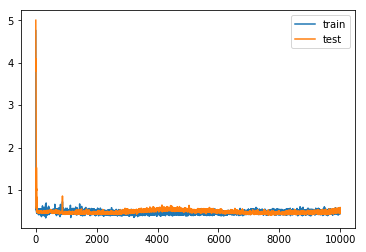

In [28]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=10000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [29]:
import os
duration = 1  # second
freq = 440  # Hz
os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

0

In [186]:
yhat = model.predict(validateX)

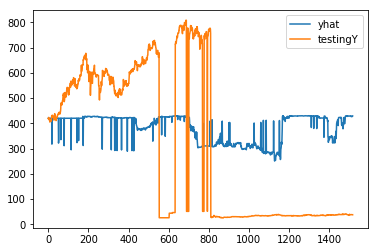

In [187]:
pyplot.plot(yhat.flatten(), label='yhat')
pyplot.plot(validateY.flatten(), label='testingY')
pyplot.legend()
pyplot.show()
#plt.axis([0,500,0,55000])

In [147]:
initial_capital = 10000
growth = []
for i in range(len(yhat)):
    print(initial_capital)
    prediction = yhat[i]
    real_value = testingY[i]
    prediction2 = yhat[i + 1]
    real_value2 = testingY[i + 1]
    if prediction2 > prediction:
        initial_capital = initial_capital * (real_value2 / real_value)
    elif prediction2 < prediction:
        initial_capital = initial_capital * (real_value / real_value2)
    growth.append(initial_capital)

10000
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.73610555777

IndexError: index 845 is out of bounds for axis 0 with size 845

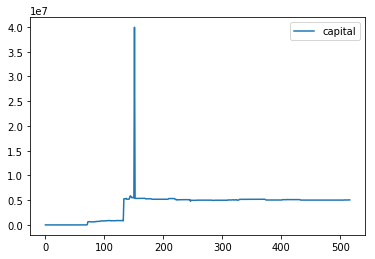

In [191]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()

In [193]:
import numpy
numpy.savetxt("theYtests", validateY.flatten(), delimiter=",")
numpy.savetxt("theYhats", yhat.flatten(), delimiter=",")

In [ ]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()

In [30]:
from keras.models import load_model
model.save("ACTINVER.h5")
del model  
#model = load_model('AC.h5')

In [ ]:
my_data_frame_sum = all_variables.iloc[:,5]
my_data_frame = all_variables.drop(['Date', 'Adj Close.4'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("AMXL.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 4s - loss: 4.9291 - val_loss: 5.0220
Epoch 2/2000
 - 1s - loss: 3.5493 - val_loss: 4.2387
Epoch 3/2000
 - 1s - loss: 2.3192 - val_loss: 3.3650
Epoch 4/2000
 - 1s - loss: 1.6640 - val_loss: 3.9411
Epoch 5/2000
 - 1s - loss: 1.4261 - val_loss: 3.5289
Epoch 6/2000
 - 1s - loss: 1.2063 - val_loss: 3.6940
Epoch 7/2000
 - 1s - loss: 1.1601 - val_loss: 3.1172
Epoch 8/2000
 - 1s - loss: 0.9655 - val_loss: 3.1193
Epoch 9/2000
 - 1s - loss: 0.8360 - val_loss: 2.4878
Epoch 10/2000
 - 1s - loss: 0.6947 - val_loss: 1.7943
Epoch 11/2000
 - 1s - loss: 0.6102 - val_loss: 1.6294
Epoch 12/2000
 - 1s - loss: 0.5612 - val_loss: 1.6097
Epoch 13/2000
 - 1s - loss: 0.5275 - val_loss: 0.6452
Epoch 14/2000
 - 1s - loss: 0.5429 - val_loss: 1.3890
Epoch 15/2000
 - 1s - loss: 0.5577 - val_loss: 0.6480
Epoch 16/2000
 - 1s - loss: 0.5402 - val_loss: 1.4418
Epoch 17/2000
 - 1s - loss: 0.5304 - val_loss: 0.6061
Epoch 18/2000
 - 1s - loss: 0.4981 - val_loss

 - 1s - loss: 0.4862 - val_loss: 0.4930
Epoch 152/2000
 - 1s - loss: 0.4727 - val_loss: 0.5016
Epoch 153/2000
 - 1s - loss: 0.5238 - val_loss: 0.4805
Epoch 154/2000
 - 1s - loss: 0.4709 - val_loss: 0.4750
Epoch 155/2000
 - 1s - loss: 0.4569 - val_loss: 0.4916
Epoch 156/2000
 - 1s - loss: 0.4739 - val_loss: 0.4793
Epoch 157/2000
 - 1s - loss: 0.4626 - val_loss: 0.4821
Epoch 158/2000
 - 1s - loss: 0.5042 - val_loss: 0.4956
Epoch 159/2000
 - 1s - loss: 0.5002 - val_loss: 0.4800
Epoch 160/2000
 - 1s - loss: 0.4945 - val_loss: 0.4991
Epoch 161/2000
 - 1s - loss: 0.4326 - val_loss: 0.4988
Epoch 162/2000
 - 1s - loss: 0.5112 - val_loss: 0.5068
Epoch 163/2000
 - 1s - loss: 0.4991 - val_loss: 0.5681
Epoch 164/2000
 - 1s - loss: 0.4675 - val_loss: 0.4836
Epoch 165/2000
 - 1s - loss: 0.5093 - val_loss: 0.4960
Epoch 166/2000
 - 1s - loss: 0.4848 - val_loss: 0.5026
Epoch 167/2000
 - 1s - loss: 0.4836 - val_loss: 0.5012
Epoch 168/2000
 - 1s - loss: 0.5074 - val_loss: 0.4915
Epoch 169/2000
 - 1s - lo

 - 1s - loss: 0.4891 - val_loss: 0.4763
Epoch 301/2000
 - 1s - loss: 0.4780 - val_loss: 0.4623
Epoch 302/2000
 - 1s - loss: 0.4649 - val_loss: 0.4720
Epoch 303/2000
 - 1s - loss: 0.5041 - val_loss: 0.4772
Epoch 304/2000
 - 1s - loss: 0.5004 - val_loss: 0.4869
Epoch 305/2000
 - 1s - loss: 0.4590 - val_loss: 0.4790
Epoch 306/2000
 - 1s - loss: 0.4855 - val_loss: 0.5215
Epoch 307/2000
 - 1s - loss: 0.6113 - val_loss: 0.4867
Epoch 308/2000
 - 1s - loss: 0.4776 - val_loss: 0.4730
Epoch 309/2000
 - 1s - loss: 0.6204 - val_loss: 0.4742
Epoch 310/2000
 - 1s - loss: 0.4846 - val_loss: 0.4709
Epoch 311/2000
 - 1s - loss: 0.4645 - val_loss: 0.4871
Epoch 312/2000
 - 1s - loss: 0.4718 - val_loss: 0.4778
Epoch 313/2000
 - 1s - loss: 0.4728 - val_loss: 0.4833
Epoch 314/2000
 - 1s - loss: 0.4778 - val_loss: 0.4769
Epoch 315/2000
 - 1s - loss: 0.4702 - val_loss: 0.4766
Epoch 316/2000
 - 1s - loss: 0.4914 - val_loss: 0.4701
Epoch 317/2000
 - 1s - loss: 0.4798 - val_loss: 0.4761
Epoch 318/2000
 - 1s - lo

 - 1s - loss: 0.4792 - val_loss: 0.4568
Epoch 450/2000
 - 1s - loss: 0.4659 - val_loss: 0.4810
Epoch 451/2000
 - 1s - loss: 0.5022 - val_loss: 0.4720
Epoch 452/2000
 - 1s - loss: 0.4779 - val_loss: 0.4729
Epoch 453/2000
 - 1s - loss: 0.5088 - val_loss: 0.4620
Epoch 454/2000
 - 1s - loss: 0.5584 - val_loss: 0.4596
Epoch 455/2000
 - 1s - loss: 0.5193 - val_loss: 0.4642
Epoch 456/2000
 - 1s - loss: 0.5097 - val_loss: 0.4483
Epoch 457/2000
 - 1s - loss: 0.4795 - val_loss: 0.4554
Epoch 458/2000
 - 1s - loss: 0.4813 - val_loss: 0.4708
Epoch 459/2000
 - 1s - loss: 0.4823 - val_loss: 0.4853
Epoch 460/2000
 - 1s - loss: 0.4780 - val_loss: 0.4956
Epoch 461/2000
 - 1s - loss: 0.4832 - val_loss: 0.4775
Epoch 462/2000
 - 1s - loss: 0.4954 - val_loss: 0.4779
Epoch 463/2000
 - 1s - loss: 0.5165 - val_loss: 0.4809
Epoch 464/2000
 - 1s - loss: 0.4611 - val_loss: 0.4682
Epoch 465/2000
 - 1s - loss: 0.4629 - val_loss: 0.4542
Epoch 466/2000
 - 1s - loss: 0.4982 - val_loss: 0.4805
Epoch 467/2000
 - 1s - lo

 - 1s - loss: 0.5229 - val_loss: 0.4728
Epoch 599/2000
 - 1s - loss: 0.4852 - val_loss: 0.4518
Epoch 600/2000
 - 1s - loss: 0.4782 - val_loss: 0.4504
Epoch 601/2000
 - 1s - loss: 0.5023 - val_loss: 0.4714
Epoch 602/2000
 - 1s - loss: 0.5371 - val_loss: 0.4607
Epoch 603/2000
 - 1s - loss: 0.4743 - val_loss: 0.4559
Epoch 604/2000
 - 1s - loss: 0.4637 - val_loss: 0.4595
Epoch 605/2000
 - 1s - loss: 0.4785 - val_loss: 0.4653
Epoch 606/2000
 - 1s - loss: 0.5429 - val_loss: 0.4595
Epoch 607/2000
 - 1s - loss: 0.4762 - val_loss: 0.4785
Epoch 608/2000
 - 1s - loss: 0.4621 - val_loss: 0.5212
Epoch 609/2000
 - 1s - loss: 0.5073 - val_loss: 0.4913
Epoch 610/2000
 - 1s - loss: 0.4917 - val_loss: 0.5036
Epoch 611/2000
 - 1s - loss: 0.5284 - val_loss: 0.4533
Epoch 612/2000
 - 1s - loss: 0.4341 - val_loss: 0.4910
Epoch 613/2000
 - 1s - loss: 0.4591 - val_loss: 0.4747
Epoch 614/2000
 - 1s - loss: 0.4845 - val_loss: 0.4532
Epoch 615/2000
 - 1s - loss: 0.4502 - val_loss: 0.4736
Epoch 616/2000
 - 1s - lo

 - 1s - loss: 0.4798 - val_loss: 0.4888
Epoch 748/2000
 - 1s - loss: 0.4564 - val_loss: 0.4834
Epoch 749/2000
 - 1s - loss: 0.4700 - val_loss: 0.4756
Epoch 750/2000
 - 1s - loss: 0.4930 - val_loss: 0.4744
Epoch 751/2000
 - 1s - loss: 0.4610 - val_loss: 0.4714
Epoch 752/2000
 - 1s - loss: 0.4854 - val_loss: 0.4705
Epoch 753/2000
 - 1s - loss: 0.4707 - val_loss: 0.4644
Epoch 754/2000
 - 1s - loss: 0.4799 - val_loss: 0.4686
Epoch 755/2000
 - 1s - loss: 0.5009 - val_loss: 0.4751
Epoch 756/2000
 - 1s - loss: 0.4866 - val_loss: 0.4699
Epoch 757/2000
 - 1s - loss: 0.4813 - val_loss: 0.4701
Epoch 758/2000
 - 1s - loss: 0.5371 - val_loss: 0.4523
Epoch 759/2000
 - 1s - loss: 0.4882 - val_loss: 0.4624
Epoch 760/2000
 - 1s - loss: 0.4669 - val_loss: 0.4542
Epoch 761/2000
 - 1s - loss: 0.4757 - val_loss: 0.4706
Epoch 762/2000
 - 1s - loss: 0.4552 - val_loss: 0.4721
Epoch 763/2000
 - 1s - loss: 0.4966 - val_loss: 0.4681
Epoch 764/2000
 - 1s - loss: 0.4834 - val_loss: 0.5044
Epoch 765/2000
 - 1s - lo

 - 1s - loss: 0.5052 - val_loss: 0.4788
Epoch 897/2000
 - 1s - loss: 0.5204 - val_loss: 0.4753
Epoch 898/2000
 - 1s - loss: 0.4440 - val_loss: 0.4696
Epoch 899/2000
 - 1s - loss: 0.5894 - val_loss: 0.4505
Epoch 900/2000
 - 1s - loss: 0.5327 - val_loss: 0.4593
Epoch 901/2000
 - 1s - loss: 0.5215 - val_loss: 0.4719
Epoch 902/2000
 - 1s - loss: 0.4752 - val_loss: 0.4552
Epoch 903/2000
 - 1s - loss: 0.4828 - val_loss: 0.4576
Epoch 904/2000
 - 1s - loss: 0.4828 - val_loss: 0.4614
Epoch 905/2000
 - 1s - loss: 0.4820 - val_loss: 0.4600
Epoch 906/2000
 - 1s - loss: 0.4773 - val_loss: 0.4617
Epoch 907/2000
 - 1s - loss: 0.4515 - val_loss: 0.4934
Epoch 908/2000
 - 1s - loss: 0.4667 - val_loss: 0.4787
Epoch 909/2000
 - 1s - loss: 0.4945 - val_loss: 0.4697
Epoch 910/2000
 - 1s - loss: 0.4940 - val_loss: 0.4711
Epoch 911/2000
 - 1s - loss: 0.4806 - val_loss: 0.4598
Epoch 912/2000
 - 1s - loss: 0.5055 - val_loss: 0.4632
Epoch 913/2000
 - 1s - loss: 0.4987 - val_loss: 0.4589
Epoch 914/2000
 - 1s - lo

Epoch 1045/2000
 - 1s - loss: 0.5301 - val_loss: 0.4442
Epoch 1046/2000
 - 1s - loss: 0.4489 - val_loss: 0.4513
Epoch 1047/2000
 - 1s - loss: 0.5126 - val_loss: 0.4484
Epoch 1048/2000
 - 1s - loss: 0.4657 - val_loss: 0.4767
Epoch 1049/2000
 - 1s - loss: 0.4842 - val_loss: 0.4782
Epoch 1050/2000
 - 1s - loss: 0.5287 - val_loss: 0.4549
Epoch 1051/2000
 - 1s - loss: 0.4612 - val_loss: 0.4591
Epoch 1052/2000
 - 1s - loss: 0.4866 - val_loss: 0.4458
Epoch 1053/2000
 - 1s - loss: 0.4220 - val_loss: 0.4758
Epoch 1054/2000
 - 1s - loss: 0.5139 - val_loss: 0.4864
Epoch 1055/2000
 - 1s - loss: 0.5450 - val_loss: 0.4633
Epoch 1056/2000
 - 1s - loss: 0.5174 - val_loss: 0.4465
Epoch 1057/2000
 - 1s - loss: 0.4355 - val_loss: 0.4508
Epoch 1058/2000
 - 1s - loss: 0.4631 - val_loss: 0.4476
Epoch 1059/2000
 - 1s - loss: 0.4835 - val_loss: 0.4459
Epoch 1060/2000
 - 1s - loss: 0.4831 - val_loss: 0.4553
Epoch 1061/2000
 - 1s - loss: 0.5493 - val_loss: 0.4496
Epoch 1062/2000
 - 1s - loss: 0.5235 - val_loss:

Epoch 1192/2000
 - 1s - loss: 0.4723 - val_loss: 0.4730
Epoch 1193/2000
 - 1s - loss: 0.4540 - val_loss: 0.4923
Epoch 1194/2000
 - 1s - loss: 0.4611 - val_loss: 0.4590
Epoch 1195/2000
 - 1s - loss: 0.4059 - val_loss: 0.4757
Epoch 1196/2000
 - 1s - loss: 0.4707 - val_loss: 0.4719
Epoch 1197/2000
 - 1s - loss: 0.5224 - val_loss: 0.4659
Epoch 1198/2000
 - 1s - loss: 0.5202 - val_loss: 0.4995
Epoch 1199/2000
 - 1s - loss: 0.4860 - val_loss: 0.4459
Epoch 1200/2000
 - 1s - loss: 0.4397 - val_loss: 0.4469
Epoch 1201/2000
 - 1s - loss: 0.4653 - val_loss: 0.4877
Epoch 1202/2000
 - 1s - loss: 0.4838 - val_loss: 0.4554
Epoch 1203/2000
 - 1s - loss: 0.4543 - val_loss: 0.4584
Epoch 1204/2000
 - 1s - loss: 0.6320 - val_loss: 0.4523
Epoch 1205/2000
 - 1s - loss: 0.4088 - val_loss: 0.4650
Epoch 1206/2000
 - 1s - loss: 0.4740 - val_loss: 0.4746
Epoch 1207/2000
 - 1s - loss: 0.5204 - val_loss: 0.4598
Epoch 1208/2000
 - 1s - loss: 0.4837 - val_loss: 0.4718
Epoch 1209/2000
 - 1s - loss: 0.4894 - val_loss:

Epoch 1339/2000
 - 1s - loss: 0.5283 - val_loss: 0.4525
Epoch 1340/2000
 - 1s - loss: 0.4775 - val_loss: 0.4459
Epoch 1341/2000
 - 1s - loss: 0.4388 - val_loss: 0.4454
Epoch 1342/2000
 - 1s - loss: 0.4565 - val_loss: 0.4406
Epoch 1343/2000
 - 1s - loss: 0.4888 - val_loss: 0.4405
Epoch 1344/2000
 - 1s - loss: 0.4980 - val_loss: 0.4517
Epoch 1345/2000
 - 1s - loss: 0.3631 - val_loss: 0.4641
Epoch 1346/2000
 - 1s - loss: 0.5444 - val_loss: 0.4575
Epoch 1347/2000
 - 1s - loss: 0.4867 - val_loss: 0.4627
Epoch 1348/2000
 - 1s - loss: 0.4533 - val_loss: 0.5092
Epoch 1349/2000
 - 1s - loss: 0.4448 - val_loss: 0.4398
Epoch 1350/2000
 - 1s - loss: 0.4778 - val_loss: 0.4512
Epoch 1351/2000
 - 1s - loss: 0.4638 - val_loss: 0.4574
Epoch 1352/2000
 - 1s - loss: 0.5403 - val_loss: 0.4406
Epoch 1353/2000
 - 1s - loss: 0.4421 - val_loss: 0.4718
Epoch 1354/2000
 - 1s - loss: 0.5535 - val_loss: 0.4425
Epoch 1355/2000
 - 1s - loss: 0.4887 - val_loss: 0.4562
Epoch 1356/2000
 - 1s - loss: 0.4583 - val_loss:

Epoch 1486/2000
 - 1s - loss: 0.4753 - val_loss: 0.4615
Epoch 1487/2000
 - 1s - loss: 0.4826 - val_loss: 0.4643
Epoch 1488/2000
 - 1s - loss: 0.4685 - val_loss: 0.4602
Epoch 1489/2000
 - 1s - loss: 0.4714 - val_loss: 0.4703
Epoch 1490/2000
 - 1s - loss: 0.4949 - val_loss: 0.4689
Epoch 1491/2000
 - 1s - loss: 0.4652 - val_loss: 0.4730
Epoch 1492/2000
 - 1s - loss: 0.4786 - val_loss: 0.4635
Epoch 1493/2000
 - 1s - loss: 0.4730 - val_loss: 0.4629
Epoch 1494/2000
 - 1s - loss: 0.4625 - val_loss: 0.4688
Epoch 1495/2000
 - 1s - loss: 0.4885 - val_loss: 0.4684
Epoch 1496/2000
 - 1s - loss: 0.6022 - val_loss: 0.4649
Epoch 1497/2000
 - 1s - loss: 0.6334 - val_loss: 0.4674
Epoch 1498/2000
 - 1s - loss: 0.5496 - val_loss: 0.4697
Epoch 1499/2000
 - 1s - loss: 0.4645 - val_loss: 0.4657
Epoch 1500/2000
 - 1s - loss: 0.4745 - val_loss: 0.4789
Epoch 1501/2000
 - 1s - loss: 0.5364 - val_loss: 0.4592
Epoch 1502/2000
 - 1s - loss: 0.5027 - val_loss: 0.4801
Epoch 1503/2000
 - 1s - loss: 0.5112 - val_loss:

Epoch 1633/2000
 - 1s - loss: 0.5328 - val_loss: 0.4608
Epoch 1634/2000
 - 1s - loss: 0.5217 - val_loss: 0.4630
Epoch 1635/2000
 - 1s - loss: 0.5275 - val_loss: 0.4536
Epoch 1636/2000
 - 1s - loss: 0.5346 - val_loss: 0.4528
Epoch 1637/2000
 - 1s - loss: 0.4720 - val_loss: 0.4417
Epoch 1638/2000
 - 1s - loss: 0.4512 - val_loss: 0.4525
Epoch 1639/2000
 - 1s - loss: 0.4965 - val_loss: 0.4411
Epoch 1640/2000
 - 1s - loss: 0.4494 - val_loss: 0.4607
Epoch 1641/2000
 - 1s - loss: 0.4855 - val_loss: 0.4540
Epoch 1642/2000
 - 1s - loss: 0.4660 - val_loss: 0.4452
Epoch 1643/2000
 - 1s - loss: 0.5001 - val_loss: 0.4421
Epoch 1644/2000
 - 1s - loss: 0.4639 - val_loss: 0.4425
Epoch 1645/2000
 - 1s - loss: 0.4820 - val_loss: 0.4432
Epoch 1646/2000
 - 1s - loss: 0.4428 - val_loss: 0.4513
Epoch 1647/2000
 - 1s - loss: 0.5131 - val_loss: 0.4347
Epoch 1648/2000
 - 1s - loss: 0.4208 - val_loss: 0.4462
Epoch 1649/2000
 - 1s - loss: 0.4635 - val_loss: 0.4539
Epoch 1650/2000
 - 1s - loss: 0.5071 - val_loss:

Epoch 1780/2000
 - 1s - loss: 0.4662 - val_loss: 0.4502
Epoch 1781/2000
 - 1s - loss: 0.4566 - val_loss: 0.4427
Epoch 1782/2000
 - 1s - loss: 0.4578 - val_loss: 0.4651
Epoch 1783/2000
 - 1s - loss: 0.5107 - val_loss: 0.4583
Epoch 1784/2000
 - 1s - loss: 0.4760 - val_loss: 0.4554
Epoch 1785/2000
 - 1s - loss: 0.4865 - val_loss: 0.4385
Epoch 1786/2000
 - 1s - loss: 0.4694 - val_loss: 0.4374
Epoch 1787/2000
 - 1s - loss: 0.4443 - val_loss: 0.4449
Epoch 1788/2000
 - 1s - loss: 0.5126 - val_loss: 0.4363
Epoch 1789/2000
 - 1s - loss: 0.4793 - val_loss: 0.4348
Epoch 1790/2000
 - 1s - loss: 0.4147 - val_loss: 0.4458
Epoch 1791/2000
 - 1s - loss: 0.4702 - val_loss: 0.4346
Epoch 1792/2000
 - 1s - loss: 0.4861 - val_loss: 0.4470
Epoch 1793/2000
 - 1s - loss: 0.5156 - val_loss: 0.4435
Epoch 1794/2000
 - 1s - loss: 0.4798 - val_loss: 0.4303
Epoch 1795/2000
 - 1s - loss: 0.4542 - val_loss: 0.4456
Epoch 1796/2000
 - 1s - loss: 0.4522 - val_loss: 0.4413
Epoch 1797/2000
 - 1s - loss: 0.5108 - val_loss:

Epoch 1927/2000
 - 1s - loss: 0.4533 - val_loss: 0.4444
Epoch 1928/2000
 - 1s - loss: 0.4659 - val_loss: 0.4298
Epoch 1929/2000
 - 1s - loss: 0.4339 - val_loss: 0.4291
Epoch 1930/2000
 - 1s - loss: 0.5060 - val_loss: 0.4629
Epoch 1931/2000
 - 1s - loss: 0.4900 - val_loss: 0.4524
Epoch 1932/2000
 - 1s - loss: 0.4709 - val_loss: 0.4540
Epoch 1933/2000
 - 1s - loss: 0.4501 - val_loss: 0.4586
Epoch 1934/2000
 - 1s - loss: 0.5039 - val_loss: 0.4483
Epoch 1935/2000
 - 1s - loss: 0.4835 - val_loss: 0.4548
Epoch 1936/2000
 - 1s - loss: 0.5225 - val_loss: 0.4553
Epoch 1937/2000
 - 1s - loss: 0.4711 - val_loss: 0.4716
Epoch 1938/2000
 - 1s - loss: 0.5025 - val_loss: 0.4602
Epoch 1939/2000
 - 1s - loss: 0.4425 - val_loss: 0.4398
Epoch 1940/2000
 - 1s - loss: 0.6009 - val_loss: 0.4427
Epoch 1941/2000
 - 1s - loss: 0.6791 - val_loss: 0.4438
Epoch 1942/2000
 - 1s - loss: 0.5123 - val_loss: 0.4483
Epoch 1943/2000
 - 1s - loss: 0.4916 - val_loss: 0.4445
Epoch 1944/2000
 - 1s - loss: 0.4976 - val_loss:

In [19]:
my_data_frame_sum = all_variables.iloc[:,8]
my_data_frame = all_variables.drop(['Date', 'Adj Close.7'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("BBAJIOO.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 5.0872 - val_loss: 5.1493
Epoch 2/2000
 - 0s - loss: 4.1734 - val_loss: 4.7554
Epoch 3/2000
 - 0s - loss: 4.1638 - val_loss: 4.6453
Epoch 4/2000
 - 0s - loss: 2.9596 - val_loss: 4.2369
Epoch 5/2000
 - 0s - loss: 2.7691 - val_loss: 4.2428
Epoch 6/2000
 - 0s - loss: 2.2312 - val_loss: 4.1607
Epoch 7/2000
 - 0s - loss: 1.7509 - val_loss: 4.3022
Epoch 8/2000
 - 0s - loss: 1.6063 - val_loss: 4.5316
Epoch 9/2000
 - 0s - loss: 1.4355 - val_loss: 4.3313
Epoch 10/2000
 - 0s - loss: 1.2910 - val_loss: 4.0938
Epoch 11/2000
 - 0s - loss: 1.2031 - val_loss: 4.1020
Epoch 12/2000
 - 0s - loss: 0.9989 - val_loss: 3.4260
Epoch 13/2000
 - 1s - loss: 0.8224 - val_loss: 2.2277
Epoch 14/2000
 - 1s - loss: 0.7723 - val_loss: 2.8013
Epoch 15/2000
 - 0s - loss: 0.6835 - val_loss: 0.7428
Epoch 16/2000
 - 0s - loss: 0.6081 - val_loss: 3.4874
Epoch 17/2000
 - 0s - loss: 0.7184 - val_loss: 1.2076
Epoch 18/2000
 - 0s - loss: 0.5388 - val_loss

 - 0s - loss: 0.6060 - val_loss: 0.4823
Epoch 152/2000
 - 0s - loss: 0.4564 - val_loss: 0.4870
Epoch 153/2000
 - 0s - loss: 0.4021 - val_loss: 0.5005
Epoch 154/2000
 - 0s - loss: 0.4854 - val_loss: 0.4906
Epoch 155/2000
 - 0s - loss: 0.4734 - val_loss: 0.4917
Epoch 156/2000
 - 0s - loss: 0.4959 - val_loss: 0.4979
Epoch 157/2000
 - 0s - loss: 0.5305 - val_loss: 0.4928
Epoch 158/2000
 - 0s - loss: 0.6025 - val_loss: 0.4865
Epoch 159/2000
 - 0s - loss: 0.5252 - val_loss: 0.4881
Epoch 160/2000
 - 0s - loss: 0.4984 - val_loss: 0.4948
Epoch 161/2000
 - 0s - loss: 0.5339 - val_loss: 0.4974
Epoch 162/2000
 - 0s - loss: 0.4573 - val_loss: 0.4868
Epoch 163/2000
 - 0s - loss: 0.5201 - val_loss: 0.4893
Epoch 164/2000
 - 0s - loss: 0.6008 - val_loss: 0.4790
Epoch 165/2000
 - 0s - loss: 0.5190 - val_loss: 0.4798
Epoch 166/2000
 - 0s - loss: 0.4687 - val_loss: 0.4839
Epoch 167/2000
 - 0s - loss: 0.4601 - val_loss: 0.4805
Epoch 168/2000
 - 0s - loss: 0.4177 - val_loss: 0.4827
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 0.4167 - val_loss: 0.5020
Epoch 301/2000
 - 0s - loss: 0.5406 - val_loss: 0.4829
Epoch 302/2000
 - 0s - loss: 0.4869 - val_loss: 0.4880
Epoch 303/2000
 - 0s - loss: 0.5059 - val_loss: 0.4826
Epoch 304/2000
 - 0s - loss: 0.4987 - val_loss: 0.4802
Epoch 305/2000
 - 0s - loss: 0.4990 - val_loss: 0.5058
Epoch 306/2000
 - 0s - loss: 0.5566 - val_loss: 0.4787
Epoch 307/2000
 - 0s - loss: 0.4646 - val_loss: 0.4908
Epoch 308/2000
 - 0s - loss: 0.3963 - val_loss: 0.5066
Epoch 309/2000
 - 0s - loss: 0.5319 - val_loss: 0.4902
Epoch 310/2000
 - 0s - loss: 0.6083 - val_loss: 0.5725
Epoch 311/2000
 - 0s - loss: 0.5752 - val_loss: 0.4799
Epoch 312/2000
 - 0s - loss: 0.4536 - val_loss: 0.4974
Epoch 313/2000
 - 0s - loss: 0.5235 - val_loss: 0.5083
Epoch 314/2000
 - 0s - loss: 0.5623 - val_loss: 0.5123
Epoch 315/2000
 - 0s - loss: 0.6149 - val_loss: 0.4803
Epoch 316/2000
 - 0s - loss: 0.4897 - val_loss: 0.4860
Epoch 317/2000
 - 0s - loss: 0.4718 - val_loss: 0.4867
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 0.6180 - val_loss: 0.4703
Epoch 450/2000
 - 0s - loss: 0.6091 - val_loss: 0.5091
Epoch 451/2000
 - 0s - loss: 0.5322 - val_loss: 0.4763
Epoch 452/2000
 - 0s - loss: 0.5009 - val_loss: 0.5080
Epoch 453/2000
 - 0s - loss: 0.5238 - val_loss: 0.4840
Epoch 454/2000
 - 0s - loss: 0.5423 - val_loss: 0.4801
Epoch 455/2000
 - 0s - loss: 0.6076 - val_loss: 0.5107
Epoch 456/2000
 - 0s - loss: 0.5579 - val_loss: 0.5069
Epoch 457/2000
 - 0s - loss: 0.5857 - val_loss: 0.5129
Epoch 458/2000
 - 0s - loss: 0.5933 - val_loss: 0.5059
Epoch 459/2000
 - 0s - loss: 0.5720 - val_loss: 0.5043
Epoch 460/2000
 - 0s - loss: 0.4960 - val_loss: 0.5060
Epoch 461/2000
 - 0s - loss: 0.5696 - val_loss: 0.4999
Epoch 462/2000
 - 0s - loss: 0.5651 - val_loss: 0.5121
Epoch 463/2000
 - 0s - loss: 0.5796 - val_loss: 0.5178
Epoch 464/2000
 - 0s - loss: 0.6078 - val_loss: 0.5050
Epoch 465/2000
 - 0s - loss: 0.5981 - val_loss: 0.5102
Epoch 466/2000
 - 0s - loss: 0.6386 - val_loss: 0.5040
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 0.6636 - val_loss: 0.4715
Epoch 599/2000
 - 0s - loss: 0.6706 - val_loss: 0.4705
Epoch 600/2000
 - 0s - loss: 0.7508 - val_loss: 0.4744
Epoch 601/2000
 - 0s - loss: 0.7348 - val_loss: 0.4664
Epoch 602/2000
 - 0s - loss: 0.6670 - val_loss: 0.6213
Epoch 603/2000
 - 0s - loss: 0.7051 - val_loss: 0.4602
Epoch 604/2000
 - 0s - loss: 0.6295 - val_loss: 0.4655
Epoch 605/2000
 - 0s - loss: 0.6489 - val_loss: 0.4656
Epoch 606/2000
 - 0s - loss: 0.7018 - val_loss: 0.4624
Epoch 607/2000
 - 0s - loss: 0.7256 - val_loss: 0.4599
Epoch 608/2000
 - 0s - loss: 0.6120 - val_loss: 0.4645
Epoch 609/2000
 - 0s - loss: 0.5643 - val_loss: 0.4679
Epoch 610/2000
 - 0s - loss: 0.5057 - val_loss: 0.4729
Epoch 611/2000
 - 0s - loss: 0.6927 - val_loss: 0.4741
Epoch 612/2000
 - 0s - loss: 0.5969 - val_loss: 0.4709
Epoch 613/2000
 - 0s - loss: 0.6078 - val_loss: 0.4710
Epoch 614/2000
 - 0s - loss: 0.5725 - val_loss: 0.4835
Epoch 615/2000
 - 0s - loss: 0.6268 - val_loss: 0.4761
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 0.5475 - val_loss: 0.4880
Epoch 748/2000
 - 0s - loss: 0.6360 - val_loss: 0.4892
Epoch 749/2000
 - 0s - loss: 0.5500 - val_loss: 0.4901
Epoch 750/2000
 - 0s - loss: 0.5394 - val_loss: 0.4971
Epoch 751/2000
 - 0s - loss: 0.5716 - val_loss: 0.5289
Epoch 752/2000
 - 0s - loss: 0.5197 - val_loss: 0.4980
Epoch 753/2000
 - 0s - loss: 0.5017 - val_loss: 0.4854
Epoch 754/2000
 - 0s - loss: 0.5065 - val_loss: 0.5026
Epoch 755/2000
 - 0s - loss: 0.5626 - val_loss: 0.4876
Epoch 756/2000
 - 0s - loss: 0.5252 - val_loss: 0.4849
Epoch 757/2000
 - 0s - loss: 0.6319 - val_loss: 0.5049
Epoch 758/2000
 - 0s - loss: 0.6366 - val_loss: 0.4992
Epoch 759/2000
 - 0s - loss: 0.4920 - val_loss: 0.4965
Epoch 760/2000
 - 0s - loss: 0.4782 - val_loss: 0.4897
Epoch 761/2000
 - 0s - loss: 0.5214 - val_loss: 0.5109
Epoch 762/2000
 - 0s - loss: 0.5287 - val_loss: 0.4835
Epoch 763/2000
 - 0s - loss: 0.5556 - val_loss: 0.4884
Epoch 764/2000
 - 0s - loss: 0.5167 - val_loss: 0.4837
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 0.6018 - val_loss: 0.5035
Epoch 897/2000
 - 0s - loss: 0.6279 - val_loss: 0.5217
Epoch 898/2000
 - 0s - loss: 0.5170 - val_loss: 0.5036
Epoch 899/2000
 - 0s - loss: 0.7564 - val_loss: 0.5297
Epoch 900/2000
 - 0s - loss: 0.5740 - val_loss: 0.5016
Epoch 901/2000
 - 0s - loss: 0.6079 - val_loss: 0.4926
Epoch 902/2000
 - 0s - loss: 0.5672 - val_loss: 0.5017
Epoch 903/2000
 - 0s - loss: 0.5348 - val_loss: 0.5158
Epoch 904/2000
 - 0s - loss: 0.6648 - val_loss: 0.5042
Epoch 905/2000
 - 0s - loss: 0.5592 - val_loss: 0.5230
Epoch 906/2000
 - 0s - loss: 0.6057 - val_loss: 0.5036
Epoch 907/2000
 - 0s - loss: 0.6215 - val_loss: 0.5068
Epoch 908/2000
 - 0s - loss: 0.6633 - val_loss: 0.4951
Epoch 909/2000
 - 0s - loss: 0.5885 - val_loss: 0.4632
Epoch 910/2000
 - 0s - loss: 0.6530 - val_loss: 0.4794
Epoch 911/2000
 - 0s - loss: 0.5974 - val_loss: 0.4926
Epoch 912/2000
 - 0s - loss: 0.5948 - val_loss: 0.4861
Epoch 913/2000
 - 0s - loss: 0.5798 - val_loss: 0.4656
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 0.5229 - val_loss: 0.4848
Epoch 1046/2000
 - 0s - loss: 0.6151 - val_loss: 0.5156
Epoch 1047/2000
 - 0s - loss: 0.5644 - val_loss: 0.4917
Epoch 1048/2000
 - 0s - loss: 0.5516 - val_loss: 0.4932
Epoch 1049/2000
 - 0s - loss: 0.5867 - val_loss: 0.4666
Epoch 1050/2000
 - 0s - loss: 0.5577 - val_loss: 0.4951
Epoch 1051/2000
 - 0s - loss: 0.5120 - val_loss: 0.4964
Epoch 1052/2000
 - 0s - loss: 0.4990 - val_loss: 0.4936
Epoch 1053/2000
 - 0s - loss: 0.5100 - val_loss: 0.4797
Epoch 1054/2000
 - 0s - loss: 0.5264 - val_loss: 0.4902
Epoch 1055/2000
 - 0s - loss: 0.5401 - val_loss: 0.4795
Epoch 1056/2000
 - 0s - loss: 0.5300 - val_loss: 0.4955
Epoch 1057/2000
 - 0s - loss: 0.5346 - val_loss: 0.4888
Epoch 1058/2000
 - 0s - loss: 0.6005 - val_loss: 0.4763
Epoch 1059/2000
 - 0s - loss: 0.5299 - val_loss: 0.4963
Epoch 1060/2000
 - 0s - loss: 0.5606 - val_loss: 0.4842
Epoch 1061/2000
 - 0s - loss: 0.5690 - val_loss: 0.4939
Epoch 1062/2000
 - 0s - loss: 0.5399 - val_loss:

Epoch 1192/2000
 - 0s - loss: 0.5201 - val_loss: 0.4587
Epoch 1193/2000
 - 0s - loss: 0.5179 - val_loss: 0.4441
Epoch 1194/2000
 - 0s - loss: 0.5375 - val_loss: 0.4637
Epoch 1195/2000
 - 0s - loss: 0.5477 - val_loss: 0.4715
Epoch 1196/2000
 - 0s - loss: 0.5563 - val_loss: 0.4545
Epoch 1197/2000
 - 0s - loss: 0.6092 - val_loss: 0.4605
Epoch 1198/2000
 - 0s - loss: 0.5577 - val_loss: 0.4534
Epoch 1199/2000
 - 0s - loss: 0.6104 - val_loss: 0.4656
Epoch 1200/2000
 - 0s - loss: 0.5810 - val_loss: 0.4682
Epoch 1201/2000
 - 0s - loss: 0.5461 - val_loss: 0.4477
Epoch 1202/2000
 - 0s - loss: 0.5799 - val_loss: 0.4500
Epoch 1203/2000
 - 0s - loss: 0.5534 - val_loss: 0.4496
Epoch 1204/2000
 - 0s - loss: 0.5655 - val_loss: 0.4688
Epoch 1205/2000
 - 0s - loss: 0.5302 - val_loss: 0.4562
Epoch 1206/2000
 - 0s - loss: 0.5571 - val_loss: 0.4525
Epoch 1207/2000
 - 0s - loss: 0.5447 - val_loss: 0.4465
Epoch 1208/2000
 - 0s - loss: 0.5221 - val_loss: 0.4458
Epoch 1209/2000
 - 0s - loss: 0.5519 - val_loss:

Epoch 1339/2000
 - 0s - loss: 0.5796 - val_loss: 0.4508
Epoch 1340/2000
 - 0s - loss: 0.5123 - val_loss: 0.4507
Epoch 1341/2000
 - 0s - loss: 0.5043 - val_loss: 0.4483
Epoch 1342/2000
 - 0s - loss: 0.5483 - val_loss: 0.4472
Epoch 1343/2000
 - 0s - loss: 0.5443 - val_loss: 0.4598
Epoch 1344/2000
 - 0s - loss: 0.6034 - val_loss: 0.4552
Epoch 1345/2000
 - 0s - loss: 0.5559 - val_loss: 0.4931
Epoch 1346/2000
 - 0s - loss: 0.5099 - val_loss: 0.4535
Epoch 1347/2000
 - 0s - loss: 0.5625 - val_loss: 0.4515
Epoch 1348/2000
 - 0s - loss: 0.5727 - val_loss: 0.4547
Epoch 1349/2000
 - 0s - loss: 0.5664 - val_loss: 0.4541
Epoch 1350/2000
 - 0s - loss: 0.5545 - val_loss: 0.4432
Epoch 1351/2000
 - 0s - loss: 0.5894 - val_loss: 0.4408
Epoch 1352/2000
 - 0s - loss: 0.5497 - val_loss: 0.4481
Epoch 1353/2000
 - 0s - loss: 0.6031 - val_loss: 0.4525
Epoch 1354/2000
 - 0s - loss: 0.5915 - val_loss: 0.4476
Epoch 1355/2000
 - 0s - loss: 0.5188 - val_loss: 0.4495
Epoch 1356/2000
 - 0s - loss: 0.5325 - val_loss:

Epoch 1486/2000
 - 0s - loss: 0.5340 - val_loss: 0.4942
Epoch 1487/2000
 - 0s - loss: 0.6070 - val_loss: 0.4931
Epoch 1488/2000
 - 0s - loss: 0.5560 - val_loss: 0.4863
Epoch 1489/2000
 - 0s - loss: 0.5707 - val_loss: 0.4819
Epoch 1490/2000
 - 0s - loss: 0.5751 - val_loss: 0.5074
Epoch 1491/2000
 - 0s - loss: 0.5744 - val_loss: 0.5134
Epoch 1492/2000
 - 0s - loss: 0.5954 - val_loss: 0.5001
Epoch 1493/2000
 - 0s - loss: 0.6262 - val_loss: 0.4981
Epoch 1494/2000
 - 0s - loss: 0.6227 - val_loss: 0.4937
Epoch 1495/2000
 - 0s - loss: 0.6012 - val_loss: 0.5036
Epoch 1496/2000
 - 0s - loss: 0.5998 - val_loss: 0.5110
Epoch 1497/2000
 - 0s - loss: 0.5387 - val_loss: 0.4964
Epoch 1498/2000
 - 0s - loss: 0.5720 - val_loss: 0.4918
Epoch 1499/2000
 - 0s - loss: 0.5958 - val_loss: 0.5138
Epoch 1500/2000
 - 0s - loss: 0.5650 - val_loss: 0.4944
Epoch 1501/2000
 - 0s - loss: 0.5461 - val_loss: 0.4956
Epoch 1502/2000
 - 0s - loss: 0.5383 - val_loss: 0.5088
Epoch 1503/2000
 - 0s - loss: 0.5542 - val_loss:

Epoch 1633/2000
 - 0s - loss: 0.5785 - val_loss: 0.5044
Epoch 1634/2000
 - 0s - loss: 0.5477 - val_loss: 0.5056
Epoch 1635/2000
 - 0s - loss: 0.5620 - val_loss: 0.4922
Epoch 1636/2000
 - 0s - loss: 0.6490 - val_loss: 0.4968
Epoch 1637/2000
 - 0s - loss: 0.6477 - val_loss: 0.4970
Epoch 1638/2000
 - 0s - loss: 0.5734 - val_loss: 0.4881
Epoch 1639/2000
 - 0s - loss: 0.5544 - val_loss: 0.4892
Epoch 1640/2000
 - 0s - loss: 0.5196 - val_loss: 0.5033
Epoch 1641/2000
 - 0s - loss: 0.5658 - val_loss: 0.4952
Epoch 1642/2000
 - 0s - loss: 0.6142 - val_loss: 0.4969
Epoch 1643/2000
 - 0s - loss: 0.5551 - val_loss: 0.4949
Epoch 1644/2000
 - 0s - loss: 0.6222 - val_loss: 0.4962
Epoch 1645/2000
 - 0s - loss: 0.5497 - val_loss: 0.4908
Epoch 1646/2000
 - 0s - loss: 0.6105 - val_loss: 0.4871
Epoch 1647/2000
 - 0s - loss: 0.5981 - val_loss: 0.5012
Epoch 1648/2000
 - 0s - loss: 0.5920 - val_loss: 0.4965
Epoch 1649/2000
 - 0s - loss: 0.5742 - val_loss: 0.4917
Epoch 1650/2000
 - 0s - loss: 0.6471 - val_loss:

Epoch 1780/2000
 - 0s - loss: 0.5449 - val_loss: 0.4806
Epoch 1781/2000
 - 0s - loss: 0.5546 - val_loss: 0.4836
Epoch 1782/2000
 - 0s - loss: 0.5161 - val_loss: 0.4799
Epoch 1783/2000
 - 0s - loss: 0.5747 - val_loss: 0.4815
Epoch 1784/2000
 - 0s - loss: 0.6241 - val_loss: 0.4970
Epoch 1785/2000
 - 0s - loss: 0.6124 - val_loss: 0.5009
Epoch 1786/2000
 - 0s - loss: 0.5934 - val_loss: 0.4815
Epoch 1787/2000
 - 0s - loss: 0.5729 - val_loss: 0.4893
Epoch 1788/2000
 - 0s - loss: 0.5259 - val_loss: 0.4862
Epoch 1789/2000
 - 0s - loss: 0.6082 - val_loss: 0.4763
Epoch 1790/2000
 - 0s - loss: 0.5678 - val_loss: 0.4943
Epoch 1791/2000
 - 0s - loss: 0.5279 - val_loss: 0.5018
Epoch 1792/2000
 - 0s - loss: 0.5847 - val_loss: 0.5031
Epoch 1793/2000
 - 0s - loss: 0.5801 - val_loss: 0.4847
Epoch 1794/2000
 - 0s - loss: 0.5699 - val_loss: 0.4791
Epoch 1795/2000
 - 0s - loss: 0.5405 - val_loss: 0.4983
Epoch 1796/2000
 - 0s - loss: 0.5856 - val_loss: 0.4944
Epoch 1797/2000
 - 0s - loss: 0.6299 - val_loss:

Epoch 1927/2000
 - 0s - loss: 0.6211 - val_loss: 0.4682
Epoch 1928/2000
 - 0s - loss: 0.6703 - val_loss: 0.5012
Epoch 1929/2000
 - 0s - loss: 0.5998 - val_loss: 0.4927
Epoch 1930/2000
 - 0s - loss: 0.6244 - val_loss: 0.4974
Epoch 1931/2000
 - 0s - loss: 0.5725 - val_loss: 0.4850
Epoch 1932/2000
 - 0s - loss: 0.5450 - val_loss: 0.4964
Epoch 1933/2000
 - 0s - loss: 0.5001 - val_loss: 0.4844
Epoch 1934/2000
 - 0s - loss: 0.5928 - val_loss: 0.4927
Epoch 1935/2000
 - 0s - loss: 0.5802 - val_loss: 0.4888
Epoch 1936/2000
 - 0s - loss: 0.5817 - val_loss: 0.4786
Epoch 1937/2000
 - 0s - loss: 0.6416 - val_loss: 0.4812
Epoch 1938/2000
 - 0s - loss: 0.5523 - val_loss: 0.4788
Epoch 1939/2000
 - 0s - loss: 0.6035 - val_loss: 0.5026
Epoch 1940/2000
 - 0s - loss: 0.6097 - val_loss: 0.4816
Epoch 1941/2000
 - 0s - loss: 0.5610 - val_loss: 0.4751
Epoch 1942/2000
 - 0s - loss: 0.5981 - val_loss: 0.4852
Epoch 1943/2000
 - 0s - loss: 0.5766 - val_loss: 0.4893
Epoch 1944/2000
 - 0s - loss: 0.6612 - val_loss:

In [20]:
my_data_frame_sum = all_variables.iloc[:,11]
my_data_frame = all_variables.drop(['Date', 'Adj Close.10'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("CEMEXCPO.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 5.1669 - val_loss: 5.2931
Epoch 2/2000
 - 0s - loss: 4.0423 - val_loss: 4.5836
Epoch 3/2000
 - 0s - loss: 3.0445 - val_loss: 4.1751
Epoch 4/2000
 - 0s - loss: 2.2562 - val_loss: 4.2176
Epoch 5/2000
 - 0s - loss: 1.9364 - val_loss: 4.1493
Epoch 6/2000
 - 0s - loss: 1.6935 - val_loss: 3.8029
Epoch 7/2000
 - 0s - loss: 1.5887 - val_loss: 3.8490
Epoch 8/2000
 - 0s - loss: 1.4496 - val_loss: 3.7052
Epoch 9/2000
 - 0s - loss: 1.2308 - val_loss: 3.1218
Epoch 10/2000
 - 0s - loss: 1.0326 - val_loss: 3.6765
Epoch 11/2000
 - 0s - loss: 0.9343 - val_loss: 2.9722
Epoch 12/2000
 - 0s - loss: 0.7513 - val_loss: 2.4213
Epoch 13/2000
 - 0s - loss: 0.7349 - val_loss: 1.8733
Epoch 14/2000
 - 0s - loss: 0.7309 - val_loss: 1.6078
Epoch 15/2000
 - 0s - loss: 0.6348 - val_loss: 1.2459
Epoch 16/2000
 - 0s - loss: 0.6132 - val_loss: 0.5030
Epoch 17/2000
 - 0s - loss: 0.6513 - val_loss: 1.5361
Epoch 18/2000
 - 0s - loss: 0.6334 - val_loss

 - 0s - loss: 0.4665 - val_loss: 0.4804
Epoch 152/2000
 - 0s - loss: 0.4493 - val_loss: 0.4802
Epoch 153/2000
 - 0s - loss: 0.5434 - val_loss: 0.5086
Epoch 154/2000
 - 0s - loss: 0.5481 - val_loss: 0.4974
Epoch 155/2000
 - 0s - loss: 0.6796 - val_loss: 0.4916
Epoch 156/2000
 - 0s - loss: 0.5021 - val_loss: 0.4992
Epoch 157/2000
 - 0s - loss: 0.4606 - val_loss: 0.4828
Epoch 158/2000
 - 0s - loss: 0.5024 - val_loss: 0.4805
Epoch 159/2000
 - 0s - loss: 0.5187 - val_loss: 0.4728
Epoch 160/2000
 - 0s - loss: 0.5195 - val_loss: 0.4725
Epoch 161/2000
 - 0s - loss: 0.5411 - val_loss: 0.4764
Epoch 162/2000
 - 0s - loss: 0.5246 - val_loss: 0.4738
Epoch 163/2000
 - 0s - loss: 0.5118 - val_loss: 0.4733
Epoch 164/2000
 - 0s - loss: 0.5150 - val_loss: 0.4763
Epoch 165/2000
 - 0s - loss: 0.6415 - val_loss: 0.4752
Epoch 166/2000
 - 0s - loss: 0.4752 - val_loss: 0.4865
Epoch 167/2000
 - 0s - loss: 0.5448 - val_loss: 0.4846
Epoch 168/2000
 - 0s - loss: 0.4813 - val_loss: 0.4895
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 0.5936 - val_loss: 0.4746
Epoch 301/2000
 - 0s - loss: 0.5499 - val_loss: 0.4832
Epoch 302/2000
 - 0s - loss: 0.5302 - val_loss: 0.4867
Epoch 303/2000
 - 0s - loss: 0.5144 - val_loss: 0.4661
Epoch 304/2000
 - 0s - loss: 0.5970 - val_loss: 0.4790
Epoch 305/2000
 - 0s - loss: 0.5177 - val_loss: 0.4861
Epoch 306/2000
 - 0s - loss: 0.5442 - val_loss: 0.4850
Epoch 307/2000
 - 0s - loss: 0.7346 - val_loss: 0.4920
Epoch 308/2000
 - 0s - loss: 0.5465 - val_loss: 0.4740
Epoch 309/2000
 - 0s - loss: 0.5711 - val_loss: 0.4799
Epoch 310/2000
 - 0s - loss: 0.5317 - val_loss: 0.4599
Epoch 311/2000
 - 0s - loss: 0.4452 - val_loss: 0.4771
Epoch 312/2000
 - 0s - loss: 0.5182 - val_loss: 0.4836
Epoch 313/2000
 - 0s - loss: 0.4941 - val_loss: 0.4816
Epoch 314/2000
 - 0s - loss: 0.5202 - val_loss: 0.4899
Epoch 315/2000
 - 0s - loss: 0.5429 - val_loss: 0.4941
Epoch 316/2000
 - 0s - loss: 0.5050 - val_loss: 0.4834
Epoch 317/2000
 - 0s - loss: 0.4997 - val_loss: 0.4835
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 0.4963 - val_loss: 0.4436
Epoch 450/2000
 - 0s - loss: 0.5259 - val_loss: 0.4690
Epoch 451/2000
 - 0s - loss: 0.4859 - val_loss: 0.4468
Epoch 452/2000
 - 0s - loss: 0.5374 - val_loss: 0.4498
Epoch 453/2000
 - 0s - loss: 0.5200 - val_loss: 0.4563
Epoch 454/2000
 - 0s - loss: 0.5375 - val_loss: 0.4561
Epoch 455/2000
 - 0s - loss: 0.5014 - val_loss: 0.4552
Epoch 456/2000
 - 0s - loss: 0.5865 - val_loss: 0.4449
Epoch 457/2000
 - 0s - loss: 0.5132 - val_loss: 0.4616
Epoch 458/2000
 - 0s - loss: 0.4628 - val_loss: 0.4534
Epoch 459/2000
 - 0s - loss: 0.4427 - val_loss: 0.4571
Epoch 460/2000
 - 0s - loss: 0.4861 - val_loss: 0.4591
Epoch 461/2000
 - 0s - loss: 0.4621 - val_loss: 0.4916
Epoch 462/2000
 - 0s - loss: 0.4818 - val_loss: 0.4632
Epoch 463/2000
 - 0s - loss: 0.5965 - val_loss: 0.4458
Epoch 464/2000
 - 0s - loss: 0.5409 - val_loss: 0.4420
Epoch 465/2000
 - 0s - loss: 0.5941 - val_loss: 0.4611
Epoch 466/2000
 - 0s - loss: 0.5701 - val_loss: 0.4648
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 0.5653 - val_loss: 0.4350
Epoch 599/2000
 - 0s - loss: 0.5482 - val_loss: 0.4401
Epoch 600/2000
 - 0s - loss: 0.6252 - val_loss: 0.4282
Epoch 601/2000
 - 0s - loss: 0.5152 - val_loss: 0.4380
Epoch 602/2000
 - 0s - loss: 0.5075 - val_loss: 0.4496
Epoch 603/2000
 - 0s - loss: 0.5389 - val_loss: 0.4296
Epoch 604/2000
 - 0s - loss: 0.5372 - val_loss: 0.4434
Epoch 605/2000
 - 0s - loss: 0.5274 - val_loss: 0.4336
Epoch 606/2000
 - 0s - loss: 0.5198 - val_loss: 0.4741
Epoch 607/2000
 - 0s - loss: 0.5035 - val_loss: 0.4471
Epoch 608/2000
 - 0s - loss: 0.5427 - val_loss: 0.4416
Epoch 609/2000
 - 0s - loss: 0.5541 - val_loss: 0.4389
Epoch 610/2000
 - 0s - loss: 0.4171 - val_loss: 0.4400
Epoch 611/2000
 - 0s - loss: 0.5095 - val_loss: 0.4401
Epoch 612/2000
 - 0s - loss: 0.4970 - val_loss: 0.4405
Epoch 613/2000
 - 0s - loss: 0.4365 - val_loss: 0.4403
Epoch 614/2000
 - 0s - loss: 0.4588 - val_loss: 0.4534
Epoch 615/2000
 - 0s - loss: 0.4585 - val_loss: 0.4483
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 0.5047 - val_loss: 0.4412
Epoch 748/2000
 - 0s - loss: 0.4950 - val_loss: 0.4389
Epoch 749/2000
 - 0s - loss: 0.4806 - val_loss: 0.4400
Epoch 750/2000
 - 0s - loss: 0.4954 - val_loss: 0.4421
Epoch 751/2000
 - 0s - loss: 0.4989 - val_loss: 0.4471
Epoch 752/2000
 - 0s - loss: 0.4711 - val_loss: 0.4446
Epoch 753/2000
 - 0s - loss: 0.4743 - val_loss: 0.4421
Epoch 754/2000
 - 0s - loss: 0.4828 - val_loss: 0.4489
Epoch 755/2000
 - 0s - loss: 0.4500 - val_loss: 0.4438
Epoch 756/2000
 - 0s - loss: 0.5514 - val_loss: 0.4458
Epoch 757/2000
 - 0s - loss: 0.5700 - val_loss: 0.4720
Epoch 758/2000
 - 0s - loss: 0.5122 - val_loss: 0.4470
Epoch 759/2000
 - 0s - loss: 0.4813 - val_loss: 0.4492
Epoch 760/2000
 - 0s - loss: 0.4754 - val_loss: 0.4394
Epoch 761/2000
 - 0s - loss: 0.4853 - val_loss: 0.4497
Epoch 762/2000
 - 0s - loss: 0.4788 - val_loss: 0.4393
Epoch 763/2000
 - 0s - loss: 0.4558 - val_loss: 0.4369
Epoch 764/2000
 - 0s - loss: 0.4537 - val_loss: 0.4391
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 0.4766 - val_loss: 0.4480
Epoch 897/2000
 - 0s - loss: 0.4615 - val_loss: 0.4393
Epoch 898/2000
 - 0s - loss: 0.4651 - val_loss: 0.4383
Epoch 899/2000
 - 0s - loss: 0.4513 - val_loss: 0.4392
Epoch 900/2000
 - 0s - loss: 0.4445 - val_loss: 0.4241
Epoch 901/2000
 - 0s - loss: 0.4957 - val_loss: 0.4417
Epoch 902/2000
 - 0s - loss: 0.4828 - val_loss: 0.4504
Epoch 903/2000
 - 0s - loss: 0.5217 - val_loss: 0.4418
Epoch 904/2000
 - 0s - loss: 0.4970 - val_loss: 0.4408
Epoch 905/2000
 - 0s - loss: 0.4239 - val_loss: 0.4406
Epoch 906/2000
 - 0s - loss: 0.4729 - val_loss: 0.4407
Epoch 907/2000
 - 0s - loss: 0.4322 - val_loss: 0.4272
Epoch 908/2000
 - 0s - loss: 0.4949 - val_loss: 0.4526
Epoch 909/2000
 - 0s - loss: 0.5103 - val_loss: 0.4552
Epoch 910/2000
 - 0s - loss: 0.5055 - val_loss: 0.4509
Epoch 911/2000
 - 0s - loss: 0.5401 - val_loss: 0.4497
Epoch 912/2000
 - 0s - loss: 0.5273 - val_loss: 0.4572
Epoch 913/2000
 - 0s - loss: 0.5245 - val_loss: 0.4488
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 0.4851 - val_loss: 0.4550
Epoch 1046/2000
 - 0s - loss: 0.4829 - val_loss: 0.4539
Epoch 1047/2000
 - 0s - loss: 0.5017 - val_loss: 0.4236
Epoch 1048/2000
 - 0s - loss: 0.3932 - val_loss: 0.4433
Epoch 1049/2000
 - 0s - loss: 1.0280 - val_loss: 0.4413
Epoch 1050/2000
 - 0s - loss: 0.4598 - val_loss: 0.4245
Epoch 1051/2000
 - 0s - loss: 0.5287 - val_loss: 0.4293
Epoch 1052/2000
 - 0s - loss: 0.5523 - val_loss: 0.4419
Epoch 1053/2000
 - 0s - loss: 0.4538 - val_loss: 0.4341
Epoch 1054/2000
 - 0s - loss: 0.4901 - val_loss: 0.4415
Epoch 1055/2000
 - 0s - loss: 0.5326 - val_loss: 0.4528
Epoch 1056/2000
 - 0s - loss: 0.5338 - val_loss: 0.4286
Epoch 1057/2000
 - 0s - loss: 0.4367 - val_loss: 0.4217
Epoch 1058/2000
 - 0s - loss: 0.5274 - val_loss: 0.4371
Epoch 1059/2000
 - 0s - loss: 0.4721 - val_loss: 0.4422
Epoch 1060/2000
 - 0s - loss: 0.4904 - val_loss: 0.4430
Epoch 1061/2000
 - 0s - loss: 0.4758 - val_loss: 0.4371
Epoch 1062/2000
 - 0s - loss: 0.4653 - val_loss:

Epoch 1192/2000
 - 0s - loss: 0.4588 - val_loss: 0.4473
Epoch 1193/2000
 - 0s - loss: 0.4715 - val_loss: 0.4441
Epoch 1194/2000
 - 0s - loss: 0.4475 - val_loss: 0.4439
Epoch 1195/2000
 - 0s - loss: 0.5059 - val_loss: 0.4456
Epoch 1196/2000
 - 0s - loss: 0.4940 - val_loss: 0.4415
Epoch 1197/2000
 - 0s - loss: 0.4692 - val_loss: 0.4403
Epoch 1198/2000
 - 0s - loss: 0.4696 - val_loss: 0.4431
Epoch 1199/2000
 - 0s - loss: 0.5616 - val_loss: 0.4458
Epoch 1200/2000
 - 0s - loss: 0.4915 - val_loss: 0.4366
Epoch 1201/2000
 - 0s - loss: 0.5038 - val_loss: 0.4451
Epoch 1202/2000
 - 0s - loss: 0.4860 - val_loss: 0.4428
Epoch 1203/2000
 - 0s - loss: 0.4591 - val_loss: 0.4470
Epoch 1204/2000
 - 0s - loss: 0.4731 - val_loss: 0.4392
Epoch 1205/2000
 - 0s - loss: 0.5076 - val_loss: 0.4426
Epoch 1206/2000
 - 0s - loss: 0.4950 - val_loss: 0.4497
Epoch 1207/2000
 - 0s - loss: 0.4929 - val_loss: 0.4423
Epoch 1208/2000
 - 0s - loss: 0.4930 - val_loss: 0.4413
Epoch 1209/2000
 - 0s - loss: 0.4765 - val_loss:

Epoch 1339/2000
 - 0s - loss: 0.4586 - val_loss: 0.4403
Epoch 1340/2000
 - 0s - loss: 0.4582 - val_loss: 0.4402
Epoch 1341/2000
 - 0s - loss: 0.4776 - val_loss: 0.4394
Epoch 1342/2000
 - 0s - loss: 0.4610 - val_loss: 0.4324
Epoch 1343/2000
 - 0s - loss: 0.4658 - val_loss: 0.4279
Epoch 1344/2000
 - 0s - loss: 0.4741 - val_loss: 0.4348
Epoch 1345/2000
 - 0s - loss: 0.4319 - val_loss: 0.4330
Epoch 1346/2000
 - 0s - loss: 0.4865 - val_loss: 0.4417
Epoch 1347/2000
 - 0s - loss: 0.5256 - val_loss: 0.4441
Epoch 1348/2000
 - 0s - loss: 0.4239 - val_loss: 0.4422
Epoch 1349/2000
 - 0s - loss: 0.4381 - val_loss: 0.4243
Epoch 1350/2000
 - 0s - loss: 0.4362 - val_loss: 0.4470
Epoch 1351/2000
 - 0s - loss: 0.4883 - val_loss: 0.4248
Epoch 1352/2000
 - 0s - loss: 0.5104 - val_loss: 0.4401
Epoch 1353/2000
 - 0s - loss: 0.4690 - val_loss: 0.4418
Epoch 1354/2000
 - 0s - loss: 0.4550 - val_loss: 0.4235
Epoch 1355/2000
 - 0s - loss: 0.4592 - val_loss: 0.4251
Epoch 1356/2000
 - 0s - loss: 0.4303 - val_loss:

Epoch 1486/2000
 - 0s - loss: 0.4956 - val_loss: 0.4340
Epoch 1487/2000
 - 0s - loss: 0.5515 - val_loss: 0.4292
Epoch 1488/2000
 - 0s - loss: 0.4458 - val_loss: 0.4174
Epoch 1489/2000
 - 0s - loss: 0.6465 - val_loss: 0.4252
Epoch 1490/2000
 - 0s - loss: 0.5268 - val_loss: 0.4159
Epoch 1491/2000
 - 0s - loss: 0.5255 - val_loss: 0.4128
Epoch 1492/2000
 - 0s - loss: 0.4454 - val_loss: 0.4293
Epoch 1493/2000
 - 0s - loss: 0.5043 - val_loss: 0.4179
Epoch 1494/2000
 - 0s - loss: 0.4751 - val_loss: 0.4485
Epoch 1495/2000
 - 0s - loss: 0.5153 - val_loss: 0.4189
Epoch 1496/2000
 - 0s - loss: 0.3948 - val_loss: 0.4245
Epoch 1497/2000
 - 0s - loss: 0.4463 - val_loss: 0.4376
Epoch 1498/2000
 - 0s - loss: 0.4681 - val_loss: 0.4369
Epoch 1499/2000
 - 0s - loss: 0.5435 - val_loss: 0.4148
Epoch 1500/2000
 - 0s - loss: 0.4995 - val_loss: 0.4139
Epoch 1501/2000
 - 0s - loss: 0.4796 - val_loss: 0.4164
Epoch 1502/2000
 - 0s - loss: 0.4762 - val_loss: 0.4183
Epoch 1503/2000
 - 0s - loss: 0.4923 - val_loss:

Epoch 1633/2000
 - 0s - loss: 0.5080 - val_loss: 0.4259
Epoch 1634/2000
 - 0s - loss: 0.4357 - val_loss: 0.4234
Epoch 1635/2000
 - 0s - loss: 0.4732 - val_loss: 0.4314
Epoch 1636/2000
 - 0s - loss: 0.4724 - val_loss: 0.4277
Epoch 1637/2000
 - 0s - loss: 0.4064 - val_loss: 0.4246
Epoch 1638/2000
 - 0s - loss: 0.4635 - val_loss: 0.4223
Epoch 1639/2000
 - 0s - loss: 0.4608 - val_loss: 0.4294
Epoch 1640/2000
 - 0s - loss: 0.5085 - val_loss: 0.4214
Epoch 1641/2000
 - 0s - loss: 0.5502 - val_loss: 0.4265
Epoch 1642/2000
 - 0s - loss: 0.4821 - val_loss: 0.4194
Epoch 1643/2000
 - 0s - loss: 0.4304 - val_loss: 0.4239
Epoch 1644/2000
 - 0s - loss: 0.4553 - val_loss: 0.4192
Epoch 1645/2000
 - 0s - loss: 0.4408 - val_loss: 0.4221
Epoch 1646/2000
 - 0s - loss: 0.5147 - val_loss: 0.4203
Epoch 1647/2000
 - 0s - loss: 0.5130 - val_loss: 0.4254
Epoch 1648/2000
 - 0s - loss: 0.4676 - val_loss: 0.4247
Epoch 1649/2000
 - 0s - loss: 0.4120 - val_loss: 0.4317
Epoch 1650/2000
 - 0s - loss: 0.4823 - val_loss:

Epoch 1780/2000
 - 0s - loss: 0.4840 - val_loss: 0.4134
Epoch 1781/2000
 - 0s - loss: 0.5186 - val_loss: 0.4184
Epoch 1782/2000
 - 0s - loss: 0.4657 - val_loss: 0.4355
Epoch 1783/2000
 - 0s - loss: 0.4618 - val_loss: 0.4210
Epoch 1784/2000
 - 0s - loss: 0.4569 - val_loss: 0.4250
Epoch 1785/2000
 - 0s - loss: 0.5766 - val_loss: 0.4108
Epoch 1786/2000
 - 0s - loss: 0.4744 - val_loss: 0.4266
Epoch 1787/2000
 - 0s - loss: 0.4266 - val_loss: 0.4242
Epoch 1788/2000
 - 0s - loss: 0.4689 - val_loss: 0.4416
Epoch 1789/2000
 - 0s - loss: 0.4646 - val_loss: 0.4145
Epoch 1790/2000
 - 0s - loss: 0.4939 - val_loss: 0.4279
Epoch 1791/2000
 - 0s - loss: 0.4538 - val_loss: 0.4280
Epoch 1792/2000
 - 0s - loss: 0.4277 - val_loss: 0.4240
Epoch 1793/2000
 - 0s - loss: 0.5846 - val_loss: 0.4133
Epoch 1794/2000
 - 0s - loss: 0.4303 - val_loss: 0.4127
Epoch 1795/2000
 - 0s - loss: 0.4618 - val_loss: 0.4322
Epoch 1796/2000
 - 0s - loss: 0.4852 - val_loss: 0.4178
Epoch 1797/2000
 - 0s - loss: 0.6487 - val_loss:

Epoch 1927/2000
 - 0s - loss: 0.5706 - val_loss: 0.4390
Epoch 1928/2000
 - 0s - loss: 0.4963 - val_loss: 0.4384
Epoch 1929/2000
 - 0s - loss: 0.4992 - val_loss: 0.4408
Epoch 1930/2000
 - 0s - loss: 0.4867 - val_loss: 0.4379
Epoch 1931/2000
 - 0s - loss: 0.4994 - val_loss: 0.4375
Epoch 1932/2000
 - 0s - loss: 0.4715 - val_loss: 0.4409
Epoch 1933/2000
 - 0s - loss: 0.4649 - val_loss: 0.4295
Epoch 1934/2000
 - 0s - loss: 0.5287 - val_loss: 0.4380
Epoch 1935/2000
 - 0s - loss: 0.5197 - val_loss: 0.4400
Epoch 1936/2000
 - 0s - loss: 0.5676 - val_loss: 0.4400
Epoch 1937/2000
 - 0s - loss: 0.6299 - val_loss: 0.4433
Epoch 1938/2000
 - 0s - loss: 0.4765 - val_loss: 0.4228
Epoch 1939/2000
 - 0s - loss: 0.5439 - val_loss: 0.4214
Epoch 1940/2000
 - 0s - loss: 0.5325 - val_loss: 0.4198
Epoch 1941/2000
 - 0s - loss: 0.5775 - val_loss: 0.4223
Epoch 1942/2000
 - 0s - loss: 0.5042 - val_loss: 0.4168
Epoch 1943/2000
 - 0s - loss: 0.4970 - val_loss: 0.4188
Epoch 1944/2000
 - 0s - loss: 0.5223 - val_loss:

In [21]:
my_data_frame_sum = all_variables.iloc[:,14]
my_data_frame = all_variables.drop(['Date', 'Adj Close.13'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("ELEKTRA.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 4.6598 - val_loss: 4.8975
Epoch 2/2000
 - 0s - loss: 3.1671 - val_loss: 4.1153
Epoch 3/2000
 - 0s - loss: 2.0667 - val_loss: 4.2918
Epoch 4/2000
 - 0s - loss: 1.7200 - val_loss: 3.9705
Epoch 5/2000
 - 0s - loss: 1.5286 - val_loss: 3.6046
Epoch 6/2000
 - 0s - loss: 1.3472 - val_loss: 3.2387
Epoch 7/2000
 - 0s - loss: 1.1454 - val_loss: 2.5477
Epoch 8/2000
 - 0s - loss: 0.9284 - val_loss: 1.9816
Epoch 9/2000
 - 0s - loss: 0.7540 - val_loss: 1.2115
Epoch 10/2000
 - 0s - loss: 0.6498 - val_loss: 1.5841
Epoch 11/2000
 - 0s - loss: 0.6706 - val_loss: 2.0055
Epoch 12/2000
 - 0s - loss: 0.6636 - val_loss: 0.7230
Epoch 13/2000
 - 0s - loss: 0.6358 - val_loss: 1.9760
Epoch 14/2000
 - 0s - loss: 0.6668 - val_loss: 0.8452
Epoch 15/2000
 - 0s - loss: 0.5703 - val_loss: 0.8166
Epoch 16/2000
 - 0s - loss: 0.5658 - val_loss: 0.7427
Epoch 17/2000
 - 0s - loss: 0.5357 - val_loss: 0.5622
Epoch 18/2000
 - 0s - loss: 0.5182 - val_loss

 - 0s - loss: 0.5015 - val_loss: 0.4814
Epoch 152/2000
 - 0s - loss: 0.5349 - val_loss: 0.4830
Epoch 153/2000
 - 0s - loss: 0.4658 - val_loss: 0.4843
Epoch 154/2000
 - 0s - loss: 0.4610 - val_loss: 0.4806
Epoch 155/2000
 - 0s - loss: 0.4478 - val_loss: 0.4831
Epoch 156/2000
 - 0s - loss: 0.4828 - val_loss: 0.4812
Epoch 157/2000
 - 0s - loss: 0.4645 - val_loss: 0.4871
Epoch 158/2000
 - 0s - loss: 0.4846 - val_loss: 0.4873
Epoch 159/2000
 - 0s - loss: 0.5161 - val_loss: 0.4996
Epoch 160/2000
 - 0s - loss: 0.4934 - val_loss: 0.4920
Epoch 161/2000
 - 0s - loss: 0.5382 - val_loss: 0.4898
Epoch 162/2000
 - 0s - loss: 0.5167 - val_loss: 0.4763
Epoch 163/2000
 - 0s - loss: 0.5229 - val_loss: 0.4953
Epoch 164/2000
 - 0s - loss: 0.5135 - val_loss: 0.4826
Epoch 165/2000
 - 0s - loss: 0.4372 - val_loss: 0.4786
Epoch 166/2000
 - 0s - loss: 0.4755 - val_loss: 0.4775
Epoch 167/2000
 - 0s - loss: 0.4611 - val_loss: 0.4749
Epoch 168/2000
 - 0s - loss: 0.6100 - val_loss: 0.4804
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 0.4938 - val_loss: 0.4551
Epoch 301/2000
 - 0s - loss: 0.4449 - val_loss: 0.4705
Epoch 302/2000
 - 0s - loss: 0.4748 - val_loss: 0.4935
Epoch 303/2000
 - 0s - loss: 0.5192 - val_loss: 0.4638
Epoch 304/2000
 - 0s - loss: 0.5121 - val_loss: 0.4599
Epoch 305/2000
 - 0s - loss: 0.4628 - val_loss: 0.4714
Epoch 306/2000
 - 0s - loss: 0.5333 - val_loss: 0.4905
Epoch 307/2000
 - 0s - loss: 0.4555 - val_loss: 0.5032
Epoch 308/2000
 - 0s - loss: 0.5206 - val_loss: 0.4728
Epoch 309/2000
 - 0s - loss: 0.4427 - val_loss: 0.4817
Epoch 310/2000
 - 0s - loss: 0.5527 - val_loss: 0.4863
Epoch 311/2000
 - 0s - loss: 0.4790 - val_loss: 0.4689
Epoch 312/2000
 - 0s - loss: 0.4394 - val_loss: 0.4905
Epoch 313/2000
 - 0s - loss: 0.6213 - val_loss: 0.4538
Epoch 314/2000
 - 0s - loss: 0.4645 - val_loss: 0.4684
Epoch 315/2000
 - 0s - loss: 0.5036 - val_loss: 0.4810
Epoch 316/2000
 - 0s - loss: 0.5487 - val_loss: 0.4658
Epoch 317/2000
 - 0s - loss: 0.5429 - val_loss: 0.4617
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 0.5699 - val_loss: 0.4685
Epoch 450/2000
 - 0s - loss: 0.5020 - val_loss: 0.4583
Epoch 451/2000
 - 0s - loss: 0.5192 - val_loss: 0.4933
Epoch 452/2000
 - 0s - loss: 0.4909 - val_loss: 0.5072
Epoch 453/2000
 - 0s - loss: 0.4555 - val_loss: 0.4560
Epoch 454/2000
 - 0s - loss: 0.5080 - val_loss: 0.4581
Epoch 455/2000
 - 0s - loss: 0.4188 - val_loss: 0.4702
Epoch 456/2000
 - 0s - loss: 0.4849 - val_loss: 0.4878
Epoch 457/2000
 - 0s - loss: 0.4569 - val_loss: 0.4673
Epoch 458/2000
 - 0s - loss: 0.4968 - val_loss: 0.4875
Epoch 459/2000
 - 0s - loss: 0.4431 - val_loss: 0.4799
Epoch 460/2000
 - 0s - loss: 0.4886 - val_loss: 0.4943
Epoch 461/2000
 - 0s - loss: 0.5055 - val_loss: 0.4658
Epoch 462/2000
 - 0s - loss: 0.5642 - val_loss: 0.4556
Epoch 463/2000
 - 0s - loss: 0.4540 - val_loss: 0.4334
Epoch 464/2000
 - 0s - loss: 0.4507 - val_loss: 0.4519
Epoch 465/2000
 - 0s - loss: 0.5477 - val_loss: 0.4958
Epoch 466/2000
 - 0s - loss: 0.5041 - val_loss: 0.4579
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 0.5033 - val_loss: 0.4676
Epoch 599/2000
 - 0s - loss: 0.4860 - val_loss: 0.4869
Epoch 600/2000
 - 0s - loss: 0.5147 - val_loss: 0.4927
Epoch 601/2000
 - 0s - loss: 0.4582 - val_loss: 0.5403
Epoch 602/2000
 - 0s - loss: 0.4907 - val_loss: 0.4966
Epoch 603/2000
 - 0s - loss: 0.4573 - val_loss: 0.4681
Epoch 604/2000
 - 0s - loss: 0.4942 - val_loss: 0.4866
Epoch 605/2000
 - 0s - loss: 0.4918 - val_loss: 0.5079
Epoch 606/2000
 - 0s - loss: 0.4922 - val_loss: 0.4639
Epoch 607/2000
 - 0s - loss: 0.4843 - val_loss: 0.4550
Epoch 608/2000
 - 0s - loss: 0.5025 - val_loss: 0.4968
Epoch 609/2000
 - 0s - loss: 0.4808 - val_loss: 0.4952
Epoch 610/2000
 - 0s - loss: 0.4548 - val_loss: 0.4811
Epoch 611/2000
 - 0s - loss: 0.4988 - val_loss: 0.4735
Epoch 612/2000
 - 0s - loss: 0.4696 - val_loss: 0.4907
Epoch 613/2000
 - 0s - loss: 0.4632 - val_loss: 0.4904
Epoch 614/2000
 - 0s - loss: 0.4926 - val_loss: 0.5027
Epoch 615/2000
 - 0s - loss: 0.5020 - val_loss: 0.5075
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 0.4834 - val_loss: 0.5083
Epoch 748/2000
 - 0s - loss: 0.4815 - val_loss: 0.4998
Epoch 749/2000
 - 0s - loss: 0.4786 - val_loss: 0.4944
Epoch 750/2000
 - 0s - loss: 0.4494 - val_loss: 0.4975
Epoch 751/2000
 - 0s - loss: 0.4688 - val_loss: 0.4422
Epoch 752/2000
 - 0s - loss: 0.4575 - val_loss: 0.5040
Epoch 753/2000
 - 0s - loss: 0.5088 - val_loss: 0.4930
Epoch 754/2000
 - 0s - loss: 0.4649 - val_loss: 0.4962
Epoch 755/2000
 - 0s - loss: 0.4926 - val_loss: 0.5074
Epoch 756/2000
 - 0s - loss: 0.4721 - val_loss: 0.4627
Epoch 757/2000
 - 0s - loss: 0.4625 - val_loss: 0.4729
Epoch 758/2000
 - 0s - loss: 0.4726 - val_loss: 0.4649
Epoch 759/2000
 - 0s - loss: 0.4446 - val_loss: 0.4417
Epoch 760/2000
 - 0s - loss: 0.4724 - val_loss: 0.4477
Epoch 761/2000
 - 0s - loss: 0.4822 - val_loss: 0.4429
Epoch 762/2000
 - 0s - loss: 0.4701 - val_loss: 0.4742
Epoch 763/2000
 - 0s - loss: 0.4675 - val_loss: 0.4415
Epoch 764/2000
 - 0s - loss: 0.4625 - val_loss: 0.4636
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 0.4710 - val_loss: 0.4809
Epoch 897/2000
 - 0s - loss: 0.4916 - val_loss: 0.4634
Epoch 898/2000
 - 0s - loss: 0.4571 - val_loss: 0.4630
Epoch 899/2000
 - 0s - loss: 0.4650 - val_loss: 0.4705
Epoch 900/2000
 - 0s - loss: 0.5211 - val_loss: 0.4454
Epoch 901/2000
 - 0s - loss: 0.4896 - val_loss: 0.4363
Epoch 902/2000
 - 0s - loss: 0.4391 - val_loss: 0.4934
Epoch 903/2000
 - 0s - loss: 0.5154 - val_loss: 0.4383
Epoch 904/2000
 - 0s - loss: 0.4583 - val_loss: 0.4382
Epoch 905/2000
 - 0s - loss: 0.4946 - val_loss: 0.4321
Epoch 906/2000
 - 0s - loss: 0.3998 - val_loss: 0.4702
Epoch 907/2000
 - 0s - loss: 0.4874 - val_loss: 0.4914
Epoch 908/2000
 - 0s - loss: 0.4269 - val_loss: 0.4663
Epoch 909/2000
 - 1s - loss: 0.4671 - val_loss: 0.4675
Epoch 910/2000
 - 0s - loss: 0.4445 - val_loss: 0.4968
Epoch 911/2000
 - 0s - loss: 0.4708 - val_loss: 0.4805
Epoch 912/2000
 - 0s - loss: 0.4829 - val_loss: 0.4993
Epoch 913/2000
 - 0s - loss: 0.5069 - val_loss: 0.4677
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 0.4425 - val_loss: 0.4657
Epoch 1046/2000
 - 0s - loss: 0.4963 - val_loss: 0.4680
Epoch 1047/2000
 - 0s - loss: 0.4702 - val_loss: 0.4641
Epoch 1048/2000
 - 0s - loss: 0.4926 - val_loss: 0.4320
Epoch 1049/2000
 - 0s - loss: 0.4350 - val_loss: 0.4554
Epoch 1050/2000
 - 1s - loss: 0.4701 - val_loss: 0.4833
Epoch 1051/2000
 - 0s - loss: 0.5298 - val_loss: 0.4620
Epoch 1052/2000
 - 0s - loss: 0.4629 - val_loss: 0.4518
Epoch 1053/2000
 - 0s - loss: 0.4831 - val_loss: 0.4684
Epoch 1054/2000
 - 0s - loss: 0.4673 - val_loss: 0.4813
Epoch 1055/2000
 - 0s - loss: 0.4818 - val_loss: 0.4891
Epoch 1056/2000
 - 0s - loss: 0.4357 - val_loss: 0.4794
Epoch 1057/2000
 - 0s - loss: 0.4534 - val_loss: 0.4599
Epoch 1058/2000
 - 0s - loss: 0.4658 - val_loss: 0.4389
Epoch 1059/2000
 - 0s - loss: 0.4481 - val_loss: 0.4324
Epoch 1060/2000
 - 0s - loss: 0.4806 - val_loss: 0.4751
Epoch 1061/2000
 - 0s - loss: 0.5218 - val_loss: 0.4800
Epoch 1062/2000
 - 0s - loss: 0.4520 - val_loss:

Epoch 1192/2000
 - 0s - loss: 0.4463 - val_loss: 0.4441
Epoch 1193/2000
 - 0s - loss: 0.4731 - val_loss: 0.4896
Epoch 1194/2000
 - 0s - loss: 0.5231 - val_loss: 0.4730
Epoch 1195/2000
 - 0s - loss: 0.4820 - val_loss: 0.4226
Epoch 1196/2000
 - 0s - loss: 0.4420 - val_loss: 0.4371
Epoch 1197/2000
 - 0s - loss: 0.5368 - val_loss: 0.4411
Epoch 1198/2000
 - 0s - loss: 0.4448 - val_loss: 0.4739
Epoch 1199/2000
 - 0s - loss: 0.4295 - val_loss: 0.4904
Epoch 1200/2000
 - 0s - loss: 0.4601 - val_loss: 0.4993
Epoch 1201/2000
 - 0s - loss: 0.4877 - val_loss: 0.4991
Epoch 1202/2000
 - 0s - loss: 0.4605 - val_loss: 0.4603
Epoch 1203/2000
 - 0s - loss: 0.4684 - val_loss: 0.4669
Epoch 1204/2000
 - 0s - loss: 0.4315 - val_loss: 0.4535
Epoch 1205/2000
 - 0s - loss: 0.4512 - val_loss: 0.4987
Epoch 1206/2000
 - 0s - loss: 0.5218 - val_loss: 0.4599
Epoch 1207/2000
 - 0s - loss: 0.4859 - val_loss: 0.4806
Epoch 1208/2000
 - 0s - loss: 0.4543 - val_loss: 0.4658
Epoch 1209/2000
 - 0s - loss: 0.5012 - val_loss:

Epoch 1339/2000
 - 0s - loss: 0.4789 - val_loss: 0.4883
Epoch 1340/2000
 - 0s - loss: 0.5035 - val_loss: 0.4821
Epoch 1341/2000
 - 0s - loss: 0.4620 - val_loss: 0.4403
Epoch 1342/2000
 - 0s - loss: 0.4846 - val_loss: 0.4713
Epoch 1343/2000
 - 1s - loss: 0.4142 - val_loss: 0.4798
Epoch 1344/2000
 - 1s - loss: 0.4600 - val_loss: 0.5001
Epoch 1345/2000
 - 0s - loss: 0.4716 - val_loss: 0.4591
Epoch 1346/2000
 - 1s - loss: 0.5682 - val_loss: 0.4764
Epoch 1347/2000
 - 0s - loss: 0.4148 - val_loss: 0.4580
Epoch 1348/2000
 - 0s - loss: 0.4492 - val_loss: 0.4777
Epoch 1349/2000
 - 0s - loss: 0.3950 - val_loss: 0.4415
Epoch 1350/2000
 - 0s - loss: 0.4290 - val_loss: 0.4737
Epoch 1351/2000
 - 0s - loss: 0.5092 - val_loss: 0.4690
Epoch 1352/2000
 - 0s - loss: 0.4435 - val_loss: 0.4562
Epoch 1353/2000
 - 0s - loss: 0.4279 - val_loss: 0.4901
Epoch 1354/2000
 - 0s - loss: 0.4684 - val_loss: 0.4594
Epoch 1355/2000
 - 0s - loss: 0.4435 - val_loss: 0.4657
Epoch 1356/2000
 - 0s - loss: 0.4561 - val_loss:

Epoch 1486/2000
 - 0s - loss: 0.4709 - val_loss: 0.4858
Epoch 1487/2000
 - 0s - loss: 0.4522 - val_loss: 0.4762
Epoch 1488/2000
 - 0s - loss: 0.4704 - val_loss: 0.4320
Epoch 1489/2000
 - 0s - loss: 0.4305 - val_loss: 0.4713
Epoch 1490/2000
 - 0s - loss: 0.4770 - val_loss: 0.4790
Epoch 1491/2000
 - 0s - loss: 0.5244 - val_loss: 0.4371
Epoch 1492/2000
 - 0s - loss: 0.4662 - val_loss: 0.4778
Epoch 1493/2000
 - 0s - loss: 0.4916 - val_loss: 0.4779
Epoch 1494/2000
 - 0s - loss: 0.4602 - val_loss: 0.4794
Epoch 1495/2000
 - 0s - loss: 0.5159 - val_loss: 0.4856
Epoch 1496/2000
 - 0s - loss: 0.4563 - val_loss: 0.4662
Epoch 1497/2000
 - 0s - loss: 0.4334 - val_loss: 0.4642
Epoch 1498/2000
 - 0s - loss: 0.5138 - val_loss: 0.4411
Epoch 1499/2000
 - 0s - loss: 0.3666 - val_loss: 0.4662
Epoch 1500/2000
 - 0s - loss: 0.4830 - val_loss: 0.4652
Epoch 1501/2000
 - 0s - loss: 0.4605 - val_loss: 0.4239
Epoch 1502/2000
 - 0s - loss: 0.4649 - val_loss: 0.4369
Epoch 1503/2000
 - 0s - loss: 0.4513 - val_loss:

Epoch 1633/2000
 - 0s - loss: 0.5470 - val_loss: 0.4780
Epoch 1634/2000
 - 0s - loss: 0.4499 - val_loss: 0.4743
Epoch 1635/2000
 - 0s - loss: 0.4345 - val_loss: 0.4438
Epoch 1636/2000
 - 0s - loss: 0.4678 - val_loss: 0.4392
Epoch 1637/2000
 - 0s - loss: 0.4511 - val_loss: 0.5029
Epoch 1638/2000
 - 0s - loss: 0.5177 - val_loss: 0.4886
Epoch 1639/2000
 - 0s - loss: 0.4898 - val_loss: 0.4888
Epoch 1640/2000
 - 0s - loss: 0.4784 - val_loss: 0.4659
Epoch 1641/2000
 - 0s - loss: 0.5053 - val_loss: 0.4697
Epoch 1642/2000
 - 0s - loss: 0.4855 - val_loss: 0.4881
Epoch 1643/2000
 - 0s - loss: 0.4837 - val_loss: 0.4727
Epoch 1644/2000
 - 0s - loss: 0.4406 - val_loss: 0.4794
Epoch 1645/2000
 - 0s - loss: 0.4434 - val_loss: 0.4762
Epoch 1646/2000
 - 0s - loss: 0.4161 - val_loss: 0.4844
Epoch 1647/2000
 - 0s - loss: 0.4266 - val_loss: 0.4930
Epoch 1648/2000
 - 0s - loss: 0.4798 - val_loss: 0.4983
Epoch 1649/2000
 - 0s - loss: 0.5178 - val_loss: 0.4894
Epoch 1650/2000
 - 0s - loss: 0.4827 - val_loss:

Epoch 1780/2000
 - 0s - loss: 0.5020 - val_loss: 0.4306
Epoch 1781/2000
 - 0s - loss: 0.4506 - val_loss: 0.4316
Epoch 1782/2000
 - 0s - loss: 0.4586 - val_loss: 0.4345
Epoch 1783/2000
 - 0s - loss: 0.4435 - val_loss: 0.4367
Epoch 1784/2000
 - 0s - loss: 0.4168 - val_loss: 0.4140
Epoch 1785/2000
 - 0s - loss: 0.4674 - val_loss: 0.4357
Epoch 1786/2000
 - 0s - loss: 0.4597 - val_loss: 0.4740
Epoch 1787/2000
 - 0s - loss: 0.4446 - val_loss: 0.4858
Epoch 1788/2000
 - 0s - loss: 0.4253 - val_loss: 0.4156
Epoch 1789/2000
 - 0s - loss: 0.5137 - val_loss: 0.4757
Epoch 1790/2000
 - 0s - loss: 0.4613 - val_loss: 0.4839
Epoch 1791/2000
 - 0s - loss: 0.4528 - val_loss: 0.4845
Epoch 1792/2000
 - 0s - loss: 0.4071 - val_loss: 0.4955
Epoch 1793/2000
 - 0s - loss: 0.5896 - val_loss: 0.4533
Epoch 1794/2000
 - 0s - loss: 0.4384 - val_loss: 0.4726
Epoch 1795/2000
 - 0s - loss: 0.4897 - val_loss: 0.4777
Epoch 1796/2000
 - 0s - loss: 0.4992 - val_loss: 0.4643
Epoch 1797/2000
 - 0s - loss: 0.4838 - val_loss:

Epoch 1927/2000
 - 0s - loss: 0.4686 - val_loss: 0.4485
Epoch 1928/2000
 - 0s - loss: 0.4353 - val_loss: 0.4874
Epoch 1929/2000
 - 0s - loss: 0.4598 - val_loss: 0.4840
Epoch 1930/2000
 - 0s - loss: 0.4555 - val_loss: 0.4829
Epoch 1931/2000
 - 0s - loss: 0.4846 - val_loss: 0.4742
Epoch 1932/2000
 - 0s - loss: 0.4270 - val_loss: 0.4776
Epoch 1933/2000
 - 0s - loss: 0.4644 - val_loss: 0.4718
Epoch 1934/2000
 - 0s - loss: 0.4675 - val_loss: 0.4966
Epoch 1935/2000
 - 0s - loss: 0.4800 - val_loss: 0.4937
Epoch 1936/2000
 - 0s - loss: 0.4509 - val_loss: 0.4622
Epoch 1937/2000
 - 0s - loss: 0.4734 - val_loss: 0.4780
Epoch 1938/2000
 - 0s - loss: 0.5146 - val_loss: 0.4892
Epoch 1939/2000
 - 0s - loss: 0.4772 - val_loss: 0.4920
Epoch 1940/2000
 - 0s - loss: 0.4188 - val_loss: 0.4265
Epoch 1941/2000
 - 0s - loss: 0.4872 - val_loss: 0.4231
Epoch 1942/2000
 - 0s - loss: 0.4977 - val_loss: 0.4494
Epoch 1943/2000
 - 0s - loss: 0.4667 - val_loss: 0.4392
Epoch 1944/2000
 - 0s - loss: 0.4087 - val_loss:

In [22]:
my_data_frame_sum = all_variables.iloc[:,17]
my_data_frame = all_variables.drop(['Date', 'Adj Close.16'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("FUNO.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 4.7993 - val_loss: 5.0648
Epoch 2/2000
 - 0s - loss: 4.1580 - val_loss: 4.9330
Epoch 3/2000
 - 0s - loss: 3.3485 - val_loss: 4.5772
Epoch 4/2000
 - 0s - loss: 2.4528 - val_loss: 4.5371
Epoch 5/2000
 - 0s - loss: 2.0527 - val_loss: 4.6111
Epoch 6/2000
 - 0s - loss: 1.5844 - val_loss: 4.3641
Epoch 7/2000
 - 0s - loss: 1.5090 - val_loss: 4.4976
Epoch 8/2000
 - 0s - loss: 1.4967 - val_loss: 3.7712
Epoch 9/2000
 - 0s - loss: 1.0982 - val_loss: 4.1033
Epoch 10/2000
 - 0s - loss: 0.9656 - val_loss: 3.7235
Epoch 11/2000
 - 0s - loss: 0.8134 - val_loss: 2.5953
Epoch 12/2000
 - 0s - loss: 0.7106 - val_loss: 1.9189
Epoch 13/2000
 - 0s - loss: 0.6658 - val_loss: 2.4636
Epoch 14/2000
 - 0s - loss: 0.7090 - val_loss: 1.6627
Epoch 15/2000
 - 0s - loss: 0.6128 - val_loss: 1.1474
Epoch 16/2000
 - 0s - loss: 0.5697 - val_loss: 2.6835
Epoch 17/2000
 - 0s - loss: 0.6235 - val_loss: 0.9501
Epoch 18/2000
 - 0s - loss: 0.5345 - val_loss

 - 0s - loss: 0.5119 - val_loss: 0.4722
Epoch 152/2000
 - 0s - loss: 0.4926 - val_loss: 0.4708
Epoch 153/2000
 - 0s - loss: 0.4766 - val_loss: 0.4622
Epoch 154/2000
 - 0s - loss: 0.4531 - val_loss: 0.4769
Epoch 155/2000
 - 0s - loss: 0.5304 - val_loss: 0.4749
Epoch 156/2000
 - 0s - loss: 0.5108 - val_loss: 0.4674
Epoch 157/2000
 - 0s - loss: 0.5714 - val_loss: 0.4862
Epoch 158/2000
 - 0s - loss: 0.6326 - val_loss: 0.4770
Epoch 159/2000
 - 0s - loss: 0.5304 - val_loss: 0.4771
Epoch 160/2000
 - 0s - loss: 0.5733 - val_loss: 0.4670
Epoch 161/2000
 - 0s - loss: 0.4736 - val_loss: 0.4574
Epoch 162/2000
 - 0s - loss: 0.4469 - val_loss: 0.4680
Epoch 163/2000
 - 0s - loss: 0.5402 - val_loss: 0.4638
Epoch 164/2000
 - 0s - loss: 0.5317 - val_loss: 0.4756
Epoch 165/2000
 - 0s - loss: 0.5220 - val_loss: 0.4737
Epoch 166/2000
 - 0s - loss: 0.5549 - val_loss: 0.4787
Epoch 167/2000
 - 0s - loss: 0.4760 - val_loss: 0.4735
Epoch 168/2000
 - 0s - loss: 0.5386 - val_loss: 0.4672
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 0.4763 - val_loss: 0.4549
Epoch 301/2000
 - 0s - loss: 0.4702 - val_loss: 0.4749
Epoch 302/2000
 - 0s - loss: 0.5363 - val_loss: 0.4795
Epoch 303/2000
 - 0s - loss: 0.5138 - val_loss: 0.4533
Epoch 304/2000
 - 0s - loss: 0.5423 - val_loss: 0.4590
Epoch 305/2000
 - 0s - loss: 0.4754 - val_loss: 0.4647
Epoch 306/2000
 - 0s - loss: 0.5380 - val_loss: 0.4708
Epoch 307/2000
 - 0s - loss: 0.4682 - val_loss: 0.4729
Epoch 308/2000
 - 0s - loss: 0.4492 - val_loss: 0.4768
Epoch 309/2000
 - 0s - loss: 0.4628 - val_loss: 0.4796
Epoch 310/2000
 - 0s - loss: 0.5411 - val_loss: 0.4680
Epoch 311/2000
 - 0s - loss: 0.5408 - val_loss: 0.4598
Epoch 312/2000
 - 0s - loss: 0.4613 - val_loss: 0.4669
Epoch 313/2000
 - 0s - loss: 0.5191 - val_loss: 0.4602
Epoch 314/2000
 - 0s - loss: 0.4897 - val_loss: 0.4575
Epoch 315/2000
 - 0s - loss: 0.4375 - val_loss: 0.4788
Epoch 316/2000
 - 0s - loss: 0.7293 - val_loss: 0.4666
Epoch 317/2000
 - 0s - loss: 0.5054 - val_loss: 0.4632
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 0.4798 - val_loss: 0.4547
Epoch 450/2000
 - 0s - loss: 0.5031 - val_loss: 0.4729
Epoch 451/2000
 - 0s - loss: 0.5257 - val_loss: 0.4661
Epoch 452/2000
 - 0s - loss: 0.5204 - val_loss: 0.4702
Epoch 453/2000
 - 0s - loss: 0.4653 - val_loss: 0.4536
Epoch 454/2000
 - 0s - loss: 0.5024 - val_loss: 0.4659
Epoch 455/2000
 - 0s - loss: 0.5515 - val_loss: 0.4590
Epoch 456/2000
 - 0s - loss: 0.4885 - val_loss: 0.4728
Epoch 457/2000
 - 0s - loss: 0.5065 - val_loss: 0.4760
Epoch 458/2000
 - 0s - loss: 0.5448 - val_loss: 0.4697
Epoch 459/2000
 - 0s - loss: 0.4544 - val_loss: 0.4713
Epoch 460/2000
 - 0s - loss: 0.5931 - val_loss: 0.4759
Epoch 461/2000
 - 0s - loss: 0.4735 - val_loss: 0.4756
Epoch 462/2000
 - 0s - loss: 0.4686 - val_loss: 0.4632
Epoch 463/2000
 - 0s - loss: 0.4683 - val_loss: 0.4772
Epoch 464/2000
 - 0s - loss: 0.5110 - val_loss: 0.4651
Epoch 465/2000
 - 0s - loss: 0.5338 - val_loss: 0.4800
Epoch 466/2000
 - 0s - loss: 0.5496 - val_loss: 0.4716
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 0.4703 - val_loss: 0.4946
Epoch 599/2000
 - 0s - loss: 0.5515 - val_loss: 0.4850
Epoch 600/2000
 - 0s - loss: 0.5423 - val_loss: 0.4789
Epoch 601/2000
 - 0s - loss: 0.5993 - val_loss: 0.4694
Epoch 602/2000
 - 0s - loss: 0.7827 - val_loss: 0.5172
Epoch 603/2000
 - 0s - loss: 0.6525 - val_loss: 0.4795
Epoch 604/2000
 - 0s - loss: 0.5281 - val_loss: 0.4842
Epoch 605/2000
 - 0s - loss: 0.4671 - val_loss: 0.4640
Epoch 606/2000
 - 0s - loss: 0.4782 - val_loss: 0.4941
Epoch 607/2000
 - 0s - loss: 0.5655 - val_loss: 0.4917
Epoch 608/2000
 - 0s - loss: 0.4916 - val_loss: 0.4814
Epoch 609/2000
 - 0s - loss: 0.5442 - val_loss: 0.4788
Epoch 610/2000
 - 0s - loss: 0.5042 - val_loss: 0.4783
Epoch 611/2000
 - 0s - loss: 0.4746 - val_loss: 0.4895
Epoch 612/2000
 - 0s - loss: 0.5044 - val_loss: 0.4862
Epoch 613/2000
 - 0s - loss: 0.5033 - val_loss: 0.4857
Epoch 614/2000
 - 0s - loss: 0.4829 - val_loss: 0.4726
Epoch 615/2000
 - 0s - loss: 0.4818 - val_loss: 0.4937
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 0.5313 - val_loss: 0.4772
Epoch 748/2000
 - 0s - loss: 0.5303 - val_loss: 0.4844
Epoch 749/2000
 - 0s - loss: 0.4766 - val_loss: 0.4978
Epoch 750/2000
 - 0s - loss: 0.4861 - val_loss: 0.4908
Epoch 751/2000
 - 0s - loss: 0.5483 - val_loss: 0.4823
Epoch 752/2000
 - 0s - loss: 0.5151 - val_loss: 0.4938
Epoch 753/2000
 - 0s - loss: 0.4954 - val_loss: 0.4933
Epoch 754/2000
 - 0s - loss: 0.4527 - val_loss: 0.4902
Epoch 755/2000
 - 0s - loss: 0.5831 - val_loss: 0.4897
Epoch 756/2000
 - 0s - loss: 0.4852 - val_loss: 0.4685
Epoch 757/2000
 - 0s - loss: 0.5665 - val_loss: 0.4664
Epoch 758/2000
 - 0s - loss: 0.5183 - val_loss: 0.4649
Epoch 759/2000
 - 0s - loss: 0.5173 - val_loss: 0.4761
Epoch 760/2000
 - 0s - loss: 0.5291 - val_loss: 0.4758
Epoch 761/2000
 - 0s - loss: 0.5006 - val_loss: 0.4684
Epoch 762/2000
 - 0s - loss: 0.4851 - val_loss: 0.4764
Epoch 763/2000
 - 0s - loss: 0.4305 - val_loss: 0.4930
Epoch 764/2000
 - 0s - loss: 0.5065 - val_loss: 0.4846
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 0.5359 - val_loss: 0.4766
Epoch 897/2000
 - 0s - loss: 0.5230 - val_loss: 0.4917
Epoch 898/2000
 - 0s - loss: 0.5276 - val_loss: 0.5900
Epoch 899/2000
 - 0s - loss: 0.5353 - val_loss: 0.4995
Epoch 900/2000
 - 0s - loss: 0.5267 - val_loss: 0.4859
Epoch 901/2000
 - 0s - loss: 0.5734 - val_loss: 0.4805
Epoch 902/2000
 - 0s - loss: 0.5362 - val_loss: 0.4837
Epoch 903/2000
 - 0s - loss: 0.4888 - val_loss: 0.4877
Epoch 904/2000
 - 0s - loss: 0.5530 - val_loss: 0.4737
Epoch 905/2000
 - 0s - loss: 0.4614 - val_loss: 0.4704
Epoch 906/2000
 - 0s - loss: 0.5029 - val_loss: 0.4954
Epoch 907/2000
 - 0s - loss: 0.5384 - val_loss: 0.4800
Epoch 908/2000
 - 0s - loss: 0.4952 - val_loss: 0.4859
Epoch 909/2000
 - 0s - loss: 0.5300 - val_loss: 0.5050
Epoch 910/2000
 - 0s - loss: 0.5101 - val_loss: 0.4785
Epoch 911/2000
 - 0s - loss: 0.4645 - val_loss: 0.4887
Epoch 912/2000
 - 0s - loss: 0.4546 - val_loss: 0.4979
Epoch 913/2000
 - 0s - loss: 0.4792 - val_loss: 0.4894
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 0.4827 - val_loss: 0.4505
Epoch 1046/2000
 - 0s - loss: 0.5376 - val_loss: 0.4559
Epoch 1047/2000
 - 0s - loss: 0.5308 - val_loss: 0.4626
Epoch 1048/2000
 - 0s - loss: 0.4985 - val_loss: 0.4619
Epoch 1049/2000
 - 0s - loss: 0.4843 - val_loss: 0.4536
Epoch 1050/2000
 - 0s - loss: 0.5031 - val_loss: 0.4561
Epoch 1051/2000
 - 0s - loss: 0.4146 - val_loss: 0.4807
Epoch 1052/2000
 - 0s - loss: 0.5442 - val_loss: 0.4727
Epoch 1053/2000
 - 0s - loss: 0.4631 - val_loss: 0.4737
Epoch 1054/2000
 - 0s - loss: 0.4937 - val_loss: 0.4502
Epoch 1055/2000
 - 0s - loss: 0.4626 - val_loss: 0.4734
Epoch 1056/2000
 - 0s - loss: 0.4848 - val_loss: 0.4707
Epoch 1057/2000
 - 0s - loss: 0.5329 - val_loss: 0.4573
Epoch 1058/2000
 - 0s - loss: 0.4897 - val_loss: 0.4659
Epoch 1059/2000
 - 0s - loss: 0.4966 - val_loss: 0.4611
Epoch 1060/2000
 - 0s - loss: 0.5409 - val_loss: 0.4573
Epoch 1061/2000
 - 0s - loss: 0.5000 - val_loss: 0.4659
Epoch 1062/2000
 - 0s - loss: 0.4978 - val_loss:

Epoch 1192/2000
 - 0s - loss: 0.5145 - val_loss: 0.4404
Epoch 1193/2000
 - 0s - loss: 0.4898 - val_loss: 0.4374
Epoch 1194/2000
 - 0s - loss: 0.4674 - val_loss: 0.4504
Epoch 1195/2000
 - 0s - loss: 0.5163 - val_loss: 0.4497
Epoch 1196/2000
 - 0s - loss: 0.5263 - val_loss: 0.4416
Epoch 1197/2000
 - 0s - loss: 0.5296 - val_loss: 0.4305
Epoch 1198/2000
 - 0s - loss: 0.4337 - val_loss: 0.4635
Epoch 1199/2000
 - 0s - loss: 0.5443 - val_loss: 0.4303
Epoch 1200/2000
 - 0s - loss: 0.4622 - val_loss: 0.4577
Epoch 1201/2000
 - 0s - loss: 0.4897 - val_loss: 0.4360
Epoch 1202/2000
 - 0s - loss: 0.5210 - val_loss: 0.4312
Epoch 1203/2000
 - 0s - loss: 0.5122 - val_loss: 0.4292
Epoch 1204/2000
 - 0s - loss: 0.5080 - val_loss: 0.4592
Epoch 1205/2000
 - 0s - loss: 0.4297 - val_loss: 0.4483
Epoch 1206/2000
 - 0s - loss: 0.5051 - val_loss: 0.4411
Epoch 1207/2000
 - 0s - loss: 0.4682 - val_loss: 0.4574
Epoch 1208/2000
 - 0s - loss: 0.4997 - val_loss: 0.4671
Epoch 1209/2000
 - 0s - loss: 0.4858 - val_loss:

Epoch 1339/2000
 - 0s - loss: 0.4696 - val_loss: 0.4424
Epoch 1340/2000
 - 0s - loss: 0.4661 - val_loss: 0.4381
Epoch 1341/2000
 - 0s - loss: 0.5882 - val_loss: 0.4455
Epoch 1342/2000
 - 0s - loss: 0.5471 - val_loss: 0.4388
Epoch 1343/2000
 - 0s - loss: 0.5301 - val_loss: 0.4462
Epoch 1344/2000
 - 0s - loss: 0.5573 - val_loss: 0.4332
Epoch 1345/2000
 - 0s - loss: 0.5728 - val_loss: 0.4573
Epoch 1346/2000
 - 0s - loss: 0.4826 - val_loss: 0.4446
Epoch 1347/2000
 - 0s - loss: 0.4554 - val_loss: 0.4332
Epoch 1348/2000
 - 0s - loss: 0.5178 - val_loss: 0.4451
Epoch 1349/2000
 - 0s - loss: 0.5227 - val_loss: 0.4463
Epoch 1350/2000
 - 0s - loss: 0.5136 - val_loss: 0.4343
Epoch 1351/2000
 - 0s - loss: 0.4655 - val_loss: 0.4306
Epoch 1352/2000
 - 0s - loss: 0.4962 - val_loss: 0.4362
Epoch 1353/2000
 - 0s - loss: 0.4915 - val_loss: 0.4341
Epoch 1354/2000
 - 0s - loss: 0.4302 - val_loss: 0.4473
Epoch 1355/2000
 - 0s - loss: 0.4774 - val_loss: 0.4502
Epoch 1356/2000
 - 0s - loss: 0.5665 - val_loss:

Epoch 1486/2000
 - 0s - loss: 0.4656 - val_loss: 0.4435
Epoch 1487/2000
 - 0s - loss: 0.4986 - val_loss: 0.4384
Epoch 1488/2000
 - 0s - loss: 0.4872 - val_loss: 0.4468
Epoch 1489/2000
 - 0s - loss: 0.5124 - val_loss: 0.4383
Epoch 1490/2000
 - 0s - loss: 0.5254 - val_loss: 0.4409
Epoch 1491/2000
 - 0s - loss: 0.4590 - val_loss: 0.4390
Epoch 1492/2000
 - 0s - loss: 0.5274 - val_loss: 0.4383
Epoch 1493/2000
 - 0s - loss: 0.5285 - val_loss: 0.4373
Epoch 1494/2000
 - 0s - loss: 0.4906 - val_loss: 0.4343
Epoch 1495/2000
 - 0s - loss: 0.4830 - val_loss: 0.4555
Epoch 1496/2000
 - 0s - loss: 0.5024 - val_loss: 0.4364
Epoch 1497/2000
 - 0s - loss: 0.4541 - val_loss: 0.4462
Epoch 1498/2000
 - 0s - loss: 0.4955 - val_loss: 0.4450
Epoch 1499/2000
 - 0s - loss: 0.5558 - val_loss: 0.4523
Epoch 1500/2000
 - 0s - loss: 0.4984 - val_loss: 0.4350
Epoch 1501/2000
 - 0s - loss: 0.5035 - val_loss: 0.4338
Epoch 1502/2000
 - 0s - loss: 0.5085 - val_loss: 0.4351
Epoch 1503/2000
 - 0s - loss: 0.5144 - val_loss:

Epoch 1633/2000
 - 0s - loss: 0.5459 - val_loss: 0.4312
Epoch 1634/2000
 - 0s - loss: 0.5586 - val_loss: 0.4291
Epoch 1635/2000
 - 0s - loss: 0.5425 - val_loss: 0.4509
Epoch 1636/2000
 - 0s - loss: 0.6157 - val_loss: 0.4436
Epoch 1637/2000
 - 0s - loss: 0.6120 - val_loss: 0.4529
Epoch 1638/2000
 - 0s - loss: 0.5898 - val_loss: 0.4309
Epoch 1639/2000
 - 0s - loss: 0.5101 - val_loss: 0.4394
Epoch 1640/2000
 - 0s - loss: 0.4182 - val_loss: 0.4546
Epoch 1641/2000
 - 0s - loss: 0.4853 - val_loss: 0.4482
Epoch 1642/2000
 - 0s - loss: 0.6214 - val_loss: 0.4311
Epoch 1643/2000
 - 0s - loss: 0.6347 - val_loss: 0.4412
Epoch 1644/2000
 - 0s - loss: 0.5602 - val_loss: 0.4358
Epoch 1645/2000
 - 0s - loss: 0.4938 - val_loss: 0.4384
Epoch 1646/2000
 - 0s - loss: 0.4452 - val_loss: 0.4366
Epoch 1647/2000
 - 0s - loss: 0.4929 - val_loss: 0.4373
Epoch 1648/2000
 - 0s - loss: 0.4354 - val_loss: 0.4406
Epoch 1649/2000
 - 0s - loss: 0.4870 - val_loss: 0.4501
Epoch 1650/2000
 - 0s - loss: 0.5161 - val_loss:

Epoch 1780/2000
 - 0s - loss: 0.5357 - val_loss: 0.4510
Epoch 1781/2000
 - 0s - loss: 0.5399 - val_loss: 0.4472
Epoch 1782/2000
 - 0s - loss: 0.5588 - val_loss: 0.4831
Epoch 1783/2000
 - 0s - loss: 0.5364 - val_loss: 0.4482
Epoch 1784/2000
 - 0s - loss: 0.5840 - val_loss: 0.4801
Epoch 1785/2000
 - 0s - loss: 0.5088 - val_loss: 0.4819
Epoch 1786/2000
 - 0s - loss: 0.4966 - val_loss: 0.4581
Epoch 1787/2000
 - 0s - loss: 0.4500 - val_loss: 0.4705
Epoch 1788/2000
 - 0s - loss: 0.5013 - val_loss: 0.4590
Epoch 1789/2000
 - 0s - loss: 0.4839 - val_loss: 0.4573
Epoch 1790/2000
 - 0s - loss: 0.4848 - val_loss: 0.4443
Epoch 1791/2000
 - 0s - loss: 0.4925 - val_loss: 0.4553
Epoch 1792/2000
 - 0s - loss: 0.4524 - val_loss: 0.4586
Epoch 1793/2000
 - 0s - loss: 0.4918 - val_loss: 0.4498
Epoch 1794/2000
 - 0s - loss: 0.4734 - val_loss: 0.4525
Epoch 1795/2000
 - 0s - loss: 0.5504 - val_loss: 0.4643
Epoch 1796/2000
 - 0s - loss: 0.5797 - val_loss: 0.4547
Epoch 1797/2000
 - 0s - loss: 0.6040 - val_loss:

Epoch 1927/2000
 - 0s - loss: 0.6289 - val_loss: 0.4430
Epoch 1928/2000
 - 0s - loss: 0.5338 - val_loss: 0.5225
Epoch 1929/2000
 - 0s - loss: 0.6151 - val_loss: 0.4563
Epoch 1930/2000
 - 0s - loss: 0.5376 - val_loss: 0.4690
Epoch 1931/2000
 - 0s - loss: 0.5774 - val_loss: 0.4409
Epoch 1932/2000
 - 0s - loss: 0.5230 - val_loss: 0.4490
Epoch 1933/2000
 - 0s - loss: 0.5023 - val_loss: 0.4263
Epoch 1934/2000
 - 1s - loss: 0.5047 - val_loss: 0.4501
Epoch 1935/2000
 - 1s - loss: 0.5775 - val_loss: 0.4396
Epoch 1936/2000
 - 0s - loss: 0.5427 - val_loss: 0.4846
Epoch 1937/2000
 - 0s - loss: 0.5075 - val_loss: 0.4582
Epoch 1938/2000
 - 0s - loss: 0.4915 - val_loss: 0.4545
Epoch 1939/2000
 - 0s - loss: 0.5663 - val_loss: 0.4679
Epoch 1940/2000
 - 0s - loss: 0.5355 - val_loss: 0.4482
Epoch 1941/2000
 - 0s - loss: 0.6061 - val_loss: 0.4314
Epoch 1942/2000
 - 0s - loss: 0.5010 - val_loss: 0.4512
Epoch 1943/2000
 - 0s - loss: 0.4876 - val_loss: 0.4344
Epoch 1944/2000
 - 0s - loss: 0.4339 - val_loss:

In [23]:
my_data_frame_sum = all_variables.iloc[:,20]
my_data_frame = all_variables.drop(['Date', 'Adj Close.19'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("GFNORTE.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 4.8772 - val_loss: 5.1016
Epoch 2/2000
 - 0s - loss: 3.4060 - val_loss: 4.8563
Epoch 3/2000
 - 0s - loss: 2.3803 - val_loss: 4.3810
Epoch 4/2000
 - 0s - loss: 1.8988 - val_loss: 4.1316
Epoch 5/2000
 - 0s - loss: 1.5683 - val_loss: 4.2139
Epoch 6/2000
 - 0s - loss: 1.4467 - val_loss: 4.3854
Epoch 7/2000
 - 0s - loss: 1.5223 - val_loss: 3.1384
Epoch 8/2000
 - 0s - loss: 1.1188 - val_loss: 3.7759
Epoch 9/2000
 - 0s - loss: 1.1096 - val_loss: 1.9481
Epoch 10/2000
 - 0s - loss: 0.7048 - val_loss: 2.7351
Epoch 11/2000
 - 0s - loss: 0.6845 - val_loss: 1.1126
Epoch 12/2000
 - 0s - loss: 0.6180 - val_loss: 0.6705
Epoch 13/2000
 - 0s - loss: 0.5717 - val_loss: 0.9760
Epoch 14/2000
 - 0s - loss: 0.6286 - val_loss: 0.5024
Epoch 15/2000
 - 0s - loss: 0.5243 - val_loss: 1.0862
Epoch 16/2000
 - 0s - loss: 0.6703 - val_loss: 0.5726
Epoch 17/2000
 - 0s - loss: 0.6471 - val_loss: 0.7108
Epoch 18/2000
 - 0s - loss: 0.5808 - val_loss

 - 0s - loss: 0.4909 - val_loss: 0.4654
Epoch 152/2000
 - 0s - loss: 0.4995 - val_loss: 0.4718
Epoch 153/2000
 - 0s - loss: 0.4781 - val_loss: 0.4797
Epoch 154/2000
 - 0s - loss: 0.4755 - val_loss: 0.4683
Epoch 155/2000
 - 0s - loss: 0.5193 - val_loss: 0.4705
Epoch 156/2000
 - 0s - loss: 0.4827 - val_loss: 0.4671
Epoch 157/2000
 - 0s - loss: 0.4776 - val_loss: 0.4724
Epoch 158/2000
 - 0s - loss: 0.4742 - val_loss: 0.4906
Epoch 159/2000
 - 1s - loss: 0.5247 - val_loss: 0.4706
Epoch 160/2000
 - 0s - loss: 0.4768 - val_loss: 0.4825
Epoch 161/2000
 - 0s - loss: 0.4598 - val_loss: 0.4897
Epoch 162/2000
 - 0s - loss: 0.5000 - val_loss: 0.4752
Epoch 163/2000
 - 0s - loss: 0.5621 - val_loss: 0.4826
Epoch 164/2000
 - 0s - loss: 0.5228 - val_loss: 0.4988
Epoch 165/2000
 - 0s - loss: 0.4680 - val_loss: 0.4826
Epoch 166/2000
 - 0s - loss: 0.4949 - val_loss: 0.4807
Epoch 167/2000
 - 0s - loss: 0.5118 - val_loss: 0.4818
Epoch 168/2000
 - 0s - loss: 0.5294 - val_loss: 0.4746
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 0.4887 - val_loss: 0.4613
Epoch 301/2000
 - 0s - loss: 0.4903 - val_loss: 0.5030
Epoch 302/2000
 - 0s - loss: 0.4933 - val_loss: 0.4997
Epoch 303/2000
 - 0s - loss: 0.5503 - val_loss: 0.4954
Epoch 304/2000
 - 0s - loss: 0.4867 - val_loss: 0.4628
Epoch 305/2000
 - 0s - loss: 0.4687 - val_loss: 0.4643
Epoch 306/2000
 - 0s - loss: 0.4587 - val_loss: 0.4849
Epoch 307/2000
 - 0s - loss: 0.4277 - val_loss: 0.4782
Epoch 308/2000
 - 0s - loss: 0.5398 - val_loss: 0.4534
Epoch 309/2000
 - 0s - loss: 0.4637 - val_loss: 0.4653
Epoch 310/2000
 - 0s - loss: 0.4519 - val_loss: 0.4574
Epoch 311/2000
 - 0s - loss: 0.4824 - val_loss: 0.4846
Epoch 312/2000
 - 0s - loss: 0.4600 - val_loss: 0.4851
Epoch 313/2000
 - 0s - loss: 0.5072 - val_loss: 0.4500
Epoch 314/2000
 - 0s - loss: 0.4740 - val_loss: 0.4621
Epoch 315/2000
 - 0s - loss: 0.5012 - val_loss: 0.4653
Epoch 316/2000
 - 0s - loss: 0.4165 - val_loss: 0.4727
Epoch 317/2000
 - 0s - loss: 0.5125 - val_loss: 0.4471
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 0.4648 - val_loss: 0.4563
Epoch 450/2000
 - 0s - loss: 0.4740 - val_loss: 0.4575
Epoch 451/2000
 - 0s - loss: 0.4963 - val_loss: 0.4580
Epoch 452/2000
 - 0s - loss: 0.4581 - val_loss: 0.4774
Epoch 453/2000
 - 0s - loss: 0.4993 - val_loss: 0.4596
Epoch 454/2000
 - 0s - loss: 0.4762 - val_loss: 0.4593
Epoch 455/2000
 - 0s - loss: 0.5861 - val_loss: 0.4708
Epoch 456/2000
 - 0s - loss: 0.4857 - val_loss: 0.4608
Epoch 457/2000
 - 0s - loss: 0.4789 - val_loss: 0.4548
Epoch 458/2000
 - 0s - loss: 0.4788 - val_loss: 0.4589
Epoch 459/2000
 - 0s - loss: 0.4892 - val_loss: 0.4590
Epoch 460/2000
 - 0s - loss: 0.4738 - val_loss: 0.4529
Epoch 461/2000
 - 0s - loss: 0.4915 - val_loss: 0.4571
Epoch 462/2000
 - 0s - loss: 0.4673 - val_loss: 0.4586
Epoch 463/2000
 - 0s - loss: 0.4539 - val_loss: 0.4574
Epoch 464/2000
 - 0s - loss: 0.4784 - val_loss: 0.4526
Epoch 465/2000
 - 0s - loss: 0.5040 - val_loss: 0.4638
Epoch 466/2000
 - 0s - loss: 0.5004 - val_loss: 0.4555
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 0.5010 - val_loss: 0.4669
Epoch 599/2000
 - 0s - loss: 0.4652 - val_loss: 0.4528
Epoch 600/2000
 - 0s - loss: 0.5067 - val_loss: 0.4594
Epoch 601/2000
 - 0s - loss: 0.4626 - val_loss: 0.4535
Epoch 602/2000
 - 0s - loss: 0.4801 - val_loss: 0.4610
Epoch 603/2000
 - 0s - loss: 0.4822 - val_loss: 0.4725
Epoch 604/2000
 - 0s - loss: 0.5221 - val_loss: 0.4463
Epoch 605/2000
 - 0s - loss: 0.3884 - val_loss: 0.4697
Epoch 606/2000
 - 0s - loss: 0.5198 - val_loss: 0.4743
Epoch 607/2000
 - 0s - loss: 0.5475 - val_loss: 0.4679
Epoch 608/2000
 - 0s - loss: 0.4656 - val_loss: 0.4401
Epoch 609/2000
 - 0s - loss: 0.4532 - val_loss: 0.4392
Epoch 610/2000
 - 0s - loss: 0.4646 - val_loss: 0.4399
Epoch 611/2000
 - 0s - loss: 0.4736 - val_loss: 0.4439
Epoch 612/2000
 - 0s - loss: 0.4581 - val_loss: 0.4782
Epoch 613/2000
 - 0s - loss: 0.4486 - val_loss: 0.4616
Epoch 614/2000
 - 0s - loss: 0.4570 - val_loss: 0.4424
Epoch 615/2000
 - 0s - loss: 0.5012 - val_loss: 0.4583
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 0.4557 - val_loss: 0.4608
Epoch 748/2000
 - 0s - loss: 0.4469 - val_loss: 0.4624
Epoch 749/2000
 - 0s - loss: 0.4542 - val_loss: 0.4381
Epoch 750/2000
 - 0s - loss: 0.4487 - val_loss: 0.4417
Epoch 751/2000
 - 0s - loss: 0.4633 - val_loss: 0.4415
Epoch 752/2000
 - 0s - loss: 0.4588 - val_loss: 0.4513
Epoch 753/2000
 - 0s - loss: 0.4999 - val_loss: 0.4548
Epoch 754/2000
 - 0s - loss: 0.4783 - val_loss: 0.4586
Epoch 755/2000
 - 0s - loss: 0.4524 - val_loss: 0.4684
Epoch 756/2000
 - 0s - loss: 0.4610 - val_loss: 0.4625
Epoch 757/2000
 - 0s - loss: 0.4855 - val_loss: 0.4600
Epoch 758/2000
 - 0s - loss: 0.5530 - val_loss: 0.4458
Epoch 759/2000
 - 0s - loss: 0.4985 - val_loss: 0.4443
Epoch 760/2000
 - 0s - loss: 0.5632 - val_loss: 0.4563
Epoch 761/2000
 - 0s - loss: 0.5176 - val_loss: 0.4509
Epoch 762/2000
 - 0s - loss: 0.4631 - val_loss: 0.4391
Epoch 763/2000
 - 0s - loss: 0.5020 - val_loss: 0.4439
Epoch 764/2000
 - 0s - loss: 0.5383 - val_loss: 0.4378
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 0.4687 - val_loss: 0.4475
Epoch 897/2000
 - 0s - loss: 0.5095 - val_loss: 0.4445
Epoch 898/2000
 - 0s - loss: 0.4728 - val_loss: 0.4397
Epoch 899/2000
 - 0s - loss: 0.4614 - val_loss: 0.4496
Epoch 900/2000
 - 0s - loss: 0.4658 - val_loss: 0.4457
Epoch 901/2000
 - 0s - loss: 0.4894 - val_loss: 0.4484
Epoch 902/2000
 - 0s - loss: 0.4555 - val_loss: 0.4480
Epoch 903/2000
 - 0s - loss: 0.4610 - val_loss: 0.4450
Epoch 904/2000
 - 0s - loss: 0.4646 - val_loss: 0.4490
Epoch 905/2000
 - 0s - loss: 0.4561 - val_loss: 0.4518
Epoch 906/2000
 - 0s - loss: 0.4580 - val_loss: 0.4467
Epoch 907/2000
 - 0s - loss: 0.4688 - val_loss: 0.4496
Epoch 908/2000
 - 0s - loss: 0.4716 - val_loss: 0.4581
Epoch 909/2000
 - 0s - loss: 0.4628 - val_loss: 0.4548
Epoch 910/2000
 - 0s - loss: 0.4766 - val_loss: 0.4539
Epoch 911/2000
 - 0s - loss: 0.4566 - val_loss: 0.4510
Epoch 912/2000
 - 0s - loss: 0.4713 - val_loss: 0.4545
Epoch 913/2000
 - 0s - loss: 0.4527 - val_loss: 0.4504
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 0.4896 - val_loss: 0.4566
Epoch 1046/2000
 - 0s - loss: 0.4824 - val_loss: 0.4476
Epoch 1047/2000
 - 0s - loss: 0.5146 - val_loss: 0.4458
Epoch 1048/2000
 - 0s - loss: 0.4941 - val_loss: 0.4369
Epoch 1049/2000
 - 0s - loss: 0.4184 - val_loss: 0.4593
Epoch 1050/2000
 - 0s - loss: 0.5352 - val_loss: 0.4656
Epoch 1051/2000
 - 0s - loss: 0.5213 - val_loss: 0.4447
Epoch 1052/2000
 - 0s - loss: 0.4504 - val_loss: 0.4320
Epoch 1053/2000
 - 0s - loss: 0.4592 - val_loss: 0.4578
Epoch 1054/2000
 - 0s - loss: 0.4718 - val_loss: 0.4464
Epoch 1055/2000
 - 0s - loss: 0.4809 - val_loss: 0.4471
Epoch 1056/2000
 - 0s - loss: 0.4813 - val_loss: 0.4429
Epoch 1057/2000
 - 0s - loss: 0.4455 - val_loss: 0.4595
Epoch 1058/2000
 - 0s - loss: 0.4365 - val_loss: 0.4667
Epoch 1059/2000
 - 0s - loss: 0.5420 - val_loss: 0.4416
Epoch 1060/2000
 - 0s - loss: 0.4447 - val_loss: 0.4460
Epoch 1061/2000
 - 0s - loss: 0.4411 - val_loss: 0.4352
Epoch 1062/2000
 - 0s - loss: 0.4662 - val_loss:

Epoch 1192/2000
 - 0s - loss: 0.4874 - val_loss: 0.4958
Epoch 1193/2000
 - 0s - loss: 0.4633 - val_loss: 0.4979
Epoch 1194/2000
 - 0s - loss: 0.4691 - val_loss: 0.4710
Epoch 1195/2000
 - 0s - loss: 0.4950 - val_loss: 0.4281
Epoch 1196/2000
 - 0s - loss: 0.4849 - val_loss: 0.4296
Epoch 1197/2000
 - 0s - loss: 0.4740 - val_loss: 0.4356
Epoch 1198/2000
 - 0s - loss: 0.4615 - val_loss: 0.4418
Epoch 1199/2000
 - 0s - loss: 0.5197 - val_loss: 0.4388
Epoch 1200/2000
 - 0s - loss: 0.4696 - val_loss: 0.4323
Epoch 1201/2000
 - 0s - loss: 0.5081 - val_loss: 0.4254
Epoch 1202/2000
 - 0s - loss: 0.4808 - val_loss: 0.4410
Epoch 1203/2000
 - 0s - loss: 0.4548 - val_loss: 0.4307
Epoch 1204/2000
 - 0s - loss: 0.5509 - val_loss: 0.4466
Epoch 1205/2000
 - 0s - loss: 0.4693 - val_loss: 0.4585
Epoch 1206/2000
 - 0s - loss: 0.4315 - val_loss: 0.4285
Epoch 1207/2000
 - 0s - loss: 0.4435 - val_loss: 0.4440
Epoch 1208/2000
 - 0s - loss: 0.4815 - val_loss: 0.4474
Epoch 1209/2000
 - 0s - loss: 0.5029 - val_loss:

Epoch 1339/2000
 - 0s - loss: 0.4732 - val_loss: 0.4395
Epoch 1340/2000
 - 0s - loss: 0.4656 - val_loss: 0.4348
Epoch 1341/2000
 - 0s - loss: 0.4326 - val_loss: 0.4238
Epoch 1342/2000
 - 0s - loss: 0.5218 - val_loss: 0.4459
Epoch 1343/2000
 - 0s - loss: 0.4162 - val_loss: 0.4383
Epoch 1344/2000
 - 0s - loss: 0.4629 - val_loss: 0.4854
Epoch 1345/2000
 - 0s - loss: 0.5228 - val_loss: 0.4661
Epoch 1346/2000
 - 0s - loss: 0.4073 - val_loss: 0.4506
Epoch 1347/2000
 - 0s - loss: 0.5069 - val_loss: 0.4368
Epoch 1348/2000
 - 0s - loss: 0.4631 - val_loss: 0.4479
Epoch 1349/2000
 - 0s - loss: 0.4627 - val_loss: 0.4676
Epoch 1350/2000
 - 0s - loss: 0.4592 - val_loss: 0.4413
Epoch 1351/2000
 - 0s - loss: 0.4640 - val_loss: 0.4313
Epoch 1352/2000
 - 0s - loss: 0.4826 - val_loss: 0.4296
Epoch 1353/2000
 - 0s - loss: 0.4969 - val_loss: 0.4323
Epoch 1354/2000
 - 1s - loss: 0.4711 - val_loss: 0.4403
Epoch 1355/2000
 - 0s - loss: 0.4558 - val_loss: 0.4359
Epoch 1356/2000
 - 0s - loss: 0.4432 - val_loss:

Epoch 1486/2000
 - 0s - loss: 0.4872 - val_loss: 0.4579
Epoch 1487/2000
 - 0s - loss: 0.4556 - val_loss: 0.4530
Epoch 1488/2000
 - 0s - loss: 0.5880 - val_loss: 0.4871
Epoch 1489/2000
 - 0s - loss: 0.4746 - val_loss: 0.4849
Epoch 1490/2000
 - 1s - loss: 0.4485 - val_loss: 0.4805
Epoch 1491/2000
 - 0s - loss: 0.4408 - val_loss: 0.4630
Epoch 1492/2000
 - 0s - loss: 0.4616 - val_loss: 0.4662
Epoch 1493/2000
 - 1s - loss: 0.4493 - val_loss: 0.4766
Epoch 1494/2000
 - 0s - loss: 0.4266 - val_loss: 0.4519
Epoch 1495/2000
 - 0s - loss: 0.4656 - val_loss: 0.4739
Epoch 1496/2000
 - 0s - loss: 0.5090 - val_loss: 0.4893
Epoch 1497/2000
 - 0s - loss: 0.4257 - val_loss: 0.4565
Epoch 1498/2000
 - 0s - loss: 0.4343 - val_loss: 0.4410
Epoch 1499/2000
 - 0s - loss: 0.4684 - val_loss: 0.4536
Epoch 1500/2000
 - 0s - loss: 0.4627 - val_loss: 0.4881
Epoch 1501/2000
 - 0s - loss: 0.4315 - val_loss: 0.4963
Epoch 1502/2000
 - 0s - loss: 0.4754 - val_loss: 0.4798
Epoch 1503/2000
 - 0s - loss: 0.4471 - val_loss:

Epoch 1633/2000
 - 0s - loss: 0.5092 - val_loss: 0.4374
Epoch 1634/2000
 - 0s - loss: 0.4694 - val_loss: 0.4473
Epoch 1635/2000
 - 0s - loss: 0.4735 - val_loss: 0.4432
Epoch 1636/2000
 - 0s - loss: 0.4834 - val_loss: 0.4488
Epoch 1637/2000
 - 0s - loss: 0.4487 - val_loss: 0.4234
Epoch 1638/2000
 - 0s - loss: 0.4372 - val_loss: 0.4229
Epoch 1639/2000
 - 0s - loss: 0.4430 - val_loss: 0.4646
Epoch 1640/2000
 - 0s - loss: 0.4428 - val_loss: 0.4787
Epoch 1641/2000
 - 0s - loss: 0.4318 - val_loss: 0.4728
Epoch 1642/2000
 - 0s - loss: 0.5170 - val_loss: 0.4417
Epoch 1643/2000
 - 0s - loss: 0.4423 - val_loss: 0.4371
Epoch 1644/2000
 - 0s - loss: 0.4612 - val_loss: 0.4787
Epoch 1645/2000
 - 0s - loss: 0.4064 - val_loss: 0.4594
Epoch 1646/2000
 - 0s - loss: 0.4893 - val_loss: 0.4731
Epoch 1647/2000
 - 0s - loss: 0.5120 - val_loss: 0.4854
Epoch 1648/2000
 - 0s - loss: 0.4631 - val_loss: 0.4619
Epoch 1649/2000
 - 0s - loss: 0.4639 - val_loss: 0.4504
Epoch 1650/2000
 - 0s - loss: 0.4596 - val_loss:

Epoch 1780/2000
 - 0s - loss: 0.4791 - val_loss: 0.4392
Epoch 1781/2000
 - 0s - loss: 0.4947 - val_loss: 0.4325
Epoch 1782/2000
 - 0s - loss: 0.4489 - val_loss: 0.4501
Epoch 1783/2000
 - 0s - loss: 0.4880 - val_loss: 0.4432
Epoch 1784/2000
 - 0s - loss: 0.4076 - val_loss: 0.4241
Epoch 1785/2000
 - 0s - loss: 0.4821 - val_loss: 0.4393
Epoch 1786/2000
 - 0s - loss: 0.4276 - val_loss: 0.4196
Epoch 1787/2000
 - 0s - loss: 0.4069 - val_loss: 0.4432
Epoch 1788/2000
 - 0s - loss: 0.4710 - val_loss: 0.4760
Epoch 1789/2000
 - 0s - loss: 0.4737 - val_loss: 0.4872
Epoch 1790/2000
 - 0s - loss: 0.4850 - val_loss: 0.4629
Epoch 1791/2000
 - 0s - loss: 0.5209 - val_loss: 0.4435
Epoch 1792/2000
 - 0s - loss: 0.4173 - val_loss: 0.4261
Epoch 1793/2000
 - 0s - loss: 0.4243 - val_loss: 0.4347
Epoch 1794/2000
 - 0s - loss: 0.4602 - val_loss: 0.4662
Epoch 1795/2000
 - 0s - loss: 0.4908 - val_loss: 0.4456
Epoch 1796/2000
 - 0s - loss: 0.4428 - val_loss: 0.4457
Epoch 1797/2000
 - 0s - loss: 0.4529 - val_loss:

Epoch 1927/2000
 - 0s - loss: 0.5200 - val_loss: 0.4750
Epoch 1928/2000
 - 0s - loss: 0.4832 - val_loss: 0.4731
Epoch 1929/2000
 - 0s - loss: 0.4385 - val_loss: 0.4827
Epoch 1930/2000
 - 0s - loss: 0.4468 - val_loss: 0.4909
Epoch 1931/2000
 - 0s - loss: 0.4595 - val_loss: 0.4842
Epoch 1932/2000
 - 0s - loss: 0.6378 - val_loss: 0.5060
Epoch 1933/2000
 - 0s - loss: 0.5543 - val_loss: 0.4999
Epoch 1934/2000
 - 0s - loss: 0.4883 - val_loss: 0.4764
Epoch 1935/2000
 - 0s - loss: 0.4777 - val_loss: 0.4525
Epoch 1936/2000
 - 0s - loss: 0.4395 - val_loss: 0.4627
Epoch 1937/2000
 - 0s - loss: 0.4936 - val_loss: 0.4829
Epoch 1938/2000
 - 0s - loss: 0.4707 - val_loss: 0.4781
Epoch 1939/2000
 - 0s - loss: 0.4633 - val_loss: 0.4834
Epoch 1940/2000
 - 0s - loss: 0.4432 - val_loss: 0.4698
Epoch 1941/2000
 - 0s - loss: 0.5430 - val_loss: 0.4274
Epoch 1942/2000
 - 0s - loss: 0.4054 - val_loss: 0.4374
Epoch 1943/2000
 - 0s - loss: 0.5347 - val_loss: 0.4353
Epoch 1944/2000
 - 0s - loss: 0.4658 - val_loss:

In [24]:
my_data_frame_sum = all_variables.iloc[:,23]
my_data_frame = all_variables.drop(['Date', 'Adj Close.22'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("KIMBERA.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 4.9901 - val_loss: 5.1484
Epoch 2/2000
 - 0s - loss: 3.7450 - val_loss: 4.6399
Epoch 3/2000
 - 0s - loss: 2.5777 - val_loss: 4.3935
Epoch 4/2000
 - 0s - loss: 1.9737 - val_loss: 4.4102
Epoch 5/2000
 - 0s - loss: 1.6341 - val_loss: 3.7500
Epoch 6/2000
 - 0s - loss: 1.4403 - val_loss: 3.9731
Epoch 7/2000
 - 0s - loss: 1.3198 - val_loss: 3.3774
Epoch 8/2000
 - 0s - loss: 1.1489 - val_loss: 3.2270
Epoch 9/2000
 - 0s - loss: 1.0195 - val_loss: 2.4125
Epoch 10/2000
 - 0s - loss: 0.7625 - val_loss: 1.7193
Epoch 11/2000
 - 0s - loss: 0.7248 - val_loss: 1.5852
Epoch 12/2000
 - 0s - loss: 0.6276 - val_loss: 1.7076
Epoch 13/2000
 - 0s - loss: 0.6208 - val_loss: 0.6527
Epoch 14/2000
 - 0s - loss: 0.5740 - val_loss: 1.6870
Epoch 15/2000
 - 0s - loss: 0.5721 - val_loss: 1.1310
Epoch 16/2000
 - 0s - loss: 0.5184 - val_loss: 0.5419
Epoch 17/2000
 - 0s - loss: 0.6028 - val_loss: 1.1709
Epoch 18/2000
 - 0s - loss: 0.6140 - val_loss

 - 0s - loss: 0.4426 - val_loss: 0.4708
Epoch 152/2000
 - 0s - loss: 0.4853 - val_loss: 0.4740
Epoch 153/2000
 - 0s - loss: 0.5836 - val_loss: 0.4611
Epoch 154/2000
 - 0s - loss: 0.4634 - val_loss: 0.4585
Epoch 155/2000
 - 0s - loss: 0.4398 - val_loss: 0.4654
Epoch 156/2000
 - 0s - loss: 0.5919 - val_loss: 0.4616
Epoch 157/2000
 - 0s - loss: 0.5033 - val_loss: 0.4605
Epoch 158/2000
 - 0s - loss: 0.4708 - val_loss: 0.4681
Epoch 159/2000
 - 0s - loss: 0.4813 - val_loss: 0.4611
Epoch 160/2000
 - 0s - loss: 0.4734 - val_loss: 0.4613
Epoch 161/2000
 - 0s - loss: 0.4584 - val_loss: 0.4615
Epoch 162/2000
 - 0s - loss: 0.4654 - val_loss: 0.4570
Epoch 163/2000
 - 0s - loss: 0.4672 - val_loss: 0.4596
Epoch 164/2000
 - 0s - loss: 0.4653 - val_loss: 0.4611
Epoch 165/2000
 - 0s - loss: 0.4430 - val_loss: 0.4629
Epoch 166/2000
 - 0s - loss: 0.4735 - val_loss: 0.4737
Epoch 167/2000
 - 0s - loss: 0.5826 - val_loss: 0.4636
Epoch 168/2000
 - 0s - loss: 0.4750 - val_loss: 0.4584
Epoch 169/2000
 - 0s - lo

 - 1s - loss: 0.5013 - val_loss: 0.4805
Epoch 301/2000
 - 1s - loss: 0.5202 - val_loss: 0.4962
Epoch 302/2000
 - 1s - loss: 0.4727 - val_loss: 0.4891
Epoch 303/2000
 - 0s - loss: 0.5041 - val_loss: 0.4832
Epoch 304/2000
 - 0s - loss: 0.4829 - val_loss: 0.4838
Epoch 305/2000
 - 0s - loss: 0.4905 - val_loss: 0.4820
Epoch 306/2000
 - 1s - loss: 0.4827 - val_loss: 0.4943
Epoch 307/2000
 - 0s - loss: 0.5039 - val_loss: 0.4970
Epoch 308/2000
 - 0s - loss: 0.4875 - val_loss: 0.4800
Epoch 309/2000
 - 1s - loss: 0.4720 - val_loss: 0.4842
Epoch 310/2000
 - 0s - loss: 0.4750 - val_loss: 0.4753
Epoch 311/2000
 - 0s - loss: 0.4978 - val_loss: 0.4877
Epoch 312/2000
 - 0s - loss: 0.5100 - val_loss: 0.4747
Epoch 313/2000
 - 0s - loss: 0.4847 - val_loss: 0.4797
Epoch 314/2000
 - 0s - loss: 0.4695 - val_loss: 0.4764
Epoch 315/2000
 - 1s - loss: 0.4984 - val_loss: 0.4841
Epoch 316/2000
 - 1s - loss: 0.4979 - val_loss: 0.5110
Epoch 317/2000
 - 1s - loss: 0.5207 - val_loss: 0.4827
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 0.4618 - val_loss: 0.5073
Epoch 450/2000
 - 0s - loss: 0.5266 - val_loss: 0.5013
Epoch 451/2000
 - 0s - loss: 0.4676 - val_loss: 0.4938
Epoch 452/2000
 - 0s - loss: 0.4838 - val_loss: 0.4984
Epoch 453/2000
 - 0s - loss: 0.4638 - val_loss: 0.4801
Epoch 454/2000
 - 0s - loss: 0.4845 - val_loss: 0.4871
Epoch 455/2000
 - 0s - loss: 0.4629 - val_loss: 0.4875
Epoch 456/2000
 - 0s - loss: 0.4951 - val_loss: 0.4804
Epoch 457/2000
 - 0s - loss: 0.4912 - val_loss: 0.4805
Epoch 458/2000
 - 0s - loss: 0.4659 - val_loss: 0.4810
Epoch 459/2000
 - 0s - loss: 0.5221 - val_loss: 0.4821
Epoch 460/2000
 - 0s - loss: 0.4810 - val_loss: 0.4769
Epoch 461/2000
 - 0s - loss: 0.5631 - val_loss: 0.4698
Epoch 462/2000
 - 0s - loss: 0.4727 - val_loss: 0.4968
Epoch 463/2000
 - 0s - loss: 0.4939 - val_loss: 0.4719
Epoch 464/2000
 - 0s - loss: 0.4736 - val_loss: 0.4867
Epoch 465/2000
 - 0s - loss: 0.4826 - val_loss: 0.4750
Epoch 466/2000
 - 0s - loss: 0.4735 - val_loss: 0.5004
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 0.5556 - val_loss: 0.4735
Epoch 599/2000
 - 0s - loss: 0.4455 - val_loss: 0.4738
Epoch 600/2000
 - 0s - loss: 0.5010 - val_loss: 0.4769
Epoch 601/2000
 - 0s - loss: 0.4498 - val_loss: 0.4747
Epoch 602/2000
 - 0s - loss: 0.5013 - val_loss: 0.4949
Epoch 603/2000
 - 1s - loss: 0.4468 - val_loss: 0.4897
Epoch 604/2000
 - 1s - loss: 0.4117 - val_loss: 0.4857
Epoch 605/2000
 - 0s - loss: 0.4937 - val_loss: 0.4708
Epoch 606/2000
 - 0s - loss: 0.4267 - val_loss: 0.4834
Epoch 607/2000
 - 0s - loss: 0.5688 - val_loss: 0.4629
Epoch 608/2000
 - 0s - loss: 0.5156 - val_loss: 0.4628
Epoch 609/2000
 - 1s - loss: 0.5216 - val_loss: 0.4619
Epoch 610/2000
 - 0s - loss: 0.5374 - val_loss: 0.4544
Epoch 611/2000
 - 0s - loss: 0.4121 - val_loss: 0.4755
Epoch 612/2000
 - 0s - loss: 0.5565 - val_loss: 0.5078
Epoch 613/2000
 - 0s - loss: 0.4724 - val_loss: 0.4732
Epoch 614/2000
 - 0s - loss: 0.5521 - val_loss: 0.4606
Epoch 615/2000
 - 0s - loss: 0.4979 - val_loss: 0.4638
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 0.4766 - val_loss: 0.4577
Epoch 748/2000
 - 0s - loss: 0.5039 - val_loss: 0.4630
Epoch 749/2000
 - 0s - loss: 0.4561 - val_loss: 0.4625
Epoch 750/2000
 - 0s - loss: 0.4667 - val_loss: 0.4574
Epoch 751/2000
 - 0s - loss: 0.4468 - val_loss: 0.4538
Epoch 752/2000
 - 0s - loss: 0.4873 - val_loss: 0.4684
Epoch 753/2000
 - 0s - loss: 0.4887 - val_loss: 0.4736
Epoch 754/2000
 - 0s - loss: 0.4825 - val_loss: 0.4714
Epoch 755/2000
 - 0s - loss: 0.4752 - val_loss: 0.4649
Epoch 756/2000
 - 0s - loss: 0.5155 - val_loss: 0.4801
Epoch 757/2000
 - 0s - loss: 0.4712 - val_loss: 0.4593
Epoch 758/2000
 - 0s - loss: 0.4587 - val_loss: 0.4685
Epoch 759/2000
 - 0s - loss: 0.4676 - val_loss: 0.4666
Epoch 760/2000
 - 0s - loss: 0.5291 - val_loss: 0.4641
Epoch 761/2000
 - 0s - loss: 0.5127 - val_loss: 0.4552
Epoch 762/2000
 - 0s - loss: 0.5047 - val_loss: 0.4722
Epoch 763/2000
 - 0s - loss: 0.4697 - val_loss: 0.4723
Epoch 764/2000
 - 0s - loss: 0.4584 - val_loss: 0.4524
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 0.4572 - val_loss: 0.4610
Epoch 897/2000
 - 0s - loss: 0.4402 - val_loss: 0.4640
Epoch 898/2000
 - 0s - loss: 0.5635 - val_loss: 0.4830
Epoch 899/2000
 - 0s - loss: 0.5530 - val_loss: 0.4692
Epoch 900/2000
 - 0s - loss: 0.4629 - val_loss: 0.4696
Epoch 901/2000
 - 0s - loss: 0.4784 - val_loss: 0.4780
Epoch 902/2000
 - 0s - loss: 0.4592 - val_loss: 0.4875
Epoch 903/2000
 - 0s - loss: 0.4602 - val_loss: 0.4842
Epoch 904/2000
 - 0s - loss: 0.4638 - val_loss: 0.4867
Epoch 905/2000
 - 0s - loss: 0.5173 - val_loss: 0.4710
Epoch 906/2000
 - 0s - loss: 0.5361 - val_loss: 0.4709
Epoch 907/2000
 - 0s - loss: 0.5196 - val_loss: 0.4567
Epoch 908/2000
 - 0s - loss: 0.5074 - val_loss: 0.4583
Epoch 909/2000
 - 0s - loss: 0.4477 - val_loss: 0.4944
Epoch 910/2000
 - 0s - loss: 0.4586 - val_loss: 0.4944
Epoch 911/2000
 - 0s - loss: 0.4679 - val_loss: 0.5027
Epoch 912/2000
 - 0s - loss: 0.4778 - val_loss: 0.4752
Epoch 913/2000
 - 0s - loss: 0.4656 - val_loss: 0.4681
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 0.4730 - val_loss: 0.4741
Epoch 1046/2000
 - 0s - loss: 0.5320 - val_loss: 0.4767
Epoch 1047/2000
 - 0s - loss: 0.4731 - val_loss: 0.4732
Epoch 1048/2000
 - 0s - loss: 0.4874 - val_loss: 0.4668
Epoch 1049/2000
 - 0s - loss: 0.5437 - val_loss: 0.4642
Epoch 1050/2000
 - 0s - loss: 0.5016 - val_loss: 0.4715
Epoch 1051/2000
 - 0s - loss: 0.4819 - val_loss: 0.4945
Epoch 1052/2000
 - 0s - loss: 0.4711 - val_loss: 0.4894
Epoch 1053/2000
 - 0s - loss: 0.4910 - val_loss: 0.4615
Epoch 1054/2000
 - 0s - loss: 0.5080 - val_loss: 0.4670
Epoch 1055/2000
 - 0s - loss: 0.5045 - val_loss: 0.4676
Epoch 1056/2000
 - 0s - loss: 0.5069 - val_loss: 0.4774
Epoch 1057/2000
 - 0s - loss: 0.4889 - val_loss: 0.4906
Epoch 1058/2000
 - 0s - loss: 0.5854 - val_loss: 0.4721
Epoch 1059/2000
 - 0s - loss: 0.4943 - val_loss: 0.4835
Epoch 1060/2000
 - 0s - loss: 0.4901 - val_loss: 0.4773
Epoch 1061/2000
 - 0s - loss: 0.4707 - val_loss: 0.5045
Epoch 1062/2000
 - 0s - loss: 0.5107 - val_loss:

Epoch 1192/2000
 - 1s - loss: 0.4463 - val_loss: 0.4661
Epoch 1193/2000
 - 1s - loss: 0.4839 - val_loss: 0.4746
Epoch 1194/2000
 - 0s - loss: 0.4772 - val_loss: 0.4621
Epoch 1195/2000
 - 0s - loss: 0.4971 - val_loss: 0.4394
Epoch 1196/2000
 - 0s - loss: 0.4452 - val_loss: 0.4528
Epoch 1197/2000
 - 0s - loss: 0.4894 - val_loss: 0.4477
Epoch 1198/2000
 - 0s - loss: 0.4437 - val_loss: 0.4515
Epoch 1199/2000
 - 0s - loss: 0.4803 - val_loss: 0.4614
Epoch 1200/2000
 - 0s - loss: 0.4927 - val_loss: 0.4619
Epoch 1201/2000
 - 0s - loss: 0.5013 - val_loss: 0.4590
Epoch 1202/2000
 - 0s - loss: 0.4595 - val_loss: 0.4596
Epoch 1203/2000
 - 1s - loss: 0.4564 - val_loss: 0.4419
Epoch 1204/2000
 - 0s - loss: 0.4611 - val_loss: 0.4711
Epoch 1205/2000
 - 0s - loss: 0.4974 - val_loss: 0.4680
Epoch 1206/2000
 - 0s - loss: 0.5255 - val_loss: 0.4541
Epoch 1207/2000
 - 0s - loss: 0.4769 - val_loss: 0.4556
Epoch 1208/2000
 - 0s - loss: 0.4388 - val_loss: 0.4545
Epoch 1209/2000
 - 0s - loss: 0.4395 - val_loss:

Epoch 1339/2000
 - 0s - loss: 0.4823 - val_loss: 0.4413
Epoch 1340/2000
 - 0s - loss: 0.4230 - val_loss: 0.4598
Epoch 1341/2000
 - 0s - loss: 0.4698 - val_loss: 0.4625
Epoch 1342/2000
 - 0s - loss: 0.5294 - val_loss: 0.4571
Epoch 1343/2000
 - 0s - loss: 0.4676 - val_loss: 0.4410
Epoch 1344/2000
 - 0s - loss: 0.4966 - val_loss: 0.4484
Epoch 1345/2000
 - 0s - loss: 0.4575 - val_loss: 0.4437
Epoch 1346/2000
 - 0s - loss: 0.4774 - val_loss: 0.4436
Epoch 1347/2000
 - 0s - loss: 0.4439 - val_loss: 0.4480
Epoch 1348/2000
 - 1s - loss: 0.4869 - val_loss: 0.4556
Epoch 1349/2000
 - 0s - loss: 0.4766 - val_loss: 0.4671
Epoch 1350/2000
 - 0s - loss: 0.4495 - val_loss: 0.4601
Epoch 1351/2000
 - 0s - loss: 0.4337 - val_loss: 0.4613
Epoch 1352/2000
 - 0s - loss: 0.5368 - val_loss: 0.4586
Epoch 1353/2000
 - 0s - loss: 0.4894 - val_loss: 0.4766
Epoch 1354/2000
 - 0s - loss: 0.4652 - val_loss: 0.4555
Epoch 1355/2000
 - 0s - loss: 0.5392 - val_loss: 0.4412
Epoch 1356/2000
 - 0s - loss: 0.5314 - val_loss:

Epoch 1486/2000
 - 0s - loss: 0.5355 - val_loss: 0.4551
Epoch 1487/2000
 - 0s - loss: 0.4177 - val_loss: 0.4565
Epoch 1488/2000
 - 0s - loss: 0.5333 - val_loss: 0.4495
Epoch 1489/2000
 - 0s - loss: 0.5259 - val_loss: 0.4749
Epoch 1490/2000
 - 0s - loss: 0.4315 - val_loss: 0.4588
Epoch 1491/2000
 - 0s - loss: 0.4645 - val_loss: 0.4526
Epoch 1492/2000
 - 0s - loss: 0.4816 - val_loss: 0.4607
Epoch 1493/2000
 - 0s - loss: 0.4763 - val_loss: 0.4531
Epoch 1494/2000
 - 0s - loss: 0.4192 - val_loss: 0.4541
Epoch 1495/2000
 - 0s - loss: 0.4968 - val_loss: 0.4579
Epoch 1496/2000
 - 0s - loss: 0.4512 - val_loss: 0.4408
Epoch 1497/2000
 - 0s - loss: 0.4789 - val_loss: 0.4735
Epoch 1498/2000
 - 0s - loss: 0.4845 - val_loss: 0.4505
Epoch 1499/2000
 - 0s - loss: 0.5544 - val_loss: 0.4452
Epoch 1500/2000
 - 0s - loss: 0.4896 - val_loss: 0.4600
Epoch 1501/2000
 - 0s - loss: 0.4730 - val_loss: 0.4547
Epoch 1502/2000
 - 0s - loss: 0.4808 - val_loss: 0.4512
Epoch 1503/2000
 - 0s - loss: 0.4686 - val_loss:

Epoch 1633/2000
 - 0s - loss: 0.5282 - val_loss: 0.4475
Epoch 1634/2000
 - 0s - loss: 0.4432 - val_loss: 0.4556
Epoch 1635/2000
 - 0s - loss: 0.4409 - val_loss: 0.4520
Epoch 1636/2000
 - 0s - loss: 0.4457 - val_loss: 0.4917
Epoch 1637/2000
 - 0s - loss: 0.5492 - val_loss: 0.4426
Epoch 1638/2000
 - 0s - loss: 0.4442 - val_loss: 0.4579
Epoch 1639/2000
 - 0s - loss: 0.4821 - val_loss: 0.4715
Epoch 1640/2000
 - 0s - loss: 0.4534 - val_loss: 0.4682
Epoch 1641/2000
 - 0s - loss: 0.4665 - val_loss: 0.4589
Epoch 1642/2000
 - 0s - loss: 0.4163 - val_loss: 0.4609
Epoch 1643/2000
 - 0s - loss: 0.4346 - val_loss: 0.4650
Epoch 1644/2000
 - 0s - loss: 0.5204 - val_loss: 0.4584
Epoch 1645/2000
 - 0s - loss: 0.4208 - val_loss: 0.4558
Epoch 1646/2000
 - 0s - loss: 0.4948 - val_loss: 0.4338
Epoch 1647/2000
 - 0s - loss: 0.4035 - val_loss: 0.4717
Epoch 1648/2000
 - 0s - loss: 0.4320 - val_loss: 0.4991
Epoch 1649/2000
 - 0s - loss: 0.5029 - val_loss: 0.4688
Epoch 1650/2000
 - 0s - loss: 0.5477 - val_loss:

Epoch 1780/2000
 - 0s - loss: 0.4546 - val_loss: 0.4569
Epoch 1781/2000
 - 0s - loss: 0.4327 - val_loss: 0.4446
Epoch 1782/2000
 - 0s - loss: 0.5054 - val_loss: 0.4498
Epoch 1783/2000
 - 0s - loss: 0.4418 - val_loss: 0.4459
Epoch 1784/2000
 - 0s - loss: 0.4846 - val_loss: 0.5096
Epoch 1785/2000
 - 0s - loss: 0.4739 - val_loss: 0.5174
Epoch 1786/2000
 - 0s - loss: 0.5140 - val_loss: 0.4539
Epoch 1787/2000
 - 0s - loss: 0.4513 - val_loss: 0.4474
Epoch 1788/2000
 - 0s - loss: 0.4564 - val_loss: 0.4478
Epoch 1789/2000
 - 0s - loss: 0.4827 - val_loss: 0.4664
Epoch 1790/2000
 - 0s - loss: 0.4347 - val_loss: 0.4539
Epoch 1791/2000
 - 0s - loss: 0.4336 - val_loss: 0.4580
Epoch 1792/2000
 - 0s - loss: 0.4749 - val_loss: 0.4858
Epoch 1793/2000
 - 0s - loss: 0.5122 - val_loss: 0.4585
Epoch 1794/2000
 - 0s - loss: 0.4853 - val_loss: 0.4521
Epoch 1795/2000
 - 0s - loss: 0.4677 - val_loss: 0.4592
Epoch 1796/2000
 - 0s - loss: 0.4619 - val_loss: 0.4696
Epoch 1797/2000
 - 0s - loss: 0.4728 - val_loss:

Epoch 1927/2000
 - 0s - loss: 0.4437 - val_loss: 0.4461
Epoch 1928/2000
 - 0s - loss: 0.4563 - val_loss: 0.4291
Epoch 1929/2000
 - 0s - loss: 0.4487 - val_loss: 0.4251
Epoch 1930/2000
 - 0s - loss: 0.4268 - val_loss: 0.4433
Epoch 1931/2000
 - 0s - loss: 0.4256 - val_loss: 0.4527
Epoch 1932/2000
 - 0s - loss: 0.4643 - val_loss: 0.4640
Epoch 1933/2000
 - 0s - loss: 0.4764 - val_loss: 0.4545
Epoch 1934/2000
 - 0s - loss: 0.5119 - val_loss: 0.4568
Epoch 1935/2000
 - 0s - loss: 0.4254 - val_loss: 0.4418
Epoch 1936/2000
 - 0s - loss: 0.4436 - val_loss: 0.4498
Epoch 1937/2000
 - 0s - loss: 0.4537 - val_loss: 0.4604
Epoch 1938/2000
 - 0s - loss: 0.4822 - val_loss: 0.4716
Epoch 1939/2000
 - 0s - loss: 0.4996 - val_loss: 0.4454
Epoch 1940/2000
 - 0s - loss: 0.4416 - val_loss: 0.4434
Epoch 1941/2000
 - 0s - loss: 0.4340 - val_loss: 0.4656
Epoch 1942/2000
 - 0s - loss: 0.4124 - val_loss: 0.4636
Epoch 1943/2000
 - 0s - loss: 0.5793 - val_loss: 0.4313
Epoch 1944/2000
 - 0s - loss: 0.4298 - val_loss:

In [25]:
my_data_frame_sum = all_variables.iloc[:,26]
my_data_frame = all_variables.drop(['Date', 'Adj Close.25'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("LALAB.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 4.9865 - val_loss: 5.1621
Epoch 2/2000
 - 0s - loss: 4.1554 - val_loss: 4.6717
Epoch 3/2000
 - 0s - loss: 3.9157 - val_loss: 4.8070
Epoch 4/2000
 - 0s - loss: 3.3263 - val_loss: 4.1076
Epoch 5/2000
 - 0s - loss: 2.6030 - val_loss: 3.8972
Epoch 6/2000
 - 0s - loss: 2.1955 - val_loss: 3.7407
Epoch 7/2000
 - 0s - loss: 1.9496 - val_loss: 3.7089
Epoch 8/2000
 - 0s - loss: 1.8471 - val_loss: 3.9607
Epoch 9/2000
 - 0s - loss: 1.7219 - val_loss: 3.6581
Epoch 10/2000
 - 0s - loss: 1.6078 - val_loss: 3.5377
Epoch 11/2000
 - 0s - loss: 1.3628 - val_loss: 3.1113
Epoch 12/2000
 - 0s - loss: 1.3336 - val_loss: 3.4015
Epoch 13/2000
 - 0s - loss: 1.1179 - val_loss: 2.4342
Epoch 14/2000
 - 0s - loss: 0.8935 - val_loss: 1.8585
Epoch 15/2000
 - 0s - loss: 0.7633 - val_loss: 1.7619
Epoch 16/2000
 - 0s - loss: 0.6671 - val_loss: 2.0258
Epoch 17/2000
 - 0s - loss: 0.7126 - val_loss: 1.3631
Epoch 18/2000
 - 0s - loss: 0.6351 - val_loss

 - 0s - loss: 0.4456 - val_loss: 0.4689
Epoch 152/2000
 - 0s - loss: 0.4855 - val_loss: 0.4804
Epoch 153/2000
 - 0s - loss: 0.4673 - val_loss: 0.4682
Epoch 154/2000
 - 0s - loss: 0.5359 - val_loss: 0.4787
Epoch 155/2000
 - 0s - loss: 0.4991 - val_loss: 0.4836
Epoch 156/2000
 - 0s - loss: 0.5028 - val_loss: 0.4680
Epoch 157/2000
 - 0s - loss: 0.5044 - val_loss: 0.4683
Epoch 158/2000
 - 0s - loss: 0.4754 - val_loss: 0.4633
Epoch 159/2000
 - 0s - loss: 0.4680 - val_loss: 0.4639
Epoch 160/2000
 - 0s - loss: 0.5037 - val_loss: 0.4606
Epoch 161/2000
 - 0s - loss: 0.4740 - val_loss: 0.4612
Epoch 162/2000
 - 0s - loss: 0.5156 - val_loss: 0.4646
Epoch 163/2000
 - 0s - loss: 0.4822 - val_loss: 0.4631
Epoch 164/2000
 - 0s - loss: 0.4790 - val_loss: 0.4680
Epoch 165/2000
 - 0s - loss: 0.5600 - val_loss: 0.4618
Epoch 166/2000
 - 0s - loss: 0.4618 - val_loss: 0.4587
Epoch 167/2000
 - 0s - loss: 0.4696 - val_loss: 0.4713
Epoch 168/2000
 - 0s - loss: 0.5059 - val_loss: 0.4609
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 0.4537 - val_loss: 0.4497
Epoch 301/2000
 - 0s - loss: 0.4490 - val_loss: 0.4593
Epoch 302/2000
 - 0s - loss: 0.5072 - val_loss: 0.4533
Epoch 303/2000
 - 0s - loss: 0.4745 - val_loss: 0.4529
Epoch 304/2000
 - 0s - loss: 0.3913 - val_loss: 0.4588
Epoch 305/2000
 - 0s - loss: 0.5037 - val_loss: 0.4607
Epoch 306/2000
 - 0s - loss: 0.4744 - val_loss: 0.4603
Epoch 307/2000
 - 0s - loss: 0.4680 - val_loss: 0.4585
Epoch 308/2000
 - 0s - loss: 0.4667 - val_loss: 0.4579
Epoch 309/2000
 - 0s - loss: 0.5161 - val_loss: 0.4564
Epoch 310/2000
 - 0s - loss: 0.4991 - val_loss: 0.4698
Epoch 311/2000
 - 0s - loss: 0.4721 - val_loss: 0.4577
Epoch 312/2000
 - 0s - loss: 0.4723 - val_loss: 0.4586
Epoch 313/2000
 - 0s - loss: 0.4622 - val_loss: 0.4637
Epoch 314/2000
 - 0s - loss: 0.4970 - val_loss: 0.4567
Epoch 315/2000
 - 0s - loss: 0.4606 - val_loss: 0.4596
Epoch 316/2000
 - 0s - loss: 0.4748 - val_loss: 0.4592
Epoch 317/2000
 - 0s - loss: 0.4800 - val_loss: 0.4637
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 0.4630 - val_loss: 0.4539
Epoch 450/2000
 - 0s - loss: 0.4763 - val_loss: 0.4610
Epoch 451/2000
 - 0s - loss: 0.4644 - val_loss: 0.4604
Epoch 452/2000
 - 0s - loss: 0.4808 - val_loss: 0.4547
Epoch 453/2000
 - 0s - loss: 0.4753 - val_loss: 0.4567
Epoch 454/2000
 - 0s - loss: 0.5254 - val_loss: 0.4537
Epoch 455/2000
 - 0s - loss: 0.4708 - val_loss: 0.4557
Epoch 456/2000
 - 0s - loss: 0.4652 - val_loss: 0.4575
Epoch 457/2000
 - 0s - loss: 0.4820 - val_loss: 0.4598
Epoch 458/2000
 - 0s - loss: 0.4719 - val_loss: 0.4516
Epoch 459/2000
 - 0s - loss: 0.4629 - val_loss: 0.4583
Epoch 460/2000
 - 0s - loss: 0.4778 - val_loss: 0.4626
Epoch 461/2000
 - 0s - loss: 0.4765 - val_loss: 0.4581
Epoch 462/2000
 - 0s - loss: 0.4861 - val_loss: 0.4646
Epoch 463/2000
 - 0s - loss: 0.4756 - val_loss: 0.4572
Epoch 464/2000
 - 0s - loss: 0.4944 - val_loss: 0.4650
Epoch 465/2000
 - 0s - loss: 0.4639 - val_loss: 0.4552
Epoch 466/2000
 - 0s - loss: 0.4580 - val_loss: 0.4609
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 0.4637 - val_loss: 0.4427
Epoch 599/2000
 - 0s - loss: 0.4871 - val_loss: 0.4437
Epoch 600/2000
 - 0s - loss: 0.4553 - val_loss: 0.4434
Epoch 601/2000
 - 0s - loss: 0.4902 - val_loss: 0.4474
Epoch 602/2000
 - 0s - loss: 0.4489 - val_loss: 0.4414
Epoch 603/2000
 - 0s - loss: 0.4628 - val_loss: 0.4436
Epoch 604/2000
 - 0s - loss: 0.4600 - val_loss: 0.4420
Epoch 605/2000
 - 0s - loss: 0.4752 - val_loss: 0.4414
Epoch 606/2000
 - 0s - loss: 0.4733 - val_loss: 0.4432
Epoch 607/2000
 - 0s - loss: 0.4954 - val_loss: 0.4440
Epoch 608/2000
 - 0s - loss: 0.4513 - val_loss: 0.4406
Epoch 609/2000
 - 0s - loss: 0.4575 - val_loss: 0.4427
Epoch 610/2000
 - 0s - loss: 0.4809 - val_loss: 0.4421
Epoch 611/2000
 - 0s - loss: 0.4482 - val_loss: 0.4418
Epoch 612/2000
 - 0s - loss: 0.4738 - val_loss: 0.4456
Epoch 613/2000
 - 0s - loss: 0.4788 - val_loss: 0.4453
Epoch 614/2000
 - 0s - loss: 0.4501 - val_loss: 0.4433
Epoch 615/2000
 - 0s - loss: 0.4785 - val_loss: 0.4473
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 0.4437 - val_loss: 0.4483
Epoch 748/2000
 - 0s - loss: 0.4529 - val_loss: 0.4669
Epoch 749/2000
 - 0s - loss: 0.5042 - val_loss: 0.4468
Epoch 750/2000
 - 0s - loss: 0.4572 - val_loss: 0.4462
Epoch 751/2000
 - 0s - loss: 0.4717 - val_loss: 0.4537
Epoch 752/2000
 - 0s - loss: 0.4812 - val_loss: 0.4716
Epoch 753/2000
 - 0s - loss: 0.4952 - val_loss: 0.4692
Epoch 754/2000
 - 0s - loss: 0.5189 - val_loss: 0.4537
Epoch 755/2000
 - 0s - loss: 0.4735 - val_loss: 0.4641
Epoch 756/2000
 - 0s - loss: 0.5279 - val_loss: 0.4630
Epoch 757/2000
 - 0s - loss: 0.4953 - val_loss: 0.4569
Epoch 758/2000
 - 0s - loss: 0.5000 - val_loss: 0.4470
Epoch 759/2000
 - 0s - loss: 0.4013 - val_loss: 0.4650
Epoch 760/2000
 - 0s - loss: 0.4736 - val_loss: 0.4679
Epoch 761/2000
 - 0s - loss: 0.4823 - val_loss: 0.4512
Epoch 762/2000
 - 0s - loss: 0.5004 - val_loss: 0.4563
Epoch 763/2000
 - 0s - loss: 0.4328 - val_loss: 0.4514
Epoch 764/2000
 - 0s - loss: 0.4911 - val_loss: 0.4473
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 0.5388 - val_loss: 0.4523
Epoch 897/2000
 - 0s - loss: 0.4713 - val_loss: 0.4422
Epoch 898/2000
 - 0s - loss: 0.3996 - val_loss: 0.4613
Epoch 899/2000
 - 0s - loss: 0.4909 - val_loss: 0.4579
Epoch 900/2000
 - 0s - loss: 0.4339 - val_loss: 0.4638
Epoch 901/2000
 - 0s - loss: 0.4193 - val_loss: 0.4651
Epoch 902/2000
 - 0s - loss: 0.5171 - val_loss: 0.4581
Epoch 903/2000
 - 0s - loss: 0.4913 - val_loss: 0.4396
Epoch 904/2000
 - 0s - loss: 0.5060 - val_loss: 0.4555
Epoch 905/2000
 - 0s - loss: 0.4814 - val_loss: 0.4530
Epoch 906/2000
 - 0s - loss: 0.4690 - val_loss: 0.4552
Epoch 907/2000
 - 0s - loss: 0.4731 - val_loss: 0.4544
Epoch 908/2000
 - 0s - loss: 0.4550 - val_loss: 0.4553
Epoch 909/2000
 - 0s - loss: 0.4596 - val_loss: 0.4559
Epoch 910/2000
 - 0s - loss: 0.4750 - val_loss: 0.4560
Epoch 911/2000
 - 0s - loss: 0.4441 - val_loss: 0.4545
Epoch 912/2000
 - 0s - loss: 0.4617 - val_loss: 0.4433
Epoch 913/2000
 - 0s - loss: 0.4306 - val_loss: 0.4613
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 0.4811 - val_loss: 0.4647
Epoch 1046/2000
 - 0s - loss: 0.4630 - val_loss: 0.4620
Epoch 1047/2000
 - 0s - loss: 0.4468 - val_loss: 0.4592
Epoch 1048/2000
 - 0s - loss: 0.5016 - val_loss: 0.4562
Epoch 1049/2000
 - 0s - loss: 0.4582 - val_loss: 0.4551
Epoch 1050/2000
 - 0s - loss: 0.4835 - val_loss: 0.4599
Epoch 1051/2000
 - 0s - loss: 0.4608 - val_loss: 0.4559
Epoch 1052/2000
 - 0s - loss: 0.4647 - val_loss: 0.4660
Epoch 1053/2000
 - 0s - loss: 0.4603 - val_loss: 0.4537
Epoch 1054/2000
 - 0s - loss: 0.4609 - val_loss: 0.4533
Epoch 1055/2000
 - 0s - loss: 0.4602 - val_loss: 0.4545
Epoch 1056/2000
 - 0s - loss: 0.5391 - val_loss: 0.4606
Epoch 1057/2000
 - 0s - loss: 0.4570 - val_loss: 0.4597
Epoch 1058/2000
 - 0s - loss: 0.4828 - val_loss: 0.4559
Epoch 1059/2000
 - 0s - loss: 0.4811 - val_loss: 0.4587
Epoch 1060/2000
 - 0s - loss: 0.4577 - val_loss: 0.4523
Epoch 1061/2000
 - 0s - loss: 0.4689 - val_loss: 0.4514
Epoch 1062/2000
 - 0s - loss: 0.4558 - val_loss:

Epoch 1192/2000
 - 0s - loss: 0.4718 - val_loss: 0.4511
Epoch 1193/2000
 - 0s - loss: 0.4588 - val_loss: 0.4504
Epoch 1194/2000
 - 0s - loss: 0.4856 - val_loss: 0.4641
Epoch 1195/2000
 - 0s - loss: 0.4522 - val_loss: 0.4486
Epoch 1196/2000
 - 0s - loss: 0.4751 - val_loss: 0.4501
Epoch 1197/2000
 - 0s - loss: 0.4016 - val_loss: 0.4597
Epoch 1198/2000
 - 0s - loss: 0.4862 - val_loss: 0.4517
Epoch 1199/2000
 - 0s - loss: 0.5345 - val_loss: 0.4524
Epoch 1200/2000
 - 0s - loss: 0.4636 - val_loss: 0.4546
Epoch 1201/2000
 - 0s - loss: 0.4726 - val_loss: 0.4590
Epoch 1202/2000
 - 0s - loss: 0.4708 - val_loss: 0.4522
Epoch 1203/2000
 - 0s - loss: 0.4707 - val_loss: 0.4618
Epoch 1204/2000
 - 0s - loss: 0.4517 - val_loss: 0.4616
Epoch 1205/2000
 - 0s - loss: 0.4632 - val_loss: 0.4539
Epoch 1206/2000
 - 0s - loss: 0.4803 - val_loss: 0.4515
Epoch 1207/2000
 - 0s - loss: 0.4912 - val_loss: 0.4554
Epoch 1208/2000
 - 0s - loss: 0.4493 - val_loss: 0.4540
Epoch 1209/2000
 - 0s - loss: 0.4634 - val_loss:

Epoch 1339/2000
 - 0s - loss: 0.4731 - val_loss: 0.4444
Epoch 1340/2000
 - 0s - loss: 0.4729 - val_loss: 0.4539
Epoch 1341/2000
 - 0s - loss: 0.4905 - val_loss: 0.4332
Epoch 1342/2000
 - 0s - loss: 0.5246 - val_loss: 0.4580
Epoch 1343/2000
 - 0s - loss: 0.4671 - val_loss: 0.4423
Epoch 1344/2000
 - 0s - loss: 0.4559 - val_loss: 0.4278
Epoch 1345/2000
 - 0s - loss: 0.4339 - val_loss: 0.4339
Epoch 1346/2000
 - 0s - loss: 0.4605 - val_loss: 0.4332
Epoch 1347/2000
 - 0s - loss: 0.4970 - val_loss: 0.4333
Epoch 1348/2000
 - 0s - loss: 0.4517 - val_loss: 0.4486
Epoch 1349/2000
 - 0s - loss: 0.4403 - val_loss: 0.4445
Epoch 1350/2000
 - 0s - loss: 0.4541 - val_loss: 0.4509
Epoch 1351/2000
 - 0s - loss: 0.4506 - val_loss: 0.4377
Epoch 1352/2000
 - 0s - loss: 0.4169 - val_loss: 0.4498
Epoch 1353/2000
 - 0s - loss: 0.4697 - val_loss: 0.4354
Epoch 1354/2000
 - 0s - loss: 0.4435 - val_loss: 0.4385
Epoch 1355/2000
 - 0s - loss: 0.4893 - val_loss: 0.4352
Epoch 1356/2000
 - 0s - loss: 0.4230 - val_loss:

Epoch 1486/2000
 - 0s - loss: 0.4590 - val_loss: 0.4420
Epoch 1487/2000
 - 0s - loss: 0.4680 - val_loss: 0.4389
Epoch 1488/2000
 - 0s - loss: 0.4807 - val_loss: 0.4387
Epoch 1489/2000
 - 0s - loss: 0.4585 - val_loss: 0.4498
Epoch 1490/2000
 - 0s - loss: 0.4582 - val_loss: 0.4412
Epoch 1491/2000
 - 0s - loss: 0.4455 - val_loss: 0.4515
Epoch 1492/2000
 - 0s - loss: 0.4647 - val_loss: 0.4469
Epoch 1493/2000
 - 0s - loss: 0.4527 - val_loss: 0.4453
Epoch 1494/2000
 - 0s - loss: 0.4459 - val_loss: 0.4421
Epoch 1495/2000
 - 0s - loss: 0.4660 - val_loss: 0.4397
Epoch 1496/2000
 - 0s - loss: 0.4471 - val_loss: 0.4474
Epoch 1497/2000
 - 0s - loss: 0.4708 - val_loss: 0.4525
Epoch 1498/2000
 - 0s - loss: 0.4491 - val_loss: 0.4404
Epoch 1499/2000
 - 0s - loss: 0.4604 - val_loss: 0.4553
Epoch 1500/2000
 - 0s - loss: 0.4581 - val_loss: 0.4438
Epoch 1501/2000
 - 0s - loss: 0.4633 - val_loss: 0.4429
Epoch 1502/2000
 - 0s - loss: 0.4608 - val_loss: 0.4398
Epoch 1503/2000
 - 0s - loss: 0.4639 - val_loss:

Epoch 1633/2000
 - 0s - loss: 0.4354 - val_loss: 0.4313
Epoch 1634/2000
 - 0s - loss: 0.4257 - val_loss: 0.4387
Epoch 1635/2000
 - 0s - loss: 0.4903 - val_loss: 0.4404
Epoch 1636/2000
 - 0s - loss: 0.4841 - val_loss: 0.4373
Epoch 1637/2000
 - 0s - loss: 0.4337 - val_loss: 0.4565
Epoch 1638/2000
 - 0s - loss: 0.4454 - val_loss: 0.4475
Epoch 1639/2000
 - 0s - loss: 0.4824 - val_loss: 0.4435
Epoch 1640/2000
 - 0s - loss: 0.4770 - val_loss: 0.4290
Epoch 1641/2000
 - 0s - loss: 0.4932 - val_loss: 0.4316
Epoch 1642/2000
 - 0s - loss: 0.3643 - val_loss: 0.4715
Epoch 1643/2000
 - 0s - loss: 0.4493 - val_loss: 0.4716
Epoch 1644/2000
 - 0s - loss: 0.4508 - val_loss: 0.4655
Epoch 1645/2000
 - 0s - loss: 0.4758 - val_loss: 0.4545
Epoch 1646/2000
 - 0s - loss: 0.4610 - val_loss: 0.4512
Epoch 1647/2000
 - 0s - loss: 0.4352 - val_loss: 0.4456
Epoch 1648/2000
 - 0s - loss: 0.5131 - val_loss: 0.4210
Epoch 1649/2000
 - 0s - loss: 0.4585 - val_loss: 0.4375
Epoch 1650/2000
 - 0s - loss: 0.4800 - val_loss:

Epoch 1780/2000
 - 0s - loss: 0.4625 - val_loss: 0.4386
Epoch 1781/2000
 - 0s - loss: 0.4932 - val_loss: 0.4506
Epoch 1782/2000
 - 0s - loss: 0.5093 - val_loss: 0.4229
Epoch 1783/2000
 - 0s - loss: 0.4481 - val_loss: 0.4331
Epoch 1784/2000
 - 0s - loss: 0.5126 - val_loss: 0.4409
Epoch 1785/2000
 - 0s - loss: 0.4398 - val_loss: 0.4350
Epoch 1786/2000
 - 0s - loss: 0.4500 - val_loss: 0.4248
Epoch 1787/2000
 - 0s - loss: 0.4180 - val_loss: 0.4391
Epoch 1788/2000
 - 0s - loss: 0.4237 - val_loss: 0.4308
Epoch 1789/2000
 - 0s - loss: 0.4450 - val_loss: 0.4359
Epoch 1790/2000
 - 0s - loss: 0.4549 - val_loss: 0.4257
Epoch 1791/2000
 - 0s - loss: 0.4623 - val_loss: 0.4207
Epoch 1792/2000
 - 0s - loss: 0.5083 - val_loss: 0.4422
Epoch 1793/2000
 - 0s - loss: 0.4598 - val_loss: 0.4241
Epoch 1794/2000
 - 0s - loss: 0.4496 - val_loss: 0.4329
Epoch 1795/2000
 - 0s - loss: 0.4688 - val_loss: 0.4329
Epoch 1796/2000
 - 0s - loss: 0.4335 - val_loss: 0.4254
Epoch 1797/2000
 - 0s - loss: 0.4807 - val_loss:

Epoch 1927/2000
 - 0s - loss: 0.4682 - val_loss: 0.4439
Epoch 1928/2000
 - 0s - loss: 0.4670 - val_loss: 0.4445
Epoch 1929/2000
 - 0s - loss: 0.4674 - val_loss: 0.4395
Epoch 1930/2000
 - 0s - loss: 0.4405 - val_loss: 0.4387
Epoch 1931/2000
 - 0s - loss: 0.4553 - val_loss: 0.4351
Epoch 1932/2000
 - 0s - loss: 0.4570 - val_loss: 0.4255
Epoch 1933/2000
 - 0s - loss: 0.4629 - val_loss: 0.4386
Epoch 1934/2000
 - 0s - loss: 0.4691 - val_loss: 0.4338
Epoch 1935/2000
 - 0s - loss: 0.4053 - val_loss: 0.4175
Epoch 1936/2000
 - 0s - loss: 0.3955 - val_loss: 0.4526
Epoch 1937/2000
 - 0s - loss: 0.4415 - val_loss: 0.4592
Epoch 1938/2000
 - 0s - loss: 0.3948 - val_loss: 0.4347
Epoch 1939/2000
 - 0s - loss: 0.4704 - val_loss: 0.4242
Epoch 1940/2000
 - 0s - loss: 0.5021 - val_loss: 0.4423
Epoch 1941/2000
 - 0s - loss: 0.4485 - val_loss: 0.4406
Epoch 1942/2000
 - 0s - loss: 0.4631 - val_loss: 0.4404
Epoch 1943/2000
 - 0s - loss: 0.4446 - val_loss: 0.4734
Epoch 1944/2000
 - 0s - loss: 0.4507 - val_loss:

In [26]:
my_data_frame_sum = all_variables.iloc[:,29]
my_data_frame = all_variables.drop(['Date', 'Adj Close.28'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("MEXCHEM.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 3s - loss: 4.9295 - val_loss: 5.1050
Epoch 2/2000
 - 0s - loss: 3.9930 - val_loss: 4.6982
Epoch 3/2000
 - 0s - loss: 4.2054 - val_loss: 4.1215
Epoch 4/2000
 - 0s - loss: 3.0760 - val_loss: 3.9585
Epoch 5/2000
 - 0s - loss: 2.3673 - val_loss: 3.6802
Epoch 6/2000
 - 0s - loss: 1.6861 - val_loss: 4.5170
Epoch 7/2000
 - 0s - loss: 1.7081 - val_loss: 4.4883
Epoch 8/2000
 - 0s - loss: 1.6006 - val_loss: 4.3783
Epoch 9/2000
 - 0s - loss: 1.3270 - val_loss: 3.2331
Epoch 10/2000
 - 0s - loss: 1.0463 - val_loss: 3.7805
Epoch 11/2000
 - 0s - loss: 1.0198 - val_loss: 2.5691
Epoch 12/2000
 - 0s - loss: 0.8789 - val_loss: 3.1652
Epoch 13/2000
 - 0s - loss: 0.7876 - val_loss: 1.0878
Epoch 14/2000
 - 0s - loss: 0.7312 - val_loss: 1.1847
Epoch 15/2000
 - 0s - loss: 0.7493 - val_loss: 1.1739
Epoch 16/2000
 - 0s - loss: 0.6808 - val_loss: 0.5857
Epoch 17/2000
 - 0s - loss: 0.6641 - val_loss: 0.5360
Epoch 18/2000
 - 0s - loss: 0.5785 - val_loss

 - 0s - loss: 0.5887 - val_loss: 0.4889
Epoch 152/2000
 - 0s - loss: 0.6052 - val_loss: 0.4923
Epoch 153/2000
 - 0s - loss: 0.5306 - val_loss: 0.4964
Epoch 154/2000
 - 0s - loss: 0.4932 - val_loss: 0.5053
Epoch 155/2000
 - 0s - loss: 0.5957 - val_loss: 0.4879
Epoch 156/2000
 - 0s - loss: 0.6833 - val_loss: 0.4960
Epoch 157/2000
 - 0s - loss: 0.5648 - val_loss: 0.5000
Epoch 158/2000
 - 0s - loss: 0.7194 - val_loss: 0.5268
Epoch 159/2000
 - 0s - loss: 0.5461 - val_loss: 0.4889
Epoch 160/2000
 - 0s - loss: 0.5704 - val_loss: 0.5068
Epoch 161/2000
 - 0s - loss: 0.5737 - val_loss: 0.5086
Epoch 162/2000
 - 0s - loss: 0.4781 - val_loss: 0.5144
Epoch 163/2000
 - 0s - loss: 0.5794 - val_loss: 0.5225
Epoch 164/2000
 - 0s - loss: 0.5547 - val_loss: 0.4983
Epoch 165/2000
 - 0s - loss: 0.5771 - val_loss: 0.4982
Epoch 166/2000
 - 0s - loss: 0.6389 - val_loss: 0.4893
Epoch 167/2000
 - 0s - loss: 0.5805 - val_loss: 0.4995
Epoch 168/2000
 - 0s - loss: 0.5650 - val_loss: 0.4867
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 0.5494 - val_loss: 0.4993
Epoch 301/2000
 - 0s - loss: 0.5293 - val_loss: 0.4850
Epoch 302/2000
 - 0s - loss: 0.5776 - val_loss: 0.4872
Epoch 303/2000
 - 0s - loss: 0.6633 - val_loss: 0.5156
Epoch 304/2000
 - 0s - loss: 0.5123 - val_loss: 0.4843
Epoch 305/2000
 - 0s - loss: 0.5406 - val_loss: 0.4982
Epoch 306/2000
 - 0s - loss: 0.5048 - val_loss: 0.4956
Epoch 307/2000
 - 0s - loss: 0.5545 - val_loss: 0.4855
Epoch 308/2000
 - 0s - loss: 0.5928 - val_loss: 0.4787
Epoch 309/2000
 - 0s - loss: 0.4429 - val_loss: 0.4905
Epoch 310/2000
 - 0s - loss: 0.4372 - val_loss: 0.4910
Epoch 311/2000
 - 0s - loss: 0.5454 - val_loss: 0.4871
Epoch 312/2000
 - 0s - loss: 0.4936 - val_loss: 0.4773
Epoch 313/2000
 - 0s - loss: 0.5195 - val_loss: 0.4778
Epoch 314/2000
 - 0s - loss: 0.4827 - val_loss: 0.4915
Epoch 315/2000
 - 0s - loss: 0.6901 - val_loss: 0.5020
Epoch 316/2000
 - 0s - loss: 0.5995 - val_loss: 0.4786
Epoch 317/2000
 - 0s - loss: 0.5388 - val_loss: 0.4978
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 0.6345 - val_loss: 0.4798
Epoch 450/2000
 - 0s - loss: 0.5779 - val_loss: 0.4716
Epoch 451/2000
 - 0s - loss: 0.6044 - val_loss: 0.4780
Epoch 452/2000
 - 0s - loss: 0.4804 - val_loss: 0.4665
Epoch 453/2000
 - 0s - loss: 0.5194 - val_loss: 0.4646
Epoch 454/2000
 - 0s - loss: 0.4719 - val_loss: 0.4895
Epoch 455/2000
 - 0s - loss: 0.6192 - val_loss: 0.4823
Epoch 456/2000
 - 0s - loss: 0.5728 - val_loss: 0.4820
Epoch 457/2000
 - 0s - loss: 0.5236 - val_loss: 0.4874
Epoch 458/2000
 - 0s - loss: 0.5657 - val_loss: 0.4762
Epoch 459/2000
 - 0s - loss: 0.5485 - val_loss: 0.4592
Epoch 460/2000
 - 0s - loss: 0.4550 - val_loss: 0.4864
Epoch 461/2000
 - 0s - loss: 0.5187 - val_loss: 0.4653
Epoch 462/2000
 - 0s - loss: 0.5477 - val_loss: 0.4651
Epoch 463/2000
 - 0s - loss: 0.5611 - val_loss: 0.4749
Epoch 464/2000
 - 0s - loss: 0.5818 - val_loss: 0.4618
Epoch 465/2000
 - 0s - loss: 0.5046 - val_loss: 0.4777
Epoch 466/2000
 - 0s - loss: 0.5290 - val_loss: 0.4746
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 0.5549 - val_loss: 0.4598
Epoch 599/2000
 - 0s - loss: 0.5269 - val_loss: 0.4488
Epoch 600/2000
 - 0s - loss: 0.5362 - val_loss: 0.4649
Epoch 601/2000
 - 0s - loss: 0.5155 - val_loss: 0.4500
Epoch 602/2000
 - 0s - loss: 0.4111 - val_loss: 0.4648
Epoch 603/2000
 - 0s - loss: 0.5822 - val_loss: 0.4691
Epoch 604/2000
 - 0s - loss: 0.5912 - val_loss: 0.4472
Epoch 605/2000
 - 0s - loss: 0.5477 - val_loss: 0.4646
Epoch 606/2000
 - 0s - loss: 0.5038 - val_loss: 0.6241
Epoch 607/2000
 - 0s - loss: 0.6816 - val_loss: 0.4615
Epoch 608/2000
 - 0s - loss: 0.5981 - val_loss: 0.4639
Epoch 609/2000
 - 0s - loss: 0.4896 - val_loss: 0.4697
Epoch 610/2000
 - 0s - loss: 0.5196 - val_loss: 0.4753
Epoch 611/2000
 - 0s - loss: 0.5371 - val_loss: 0.4642
Epoch 612/2000
 - 0s - loss: 0.5753 - val_loss: 0.4541
Epoch 613/2000
 - 0s - loss: 0.5621 - val_loss: 0.4526
Epoch 614/2000
 - 0s - loss: 0.4661 - val_loss: 0.4593
Epoch 615/2000
 - 0s - loss: 0.4978 - val_loss: 0.4649
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 0.5659 - val_loss: 0.4342
Epoch 748/2000
 - 0s - loss: 0.6103 - val_loss: 0.4324
Epoch 749/2000
 - 0s - loss: 0.4868 - val_loss: 0.4461
Epoch 750/2000
 - 0s - loss: 0.6446 - val_loss: 0.4568
Epoch 751/2000
 - 0s - loss: 0.4751 - val_loss: 0.4414
Epoch 752/2000
 - 0s - loss: 0.4804 - val_loss: 0.4396
Epoch 753/2000
 - 0s - loss: 0.4695 - val_loss: 0.4387
Epoch 754/2000
 - 0s - loss: 0.5173 - val_loss: 0.4439
Epoch 755/2000
 - 0s - loss: 0.5898 - val_loss: 0.4311
Epoch 756/2000
 - 0s - loss: 0.8269 - val_loss: 0.4420
Epoch 757/2000
 - 0s - loss: 0.5093 - val_loss: 0.4513
Epoch 758/2000
 - 0s - loss: 0.8405 - val_loss: 0.4991
Epoch 759/2000
 - 0s - loss: 0.7632 - val_loss: 0.4866
Epoch 760/2000
 - 0s - loss: 0.5899 - val_loss: 0.4696
Epoch 761/2000
 - 0s - loss: 0.5905 - val_loss: 0.4575
Epoch 762/2000
 - 0s - loss: 0.5485 - val_loss: 0.4578
Epoch 763/2000
 - 0s - loss: 0.6542 - val_loss: 0.4586
Epoch 764/2000
 - 0s - loss: 0.6941 - val_loss: 0.4558
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 0.5691 - val_loss: 0.4705
Epoch 897/2000
 - 0s - loss: 0.4962 - val_loss: 0.4315
Epoch 898/2000
 - 0s - loss: 0.5475 - val_loss: 0.4304
Epoch 899/2000
 - 0s - loss: 0.4943 - val_loss: 0.4360
Epoch 900/2000
 - 0s - loss: 0.5261 - val_loss: 0.4322
Epoch 901/2000
 - 0s - loss: 0.4625 - val_loss: 0.4323
Epoch 902/2000
 - 0s - loss: 0.5048 - val_loss: 0.4453
Epoch 903/2000
 - 0s - loss: 0.5089 - val_loss: 0.4571
Epoch 904/2000
 - 0s - loss: 0.5264 - val_loss: 0.4766
Epoch 905/2000
 - 0s - loss: 0.5592 - val_loss: 0.4445
Epoch 906/2000
 - 0s - loss: 0.4785 - val_loss: 0.4370
Epoch 907/2000
 - 0s - loss: 0.5626 - val_loss: 0.4420
Epoch 908/2000
 - 0s - loss: 0.4335 - val_loss: 0.4400
Epoch 909/2000
 - 0s - loss: 0.4795 - val_loss: 0.4377
Epoch 910/2000
 - 0s - loss: 0.5478 - val_loss: 0.4492
Epoch 911/2000
 - 0s - loss: 0.5998 - val_loss: 0.4313
Epoch 912/2000
 - 0s - loss: 0.5122 - val_loss: 0.4760
Epoch 913/2000
 - 0s - loss: 0.4749 - val_loss: 0.4457
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 0.7266 - val_loss: 0.4539
Epoch 1046/2000
 - 0s - loss: 0.4602 - val_loss: 0.4474
Epoch 1047/2000
 - 0s - loss: 0.5291 - val_loss: 0.4501
Epoch 1048/2000
 - 0s - loss: 0.4955 - val_loss: 0.4574
Epoch 1049/2000
 - 0s - loss: 0.4936 - val_loss: 0.4651
Epoch 1050/2000
 - 0s - loss: 0.4501 - val_loss: 0.4723
Epoch 1051/2000
 - 0s - loss: 0.5025 - val_loss: 0.4471
Epoch 1052/2000
 - 0s - loss: 0.6455 - val_loss: 0.4500
Epoch 1053/2000
 - 0s - loss: 0.4907 - val_loss: 0.4532
Epoch 1054/2000
 - 0s - loss: 0.4808 - val_loss: 0.4496
Epoch 1055/2000
 - 0s - loss: 0.5357 - val_loss: 0.4495
Epoch 1056/2000
 - 0s - loss: 0.5489 - val_loss: 0.4655
Epoch 1057/2000
 - 0s - loss: 0.4856 - val_loss: 0.4807
Epoch 1058/2000
 - 0s - loss: 0.5123 - val_loss: 0.4914
Epoch 1059/2000
 - 0s - loss: 0.5033 - val_loss: 0.4491
Epoch 1060/2000
 - 0s - loss: 0.5236 - val_loss: 0.4556
Epoch 1061/2000
 - 0s - loss: 0.5618 - val_loss: 0.4524
Epoch 1062/2000
 - 0s - loss: 0.5198 - val_loss:

Epoch 1192/2000
 - 0s - loss: 0.5021 - val_loss: 0.4476
Epoch 1193/2000
 - 0s - loss: 0.5744 - val_loss: 0.4558
Epoch 1194/2000
 - 0s - loss: 0.4864 - val_loss: 0.4747
Epoch 1195/2000
 - 0s - loss: 0.5611 - val_loss: 0.4774
Epoch 1196/2000
 - 0s - loss: 0.5245 - val_loss: 0.4412
Epoch 1197/2000
 - 0s - loss: 0.5099 - val_loss: 0.4516
Epoch 1198/2000
 - 0s - loss: 0.5388 - val_loss: 0.4703
Epoch 1199/2000
 - 0s - loss: 0.4958 - val_loss: 0.4668
Epoch 1200/2000
 - 0s - loss: 0.5334 - val_loss: 0.4365
Epoch 1201/2000
 - 0s - loss: 0.5098 - val_loss: 0.4536
Epoch 1202/2000
 - 0s - loss: 0.5177 - val_loss: 0.4498
Epoch 1203/2000
 - 0s - loss: 0.4947 - val_loss: 0.4564
Epoch 1204/2000
 - 0s - loss: 0.5023 - val_loss: 0.4521
Epoch 1205/2000
 - 0s - loss: 0.5167 - val_loss: 0.4699
Epoch 1206/2000
 - 0s - loss: 0.5213 - val_loss: 0.4755
Epoch 1207/2000
 - 0s - loss: 0.4711 - val_loss: 0.4535
Epoch 1208/2000
 - 0s - loss: 0.5402 - val_loss: 0.4635
Epoch 1209/2000
 - 0s - loss: 0.4978 - val_loss:

Epoch 1339/2000
 - 0s - loss: 0.5071 - val_loss: 0.4695
Epoch 1340/2000
 - 0s - loss: 0.4938 - val_loss: 0.4678
Epoch 1341/2000
 - 0s - loss: 0.4649 - val_loss: 0.4681
Epoch 1342/2000
 - 0s - loss: 0.5128 - val_loss: 0.4583
Epoch 1343/2000
 - 0s - loss: 0.5045 - val_loss: 0.4679
Epoch 1344/2000
 - 0s - loss: 0.5834 - val_loss: 0.4306
Epoch 1345/2000
 - 0s - loss: 0.6185 - val_loss: 0.4406
Epoch 1346/2000
 - 0s - loss: 0.5500 - val_loss: 0.4626
Epoch 1347/2000
 - 0s - loss: 0.5026 - val_loss: 0.4347
Epoch 1348/2000
 - 0s - loss: 0.5421 - val_loss: 0.4409
Epoch 1349/2000
 - 0s - loss: 0.4634 - val_loss: 0.4397
Epoch 1350/2000
 - 0s - loss: 0.4322 - val_loss: 0.4325
Epoch 1351/2000
 - 0s - loss: 0.6020 - val_loss: 0.4536
Epoch 1352/2000
 - 0s - loss: 0.5009 - val_loss: 0.4632
Epoch 1353/2000
 - 0s - loss: 0.5792 - val_loss: 0.4809
Epoch 1354/2000
 - 0s - loss: 0.5982 - val_loss: 0.4430
Epoch 1355/2000
 - 0s - loss: 0.4436 - val_loss: 0.4798
Epoch 1356/2000
 - 0s - loss: 0.5166 - val_loss:

Epoch 1486/2000
 - 0s - loss: 0.4770 - val_loss: 0.4341
Epoch 1487/2000
 - 0s - loss: 0.5130 - val_loss: 0.4497
Epoch 1488/2000
 - 0s - loss: 0.4616 - val_loss: 0.4422
Epoch 1489/2000
 - 0s - loss: 0.5616 - val_loss: 0.4521
Epoch 1490/2000
 - 0s - loss: 0.5171 - val_loss: 0.4497
Epoch 1491/2000
 - 0s - loss: 0.6297 - val_loss: 0.4648
Epoch 1492/2000
 - 0s - loss: 0.5075 - val_loss: 0.4644
Epoch 1493/2000
 - 0s - loss: 0.4391 - val_loss: 0.4652
Epoch 1494/2000
 - 0s - loss: 0.4518 - val_loss: 0.4517
Epoch 1495/2000
 - 0s - loss: 0.4687 - val_loss: 0.4715
Epoch 1496/2000
 - 0s - loss: 0.5210 - val_loss: 0.4617
Epoch 1497/2000
 - 0s - loss: 0.5384 - val_loss: 0.4447
Epoch 1498/2000
 - 0s - loss: 0.4737 - val_loss: 0.4407
Epoch 1499/2000
 - 0s - loss: 0.5669 - val_loss: 0.4678
Epoch 1500/2000
 - 0s - loss: 0.4878 - val_loss: 0.4716
Epoch 1501/2000
 - 0s - loss: 0.4704 - val_loss: 0.4671
Epoch 1502/2000
 - 0s - loss: 0.5387 - val_loss: 0.4619
Epoch 1503/2000
 - 0s - loss: 0.4838 - val_loss:

Epoch 1633/2000
 - 0s - loss: 0.6202 - val_loss: 0.4665
Epoch 1634/2000
 - 0s - loss: 0.5887 - val_loss: 0.4651
Epoch 1635/2000
 - 0s - loss: 0.5287 - val_loss: 0.4685
Epoch 1636/2000
 - 0s - loss: 0.5711 - val_loss: 0.4705
Epoch 1637/2000
 - 0s - loss: 0.6453 - val_loss: 0.4730
Epoch 1638/2000
 - 0s - loss: 0.6422 - val_loss: 0.4617
Epoch 1639/2000
 - 0s - loss: 0.4909 - val_loss: 0.4595
Epoch 1640/2000
 - 0s - loss: 0.4811 - val_loss: 0.4589
Epoch 1641/2000
 - 0s - loss: 0.4924 - val_loss: 0.4655
Epoch 1642/2000
 - 0s - loss: 0.4953 - val_loss: 0.4633
Epoch 1643/2000
 - 0s - loss: 0.6258 - val_loss: 0.4641
Epoch 1644/2000
 - 0s - loss: 0.4705 - val_loss: 0.4622
Epoch 1645/2000
 - 0s - loss: 0.5727 - val_loss: 0.4704
Epoch 1646/2000
 - 0s - loss: 0.4914 - val_loss: 0.4747
Epoch 1647/2000
 - 0s - loss: 0.5248 - val_loss: 0.4584
Epoch 1648/2000
 - 0s - loss: 0.5643 - val_loss: 0.4837
Epoch 1649/2000
 - 0s - loss: 0.5203 - val_loss: 0.4584
Epoch 1650/2000
 - 0s - loss: 0.5008 - val_loss:

Epoch 1780/2000
 - 0s - loss: 0.5796 - val_loss: 0.4776
Epoch 1781/2000
 - 0s - loss: 0.4532 - val_loss: 0.4637
Epoch 1782/2000
 - 0s - loss: 0.3815 - val_loss: 0.4500
Epoch 1783/2000
 - 0s - loss: 0.5766 - val_loss: 0.4678
Epoch 1784/2000
 - 0s - loss: 0.6453 - val_loss: 0.4656
Epoch 1785/2000
 - 0s - loss: 0.5675 - val_loss: 0.4901
Epoch 1786/2000
 - 0s - loss: 0.5961 - val_loss: 0.4529
Epoch 1787/2000
 - 0s - loss: 0.5095 - val_loss: 0.4530
Epoch 1788/2000
 - 0s - loss: 0.5684 - val_loss: 0.4627
Epoch 1789/2000
 - 0s - loss: 0.5793 - val_loss: 0.4505
Epoch 1790/2000
 - 0s - loss: 0.5007 - val_loss: 0.4414
Epoch 1791/2000
 - 0s - loss: 0.5619 - val_loss: 0.4562
Epoch 1792/2000
 - 0s - loss: 0.5048 - val_loss: 0.4452
Epoch 1793/2000
 - 0s - loss: 0.5496 - val_loss: 0.4605
Epoch 1794/2000
 - 0s - loss: 0.4977 - val_loss: 0.4543
Epoch 1795/2000
 - 0s - loss: 0.6272 - val_loss: 0.4750
Epoch 1796/2000
 - 0s - loss: 0.6049 - val_loss: 0.4704
Epoch 1797/2000
 - 0s - loss: 0.4524 - val_loss:

Epoch 1927/2000
 - 0s - loss: 0.5022 - val_loss: 0.4588
Epoch 1928/2000
 - 0s - loss: 0.5516 - val_loss: 0.4561
Epoch 1929/2000
 - 0s - loss: 0.4636 - val_loss: 0.4682
Epoch 1930/2000
 - 0s - loss: 0.4708 - val_loss: 0.4788
Epoch 1931/2000
 - 0s - loss: 0.4995 - val_loss: 0.5002
Epoch 1932/2000
 - 0s - loss: 0.5695 - val_loss: 0.4581
Epoch 1933/2000
 - 0s - loss: 0.4508 - val_loss: 0.4689
Epoch 1934/2000
 - 0s - loss: 0.5093 - val_loss: 0.4532
Epoch 1935/2000
 - 0s - loss: 0.4624 - val_loss: 0.4493
Epoch 1936/2000
 - 0s - loss: 0.5376 - val_loss: 0.4585
Epoch 1937/2000
 - 0s - loss: 0.4607 - val_loss: 0.4539
Epoch 1938/2000
 - 0s - loss: 0.5422 - val_loss: 0.4731
Epoch 1939/2000
 - 0s - loss: 0.6390 - val_loss: 0.4779
Epoch 1940/2000
 - 0s - loss: 0.5019 - val_loss: 0.4740
Epoch 1941/2000
 - 0s - loss: 0.5027 - val_loss: 0.4692
Epoch 1942/2000
 - 0s - loss: 0.4903 - val_loss: 0.4609
Epoch 1943/2000
 - 0s - loss: 0.4499 - val_loss: 0.4622
Epoch 1944/2000
 - 0s - loss: 0.5630 - val_loss:

In [27]:
my_data_frame_sum = all_variables.iloc[:,32]
my_data_frame = all_variables.drop(['Date', 'Adj Close.31'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("RA.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 3s - loss: 4.9823 - val_loss: 5.2017
Epoch 2/2000
 - 0s - loss: 3.1811 - val_loss: 4.8393
Epoch 3/2000
 - 0s - loss: 2.4606 - val_loss: 3.9620
Epoch 4/2000
 - 0s - loss: 1.7329 - val_loss: 4.2610
Epoch 5/2000
 - 0s - loss: 1.6442 - val_loss: 4.2643
Epoch 6/2000
 - 0s - loss: 1.5047 - val_loss: 4.2760
Epoch 7/2000
 - 0s - loss: 1.3815 - val_loss: 4.0519
Epoch 8/2000
 - 0s - loss: 1.1345 - val_loss: 3.7467
Epoch 9/2000
 - 0s - loss: 0.9443 - val_loss: 3.4839
Epoch 10/2000
 - 0s - loss: 0.9095 - val_loss: 2.6082
Epoch 11/2000
 - 0s - loss: 0.7304 - val_loss: 2.3312
Epoch 12/2000
 - 0s - loss: 0.7155 - val_loss: 1.3699
Epoch 13/2000
 - 0s - loss: 0.6884 - val_loss: 1.5875
Epoch 14/2000
 - 0s - loss: 0.6199 - val_loss: 1.8547
Epoch 15/2000
 - 0s - loss: 0.5823 - val_loss: 1.4453
Epoch 16/2000
 - 0s - loss: 0.5884 - val_loss: 1.9089
Epoch 17/2000
 - 0s - loss: 0.6791 - val_loss: 1.9721
Epoch 18/2000
 - 0s - loss: 0.5913 - val_loss

 - 0s - loss: 0.5933 - val_loss: 0.4739
Epoch 152/2000
 - 0s - loss: 0.5815 - val_loss: 0.4768
Epoch 153/2000
 - 0s - loss: 0.5139 - val_loss: 0.4728
Epoch 154/2000
 - 0s - loss: 0.5186 - val_loss: 0.4832
Epoch 155/2000
 - 0s - loss: 0.4637 - val_loss: 0.4790
Epoch 156/2000
 - 0s - loss: 0.7820 - val_loss: 0.4728
Epoch 157/2000
 - 0s - loss: 0.5294 - val_loss: 0.4865
Epoch 158/2000
 - 0s - loss: 0.5469 - val_loss: 0.4737
Epoch 159/2000
 - 0s - loss: 0.4647 - val_loss: 0.4777
Epoch 160/2000
 - 0s - loss: 0.5663 - val_loss: 0.4781
Epoch 161/2000
 - 0s - loss: 0.6695 - val_loss: 0.4788
Epoch 162/2000
 - 0s - loss: 0.5309 - val_loss: 0.4821
Epoch 163/2000
 - 0s - loss: 0.5406 - val_loss: 0.4748
Epoch 164/2000
 - 0s - loss: 0.5316 - val_loss: 0.4786
Epoch 165/2000
 - 0s - loss: 0.5082 - val_loss: 0.4699
Epoch 166/2000
 - 0s - loss: 0.5279 - val_loss: 0.4803
Epoch 167/2000
 - 0s - loss: 0.6309 - val_loss: 0.4819
Epoch 168/2000
 - 0s - loss: 0.5395 - val_loss: 0.4721
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 0.5898 - val_loss: 0.4646
Epoch 301/2000
 - 0s - loss: 0.5063 - val_loss: 0.4691
Epoch 302/2000
 - 0s - loss: 0.4845 - val_loss: 0.4676
Epoch 303/2000
 - 0s - loss: 0.5042 - val_loss: 0.4685
Epoch 304/2000
 - 0s - loss: 0.4710 - val_loss: 0.4690
Epoch 305/2000
 - 0s - loss: 0.7316 - val_loss: 0.4684
Epoch 306/2000
 - 0s - loss: 0.4891 - val_loss: 0.4861
Epoch 307/2000
 - 0s - loss: 0.5609 - val_loss: 0.4747
Epoch 308/2000
 - 0s - loss: 0.4764 - val_loss: 0.4758
Epoch 309/2000
 - 0s - loss: 0.5782 - val_loss: 0.4671
Epoch 310/2000
 - 0s - loss: 0.6476 - val_loss: 0.4671
Epoch 311/2000
 - 0s - loss: 0.5412 - val_loss: 0.4736
Epoch 312/2000
 - 0s - loss: 0.5166 - val_loss: 0.4678
Epoch 313/2000
 - 0s - loss: 0.4053 - val_loss: 0.4808
Epoch 314/2000
 - 0s - loss: 0.5010 - val_loss: 0.4821
Epoch 315/2000
 - 0s - loss: 0.4741 - val_loss: 0.4825
Epoch 316/2000
 - 0s - loss: 0.4814 - val_loss: 0.4847
Epoch 317/2000
 - 0s - loss: 0.4819 - val_loss: 0.4790
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 0.4656 - val_loss: 0.4479
Epoch 450/2000
 - 0s - loss: 0.5132 - val_loss: 0.4640
Epoch 451/2000
 - 0s - loss: 0.4655 - val_loss: 0.4516
Epoch 452/2000
 - 0s - loss: 0.4387 - val_loss: 0.4579
Epoch 453/2000
 - 0s - loss: 0.5544 - val_loss: 0.4483
Epoch 454/2000
 - 0s - loss: 0.5919 - val_loss: 0.4626
Epoch 455/2000
 - 0s - loss: 0.4531 - val_loss: 0.4522
Epoch 456/2000
 - 0s - loss: 0.5621 - val_loss: 0.4597
Epoch 457/2000
 - 0s - loss: 0.4792 - val_loss: 0.4582
Epoch 458/2000
 - 0s - loss: 0.4263 - val_loss: 0.4492
Epoch 459/2000
 - 0s - loss: 0.4321 - val_loss: 0.4820
Epoch 460/2000
 - 0s - loss: 0.4708 - val_loss: 0.4611
Epoch 461/2000
 - 0s - loss: 0.4898 - val_loss: 0.4638
Epoch 462/2000
 - 0s - loss: 0.4712 - val_loss: 0.4510
Epoch 463/2000
 - 0s - loss: 0.5013 - val_loss: 0.4624
Epoch 464/2000
 - 0s - loss: 0.5609 - val_loss: 0.4532
Epoch 465/2000
 - 0s - loss: 0.5088 - val_loss: 0.4720
Epoch 466/2000
 - 0s - loss: 0.5281 - val_loss: 0.4759
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 0.4731 - val_loss: 0.4619
Epoch 599/2000
 - 0s - loss: 0.4694 - val_loss: 0.4610
Epoch 600/2000
 - 0s - loss: 0.4606 - val_loss: 0.4594
Epoch 601/2000
 - 0s - loss: 0.5148 - val_loss: 0.4586
Epoch 602/2000
 - 0s - loss: 0.4789 - val_loss: 0.4561
Epoch 603/2000
 - 0s - loss: 0.5309 - val_loss: 0.4546
Epoch 604/2000
 - 0s - loss: 0.4843 - val_loss: 0.4594
Epoch 605/2000
 - 0s - loss: 0.4757 - val_loss: 0.4563
Epoch 606/2000
 - 0s - loss: 0.4862 - val_loss: 0.4590
Epoch 607/2000
 - 0s - loss: 0.4738 - val_loss: 0.4621
Epoch 608/2000
 - 0s - loss: 0.4899 - val_loss: 0.4591
Epoch 609/2000
 - 0s - loss: 0.4846 - val_loss: 0.4591
Epoch 610/2000
 - 0s - loss: 0.4589 - val_loss: 0.4647
Epoch 611/2000
 - 0s - loss: 0.4621 - val_loss: 0.4669
Epoch 612/2000
 - 0s - loss: 0.4938 - val_loss: 0.4602
Epoch 613/2000
 - 0s - loss: 0.4644 - val_loss: 0.4612
Epoch 614/2000
 - 0s - loss: 0.4551 - val_loss: 0.4571
Epoch 615/2000
 - 0s - loss: 0.4888 - val_loss: 0.4576
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 0.4802 - val_loss: 0.4579
Epoch 748/2000
 - 0s - loss: 0.4842 - val_loss: 0.4667
Epoch 749/2000
 - 0s - loss: 0.5137 - val_loss: 0.4521
Epoch 750/2000
 - 0s - loss: 0.4772 - val_loss: 0.4552
Epoch 751/2000
 - 0s - loss: 0.4453 - val_loss: 0.4491
Epoch 752/2000
 - 0s - loss: 0.4537 - val_loss: 0.4552
Epoch 753/2000
 - 0s - loss: 0.4972 - val_loss: 0.4543
Epoch 754/2000
 - 0s - loss: 0.4891 - val_loss: 0.4538
Epoch 755/2000
 - 0s - loss: 0.5936 - val_loss: 0.4455
Epoch 756/2000
 - 0s - loss: 0.5148 - val_loss: 0.4643
Epoch 757/2000
 - 0s - loss: 0.4970 - val_loss: 0.4490
Epoch 758/2000
 - 0s - loss: 0.4610 - val_loss: 0.4467
Epoch 759/2000
 - 0s - loss: 0.4770 - val_loss: 0.4498
Epoch 760/2000
 - 0s - loss: 0.4677 - val_loss: 0.4455
Epoch 761/2000
 - 0s - loss: 0.4881 - val_loss: 0.4489
Epoch 762/2000
 - 0s - loss: 0.5797 - val_loss: 0.6933
Epoch 763/2000
 - 0s - loss: 0.4782 - val_loss: 0.4590
Epoch 764/2000
 - 0s - loss: 0.4638 - val_loss: 0.4625
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 0.5082 - val_loss: 0.4482
Epoch 897/2000
 - 0s - loss: 0.4710 - val_loss: 0.4497
Epoch 898/2000
 - 0s - loss: 0.4785 - val_loss: 0.4440
Epoch 899/2000
 - 0s - loss: 0.4917 - val_loss: 0.4419
Epoch 900/2000
 - 0s - loss: 0.4805 - val_loss: 0.4439
Epoch 901/2000
 - 0s - loss: 0.4801 - val_loss: 0.4515
Epoch 902/2000
 - 0s - loss: 0.4654 - val_loss: 0.4418
Epoch 903/2000
 - 0s - loss: 0.4485 - val_loss: 0.4545
Epoch 904/2000
 - 0s - loss: 0.4592 - val_loss: 0.4569
Epoch 905/2000
 - 0s - loss: 0.4647 - val_loss: 0.4446
Epoch 906/2000
 - 0s - loss: 0.4733 - val_loss: 0.4516
Epoch 907/2000
 - 0s - loss: 0.4723 - val_loss: 0.4450
Epoch 908/2000
 - 0s - loss: 0.5098 - val_loss: 0.4451
Epoch 909/2000
 - 0s - loss: 0.5008 - val_loss: 0.4452
Epoch 910/2000
 - 0s - loss: 0.4734 - val_loss: 0.4423
Epoch 911/2000
 - 0s - loss: 0.4593 - val_loss: 0.4477
Epoch 912/2000
 - 0s - loss: 0.4531 - val_loss: 0.4487
Epoch 913/2000
 - 0s - loss: 0.4490 - val_loss: 0.4512
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 0.4815 - val_loss: 0.4695
Epoch 1046/2000
 - 0s - loss: 0.4480 - val_loss: 0.4606
Epoch 1047/2000
 - 0s - loss: 0.4909 - val_loss: 0.4623
Epoch 1048/2000
 - 0s - loss: 0.4896 - val_loss: 0.4615
Epoch 1049/2000
 - 0s - loss: 0.4480 - val_loss: 0.4532
Epoch 1050/2000
 - 0s - loss: 0.4931 - val_loss: 0.4469
Epoch 1051/2000
 - 0s - loss: 0.4538 - val_loss: 0.4594
Epoch 1052/2000
 - 0s - loss: 0.4481 - val_loss: 0.4524
Epoch 1053/2000
 - 0s - loss: 0.5096 - val_loss: 0.4568
Epoch 1054/2000
 - 0s - loss: 0.4956 - val_loss: 0.4563
Epoch 1055/2000
 - 0s - loss: 0.4903 - val_loss: 0.4453
Epoch 1056/2000
 - 0s - loss: 0.4806 - val_loss: 0.4354
Epoch 1057/2000
 - 0s - loss: 0.4837 - val_loss: 0.4534
Epoch 1058/2000
 - 0s - loss: 0.5190 - val_loss: 0.4571
Epoch 1059/2000
 - 0s - loss: 0.4547 - val_loss: 0.4492
Epoch 1060/2000
 - 0s - loss: 0.4781 - val_loss: 0.4574
Epoch 1061/2000
 - 0s - loss: 0.5137 - val_loss: 0.4455
Epoch 1062/2000
 - 0s - loss: 0.5117 - val_loss:

Epoch 1192/2000
 - 0s - loss: 0.4741 - val_loss: 0.4670
Epoch 1193/2000
 - 0s - loss: 0.4514 - val_loss: 0.4420
Epoch 1194/2000
 - 0s - loss: 0.4550 - val_loss: 0.4474
Epoch 1195/2000
 - 0s - loss: 0.4630 - val_loss: 0.4692
Epoch 1196/2000
 - 0s - loss: 0.4679 - val_loss: 0.4410
Epoch 1197/2000
 - 0s - loss: 0.4609 - val_loss: 0.4479
Epoch 1198/2000
 - 0s - loss: 0.4855 - val_loss: 0.4536
Epoch 1199/2000
 - 0s - loss: 0.4645 - val_loss: 0.4495
Epoch 1200/2000
 - 0s - loss: 0.4675 - val_loss: 0.4399
Epoch 1201/2000
 - 0s - loss: 0.5036 - val_loss: 0.4502
Epoch 1202/2000
 - 0s - loss: 0.4716 - val_loss: 0.4550
Epoch 1203/2000
 - 0s - loss: 0.4554 - val_loss: 0.4659
Epoch 1204/2000
 - 0s - loss: 0.4405 - val_loss: 0.4737
Epoch 1205/2000
 - 0s - loss: 0.4955 - val_loss: 0.4613
Epoch 1206/2000
 - 0s - loss: 0.5401 - val_loss: 0.4532
Epoch 1207/2000
 - 0s - loss: 0.5799 - val_loss: 0.4534
Epoch 1208/2000
 - 0s - loss: 0.5092 - val_loss: 0.4510
Epoch 1209/2000
 - 0s - loss: 0.5336 - val_loss:

Epoch 1339/2000
 - 0s - loss: 0.4326 - val_loss: 0.4598
Epoch 1340/2000
 - 0s - loss: 0.4402 - val_loss: 0.4563
Epoch 1341/2000
 - 0s - loss: 0.4906 - val_loss: 0.4868
Epoch 1342/2000
 - 0s - loss: 0.5221 - val_loss: 0.4549
Epoch 1343/2000
 - 0s - loss: 0.5307 - val_loss: 0.4572
Epoch 1344/2000
 - 0s - loss: 0.5552 - val_loss: 0.4463
Epoch 1345/2000
 - 0s - loss: 0.4855 - val_loss: 0.4554
Epoch 1346/2000
 - 0s - loss: 0.4581 - val_loss: 0.4633
Epoch 1347/2000
 - 0s - loss: 0.4752 - val_loss: 0.4442
Epoch 1348/2000
 - 0s - loss: 0.5199 - val_loss: 0.4463
Epoch 1349/2000
 - 0s - loss: 0.4630 - val_loss: 0.4452
Epoch 1350/2000
 - 0s - loss: 0.4350 - val_loss: 0.4681
Epoch 1351/2000
 - 0s - loss: 0.4260 - val_loss: 0.4794
Epoch 1352/2000
 - 0s - loss: 0.4767 - val_loss: 0.4613
Epoch 1353/2000
 - 0s - loss: 0.4779 - val_loss: 0.4469
Epoch 1354/2000
 - 0s - loss: 0.4841 - val_loss: 0.4459
Epoch 1355/2000
 - 0s - loss: 0.4698 - val_loss: 0.4529
Epoch 1356/2000
 - 0s - loss: 0.5224 - val_loss:

Epoch 1486/2000
 - 0s - loss: 0.5235 - val_loss: 0.4607
Epoch 1487/2000
 - 0s - loss: 0.4934 - val_loss: 0.4417
Epoch 1488/2000
 - 0s - loss: 0.4844 - val_loss: 0.4544
Epoch 1489/2000
 - 0s - loss: 0.4732 - val_loss: 0.4507
Epoch 1490/2000
 - 0s - loss: 0.4731 - val_loss: 0.4612
Epoch 1491/2000
 - 0s - loss: 0.4684 - val_loss: 0.4486
Epoch 1492/2000
 - 0s - loss: 0.4506 - val_loss: 0.4583
Epoch 1493/2000
 - 0s - loss: 0.4519 - val_loss: 0.4599
Epoch 1494/2000
 - 0s - loss: 0.4594 - val_loss: 0.4389
Epoch 1495/2000
 - 0s - loss: 0.4617 - val_loss: 0.4410
Epoch 1496/2000
 - 0s - loss: 0.4834 - val_loss: 0.4405
Epoch 1497/2000
 - 0s - loss: 0.4609 - val_loss: 0.4428
Epoch 1498/2000
 - 0s - loss: 0.4393 - val_loss: 0.4405
Epoch 1499/2000
 - 0s - loss: 0.4507 - val_loss: 0.4401
Epoch 1500/2000
 - 0s - loss: 0.4700 - val_loss: 0.4382
Epoch 1501/2000
 - 0s - loss: 0.4664 - val_loss: 0.4426
Epoch 1502/2000
 - 0s - loss: 0.4567 - val_loss: 0.4341
Epoch 1503/2000
 - 0s - loss: 0.4698 - val_loss:

Epoch 1633/2000
 - 0s - loss: 0.4908 - val_loss: 0.4764
Epoch 1634/2000
 - 0s - loss: 0.5225 - val_loss: 0.4749
Epoch 1635/2000
 - 0s - loss: 0.4796 - val_loss: 0.4583
Epoch 1636/2000
 - 0s - loss: 0.4923 - val_loss: 0.4501
Epoch 1637/2000
 - 0s - loss: 0.5245 - val_loss: 0.4436
Epoch 1638/2000
 - 0s - loss: 0.4873 - val_loss: 0.4571
Epoch 1639/2000
 - 0s - loss: 0.4527 - val_loss: 0.4474
Epoch 1640/2000
 - 0s - loss: 0.4667 - val_loss: 0.4436
Epoch 1641/2000
 - 0s - loss: 0.4924 - val_loss: 0.4444
Epoch 1642/2000
 - 0s - loss: 0.4725 - val_loss: 0.4462
Epoch 1643/2000
 - 0s - loss: 0.4666 - val_loss: 0.4410
Epoch 1644/2000
 - 0s - loss: 0.4535 - val_loss: 0.4450
Epoch 1645/2000
 - 0s - loss: 0.4841 - val_loss: 0.4433
Epoch 1646/2000
 - 0s - loss: 0.4527 - val_loss: 0.4433
Epoch 1647/2000
 - 0s - loss: 0.4585 - val_loss: 0.4532
Epoch 1648/2000
 - 0s - loss: 0.4539 - val_loss: 0.4461
Epoch 1649/2000
 - 0s - loss: 0.4462 - val_loss: 0.4509
Epoch 1650/2000
 - 0s - loss: 0.4918 - val_loss:

Epoch 1780/2000
 - 0s - loss: 0.4536 - val_loss: 0.4406
Epoch 1781/2000
 - 0s - loss: 0.4688 - val_loss: 0.4465
Epoch 1782/2000
 - 0s - loss: 0.4552 - val_loss: 0.4441
Epoch 1783/2000
 - 0s - loss: 0.4512 - val_loss: 0.4462
Epoch 1784/2000
 - 0s - loss: 0.4685 - val_loss: 0.4497
Epoch 1785/2000
 - 0s - loss: 0.4736 - val_loss: 0.4497
Epoch 1786/2000
 - 0s - loss: 0.4961 - val_loss: 0.4513
Epoch 1787/2000
 - 0s - loss: 0.4636 - val_loss: 0.4456
Epoch 1788/2000
 - 0s - loss: 0.4611 - val_loss: 0.4440
Epoch 1789/2000
 - 0s - loss: 0.4553 - val_loss: 0.4530
Epoch 1790/2000
 - 0s - loss: 0.4554 - val_loss: 0.4557
Epoch 1791/2000
 - 0s - loss: 0.4800 - val_loss: 0.4452
Epoch 1792/2000
 - 0s - loss: 0.4988 - val_loss: 0.4452
Epoch 1793/2000
 - 0s - loss: 0.5519 - val_loss: 0.4633
Epoch 1794/2000
 - 0s - loss: 0.5649 - val_loss: 0.4463
Epoch 1795/2000
 - 0s - loss: 0.5602 - val_loss: 0.5058
Epoch 1796/2000
 - 0s - loss: 0.5669 - val_loss: 0.4706
Epoch 1797/2000
 - 0s - loss: 0.5618 - val_loss:

Epoch 1927/2000
 - 0s - loss: 0.4596 - val_loss: 0.4245
Epoch 1928/2000
 - 0s - loss: 0.4633 - val_loss: 0.4546
Epoch 1929/2000
 - 0s - loss: 0.4600 - val_loss: 0.4305
Epoch 1930/2000
 - 0s - loss: 0.4311 - val_loss: 0.4456
Epoch 1931/2000
 - 0s - loss: 0.4286 - val_loss: 0.4418
Epoch 1932/2000
 - 0s - loss: 0.4968 - val_loss: 0.4377
Epoch 1933/2000
 - 0s - loss: 0.4527 - val_loss: 0.4508
Epoch 1934/2000
 - 0s - loss: 0.4951 - val_loss: 0.4573
Epoch 1935/2000
 - 0s - loss: 0.4956 - val_loss: 0.4499
Epoch 1936/2000
 - 0s - loss: 0.5360 - val_loss: 0.4431
Epoch 1937/2000
 - 0s - loss: 0.5098 - val_loss: 0.4397
Epoch 1938/2000
 - 0s - loss: 0.4888 - val_loss: 0.4257
Epoch 1939/2000
 - 0s - loss: 0.4211 - val_loss: 0.4498
Epoch 1940/2000
 - 0s - loss: 0.4691 - val_loss: 0.4548
Epoch 1941/2000
 - 0s - loss: 0.4270 - val_loss: 0.4463
Epoch 1942/2000
 - 0s - loss: 0.4273 - val_loss: 0.4371
Epoch 1943/2000
 - 0s - loss: 0.4519 - val_loss: 0.4421
Epoch 1944/2000
 - 0s - loss: 0.4408 - val_loss:

In [28]:
my_data_frame_sum = all_variables.iloc[:,35]
my_data_frame = all_variables.drop(['Date', 'Adj Close.34'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("SPORTS.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 3s - loss: 5.0424 - val_loss: 5.1756
Epoch 2/2000
 - 0s - loss: 4.5407 - val_loss: 4.7235
Epoch 3/2000
 - 0s - loss: 3.5571 - val_loss: 4.5130
Epoch 4/2000
 - 0s - loss: 2.5992 - val_loss: 4.2841
Epoch 5/2000
 - 0s - loss: 2.2226 - val_loss: 4.2508
Epoch 6/2000
 - 0s - loss: 1.9816 - val_loss: 4.3713
Epoch 7/2000
 - 0s - loss: 1.5888 - val_loss: 4.1155
Epoch 8/2000
 - 0s - loss: 1.4887 - val_loss: 3.7020
Epoch 9/2000
 - 0s - loss: 1.3079 - val_loss: 3.4659
Epoch 10/2000
 - 0s - loss: 0.9829 - val_loss: 2.8766
Epoch 11/2000
 - 0s - loss: 0.8414 - val_loss: 2.9189
Epoch 12/2000
 - 0s - loss: 0.7439 - val_loss: 2.7545
Epoch 13/2000
 - 0s - loss: 0.6543 - val_loss: 2.7728
Epoch 14/2000
 - 0s - loss: 0.6898 - val_loss: 1.9013
Epoch 15/2000
 - 0s - loss: 0.6355 - val_loss: 1.5649
Epoch 16/2000
 - 0s - loss: 0.5902 - val_loss: 2.5117
Epoch 17/2000
 - 0s - loss: 0.6101 - val_loss: 1.6706
Epoch 18/2000
 - 0s - loss: 0.5556 - val_loss

 - 0s - loss: 0.4803 - val_loss: 0.4569
Epoch 152/2000
 - 0s - loss: 0.4047 - val_loss: 0.4767
Epoch 153/2000
 - 0s - loss: 0.5505 - val_loss: 0.4713
Epoch 154/2000
 - 0s - loss: 0.4750 - val_loss: 0.4777
Epoch 155/2000
 - 0s - loss: 0.5478 - val_loss: 0.4745
Epoch 156/2000
 - 0s - loss: 0.5053 - val_loss: 0.4781
Epoch 157/2000
 - 0s - loss: 0.5136 - val_loss: 0.4786
Epoch 158/2000
 - 0s - loss: 0.4853 - val_loss: 0.4836
Epoch 159/2000
 - 0s - loss: 0.5438 - val_loss: 0.4625
Epoch 160/2000
 - 0s - loss: 0.4995 - val_loss: 0.4668
Epoch 161/2000
 - 0s - loss: 0.4149 - val_loss: 0.4724
Epoch 162/2000
 - 0s - loss: 0.6279 - val_loss: 0.4596
Epoch 163/2000
 - 0s - loss: 0.5686 - val_loss: 0.4747
Epoch 164/2000
 - 0s - loss: 0.6010 - val_loss: 0.4851
Epoch 165/2000
 - 0s - loss: 0.5930 - val_loss: 0.4760
Epoch 166/2000
 - 0s - loss: 0.4502 - val_loss: 0.4728
Epoch 167/2000
 - 0s - loss: 0.5231 - val_loss: 0.4628
Epoch 168/2000
 - 0s - loss: 0.5189 - val_loss: 0.4613
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 0.5286 - val_loss: 0.4801
Epoch 301/2000
 - 0s - loss: 0.5264 - val_loss: 0.4717
Epoch 302/2000
 - 0s - loss: 0.4502 - val_loss: 0.4689
Epoch 303/2000
 - 0s - loss: 0.5461 - val_loss: 0.4647
Epoch 304/2000
 - 0s - loss: 0.4284 - val_loss: 0.4666
Epoch 305/2000
 - 0s - loss: 0.4882 - val_loss: 0.4582
Epoch 306/2000
 - 0s - loss: 0.4225 - val_loss: 0.4750
Epoch 307/2000
 - 0s - loss: 0.4901 - val_loss: 0.4660
Epoch 308/2000
 - 0s - loss: 0.5134 - val_loss: 0.4715
Epoch 309/2000
 - 0s - loss: 0.4862 - val_loss: 0.4616
Epoch 310/2000
 - 0s - loss: 0.4615 - val_loss: 0.4548
Epoch 311/2000
 - 0s - loss: 0.4896 - val_loss: 0.4745
Epoch 312/2000
 - 0s - loss: 0.4305 - val_loss: 0.4786
Epoch 313/2000
 - 0s - loss: 0.4651 - val_loss: 0.4831
Epoch 314/2000
 - 0s - loss: 0.5778 - val_loss: 0.4940
Epoch 315/2000
 - 0s - loss: 0.5339 - val_loss: 0.4816
Epoch 316/2000
 - 0s - loss: 0.4714 - val_loss: 0.4802
Epoch 317/2000
 - 0s - loss: 0.4507 - val_loss: 0.4815
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 0.4575 - val_loss: 0.4767
Epoch 450/2000
 - 0s - loss: 0.4518 - val_loss: 0.4726
Epoch 451/2000
 - 0s - loss: 0.4743 - val_loss: 0.4724
Epoch 452/2000
 - 0s - loss: 0.4600 - val_loss: 0.4748
Epoch 453/2000
 - 0s - loss: 0.4430 - val_loss: 0.4792
Epoch 454/2000
 - 0s - loss: 0.4862 - val_loss: 0.4525
Epoch 455/2000
 - 0s - loss: 0.4609 - val_loss: 0.4567
Epoch 456/2000
 - 0s - loss: 0.4725 - val_loss: 0.4837
Epoch 457/2000
 - 0s - loss: 0.4367 - val_loss: 0.4748
Epoch 458/2000
 - 0s - loss: 0.4848 - val_loss: 0.4711
Epoch 459/2000
 - 0s - loss: 0.4625 - val_loss: 0.4768
Epoch 460/2000
 - 0s - loss: 0.4680 - val_loss: 0.4848
Epoch 461/2000
 - 0s - loss: 0.4568 - val_loss: 0.4719
Epoch 462/2000
 - 0s - loss: 0.4884 - val_loss: 0.4598
Epoch 463/2000
 - 0s - loss: 0.4550 - val_loss: 0.4420
Epoch 464/2000
 - 0s - loss: 0.4355 - val_loss: 0.4624
Epoch 465/2000
 - 0s - loss: 0.4233 - val_loss: 0.4522
Epoch 466/2000
 - 0s - loss: 0.4181 - val_loss: 0.4842
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 0.4848 - val_loss: 0.4855
Epoch 599/2000
 - 0s - loss: 0.5075 - val_loss: 0.4870
Epoch 600/2000
 - 0s - loss: 0.4795 - val_loss: 0.4909
Epoch 601/2000
 - 0s - loss: 0.4717 - val_loss: 0.4723
Epoch 602/2000
 - 0s - loss: 0.5350 - val_loss: 0.4980
Epoch 603/2000
 - 0s - loss: 0.4552 - val_loss: 0.4774
Epoch 604/2000
 - 0s - loss: 0.4472 - val_loss: 0.4894
Epoch 605/2000
 - 0s - loss: 0.4450 - val_loss: 0.4949
Epoch 606/2000
 - 0s - loss: 0.4839 - val_loss: 0.4784
Epoch 607/2000
 - 0s - loss: 0.4537 - val_loss: 0.4794
Epoch 608/2000
 - 0s - loss: 0.4229 - val_loss: 0.4791
Epoch 609/2000
 - 0s - loss: 0.4989 - val_loss: 0.5019
Epoch 610/2000
 - 0s - loss: 0.3983 - val_loss: 0.4990
Epoch 611/2000
 - 0s - loss: 0.4451 - val_loss: 0.4936
Epoch 612/2000
 - 0s - loss: 0.4520 - val_loss: 0.5039
Epoch 613/2000
 - 0s - loss: 0.5743 - val_loss: 0.4771
Epoch 614/2000
 - 0s - loss: 0.5809 - val_loss: 0.4942
Epoch 615/2000
 - 0s - loss: 0.5325 - val_loss: 0.4966
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 0.4830 - val_loss: 0.4545
Epoch 748/2000
 - 0s - loss: 0.4725 - val_loss: 0.4451
Epoch 749/2000
 - 0s - loss: 0.4619 - val_loss: 0.4433
Epoch 750/2000
 - 0s - loss: 0.4856 - val_loss: 0.4421
Epoch 751/2000
 - 0s - loss: 0.4762 - val_loss: 0.4525
Epoch 752/2000
 - 0s - loss: 0.4463 - val_loss: 0.4520
Epoch 753/2000
 - 0s - loss: 0.4708 - val_loss: 0.4535
Epoch 754/2000
 - 0s - loss: 0.4580 - val_loss: 0.4454
Epoch 755/2000
 - 0s - loss: 0.4853 - val_loss: 0.4525
Epoch 756/2000
 - 0s - loss: 0.4876 - val_loss: 0.4532
Epoch 757/2000
 - 0s - loss: 0.4490 - val_loss: 0.4616
Epoch 758/2000
 - 0s - loss: 0.4501 - val_loss: 0.4711
Epoch 759/2000
 - 0s - loss: 0.7379 - val_loss: 0.4574
Epoch 760/2000
 - 0s - loss: 0.4609 - val_loss: 0.4636
Epoch 761/2000
 - 0s - loss: 0.4596 - val_loss: 0.4552
Epoch 762/2000
 - 0s - loss: 0.4632 - val_loss: 0.4512
Epoch 763/2000
 - 0s - loss: 0.4649 - val_loss: 0.4468
Epoch 764/2000
 - 0s - loss: 0.4596 - val_loss: 0.4509
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 0.4823 - val_loss: 0.4595
Epoch 897/2000
 - 0s - loss: 0.4599 - val_loss: 0.4540
Epoch 898/2000
 - 0s - loss: 0.4889 - val_loss: 0.4562
Epoch 899/2000
 - 0s - loss: 0.4848 - val_loss: 0.4625
Epoch 900/2000
 - 0s - loss: 0.4271 - val_loss: 0.4515
Epoch 901/2000
 - 0s - loss: 0.4727 - val_loss: 0.4586
Epoch 902/2000
 - 0s - loss: 0.4649 - val_loss: 0.4608
Epoch 903/2000
 - 0s - loss: 0.4673 - val_loss: 0.4573
Epoch 904/2000
 - 0s - loss: 0.4480 - val_loss: 0.4567
Epoch 905/2000
 - 0s - loss: 0.4995 - val_loss: 0.4532
Epoch 906/2000
 - 0s - loss: 0.4588 - val_loss: 0.4533
Epoch 907/2000
 - 0s - loss: 0.4302 - val_loss: 0.4501
Epoch 908/2000
 - 0s - loss: 0.4751 - val_loss: 0.4506
Epoch 909/2000
 - 0s - loss: 0.4806 - val_loss: 0.4510
Epoch 910/2000
 - 0s - loss: 0.4591 - val_loss: 0.4693
Epoch 911/2000
 - 0s - loss: 0.4640 - val_loss: 0.4511
Epoch 912/2000
 - 0s - loss: 0.4295 - val_loss: 0.4538
Epoch 913/2000
 - 0s - loss: 0.4665 - val_loss: 0.4575
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 0.4802 - val_loss: 0.4693
Epoch 1046/2000
 - 0s - loss: 0.4785 - val_loss: 0.4542
Epoch 1047/2000
 - 0s - loss: 0.4651 - val_loss: 0.4559
Epoch 1048/2000
 - 0s - loss: 0.4748 - val_loss: 0.4608
Epoch 1049/2000
 - 0s - loss: 0.4804 - val_loss: 0.4524
Epoch 1050/2000
 - 0s - loss: 0.4668 - val_loss: 0.4553
Epoch 1051/2000
 - 0s - loss: 0.4823 - val_loss: 0.4572
Epoch 1052/2000
 - 0s - loss: 0.4778 - val_loss: 0.4608
Epoch 1053/2000
 - 0s - loss: 0.4898 - val_loss: 0.4570
Epoch 1054/2000
 - 0s - loss: 0.4838 - val_loss: 0.4787
Epoch 1055/2000
 - 0s - loss: 0.4544 - val_loss: 0.4551
Epoch 1056/2000
 - 0s - loss: 0.4659 - val_loss: 0.4568
Epoch 1057/2000
 - 0s - loss: 0.4846 - val_loss: 0.4619
Epoch 1058/2000
 - 0s - loss: 0.4774 - val_loss: 0.4543
Epoch 1059/2000
 - 0s - loss: 0.4518 - val_loss: 0.4562
Epoch 1060/2000
 - 0s - loss: 0.4794 - val_loss: 0.4504
Epoch 1061/2000
 - 0s - loss: 0.5095 - val_loss: 0.4532
Epoch 1062/2000
 - 0s - loss: 0.4988 - val_loss:

Epoch 1192/2000
 - 0s - loss: 0.4501 - val_loss: 0.4433
Epoch 1193/2000
 - 0s - loss: 0.4627 - val_loss: 0.4473
Epoch 1194/2000
 - 0s - loss: 0.4524 - val_loss: 0.4580
Epoch 1195/2000
 - 0s - loss: 0.4623 - val_loss: 0.4459
Epoch 1196/2000
 - 0s - loss: 0.4644 - val_loss: 0.4456
Epoch 1197/2000
 - 0s - loss: 0.4502 - val_loss: 0.4428
Epoch 1198/2000
 - 0s - loss: 0.4953 - val_loss: 0.4450
Epoch 1199/2000
 - 0s - loss: 0.4524 - val_loss: 0.4674
Epoch 1200/2000
 - 0s - loss: 0.4510 - val_loss: 0.4567
Epoch 1201/2000
 - 0s - loss: 0.4729 - val_loss: 0.4491
Epoch 1202/2000
 - 0s - loss: 0.4490 - val_loss: 0.4468
Epoch 1203/2000
 - 0s - loss: 0.4844 - val_loss: 0.4462
Epoch 1204/2000
 - 0s - loss: 0.4664 - val_loss: 0.4405
Epoch 1205/2000
 - 0s - loss: 0.4473 - val_loss: 0.4470
Epoch 1206/2000
 - 0s - loss: 0.4493 - val_loss: 0.4393
Epoch 1207/2000
 - 0s - loss: 0.5039 - val_loss: 0.4407
Epoch 1208/2000
 - 0s - loss: 0.4704 - val_loss: 0.4459
Epoch 1209/2000
 - 0s - loss: 0.4547 - val_loss:

Epoch 1339/2000
 - 0s - loss: 0.4649 - val_loss: 0.4622
Epoch 1340/2000
 - 0s - loss: 0.4800 - val_loss: 0.4537
Epoch 1341/2000
 - 0s - loss: 0.4676 - val_loss: 0.4620
Epoch 1342/2000
 - 0s - loss: 0.4861 - val_loss: 0.4509
Epoch 1343/2000
 - 0s - loss: 0.4759 - val_loss: 0.4495
Epoch 1344/2000
 - 0s - loss: 0.4848 - val_loss: 0.4517
Epoch 1345/2000
 - 0s - loss: 0.4677 - val_loss: 0.4567
Epoch 1346/2000
 - 0s - loss: 0.4741 - val_loss: 0.4469
Epoch 1347/2000
 - 0s - loss: 0.4845 - val_loss: 0.4544
Epoch 1348/2000
 - 0s - loss: 0.4666 - val_loss: 0.4568
Epoch 1349/2000
 - 0s - loss: 0.4839 - val_loss: 0.4568
Epoch 1350/2000
 - 0s - loss: 0.5018 - val_loss: 0.4611
Epoch 1351/2000
 - 0s - loss: 0.4956 - val_loss: 0.4520
Epoch 1352/2000
 - 0s - loss: 0.4793 - val_loss: 0.4494
Epoch 1353/2000
 - 0s - loss: 0.4690 - val_loss: 0.4549
Epoch 1354/2000
 - 0s - loss: 0.4622 - val_loss: 0.4490
Epoch 1355/2000
 - 0s - loss: 0.4757 - val_loss: 0.4535
Epoch 1356/2000
 - 0s - loss: 0.4803 - val_loss:

Epoch 1486/2000
 - 0s - loss: 0.5040 - val_loss: 0.4568
Epoch 1487/2000
 - 0s - loss: 0.4724 - val_loss: 0.4518
Epoch 1488/2000
 - 0s - loss: 0.4839 - val_loss: 0.4617
Epoch 1489/2000
 - 0s - loss: 0.4471 - val_loss: 0.4564
Epoch 1490/2000
 - 0s - loss: 0.4714 - val_loss: 0.4466
Epoch 1491/2000
 - 0s - loss: 0.4415 - val_loss: 0.4522
Epoch 1492/2000
 - 0s - loss: 0.4710 - val_loss: 0.4631
Epoch 1493/2000
 - 0s - loss: 0.4931 - val_loss: 0.4500
Epoch 1494/2000
 - 0s - loss: 0.4841 - val_loss: 0.4483
Epoch 1495/2000
 - 0s - loss: 0.4772 - val_loss: 0.4577
Epoch 1496/2000
 - 0s - loss: 0.4383 - val_loss: 0.4556
Epoch 1497/2000
 - 0s - loss: 0.4718 - val_loss: 0.4463
Epoch 1498/2000
 - 0s - loss: 0.4458 - val_loss: 0.4397
Epoch 1499/2000
 - 0s - loss: 0.4983 - val_loss: 0.4500
Epoch 1500/2000
 - 0s - loss: 0.4843 - val_loss: 0.4425
Epoch 1501/2000
 - 0s - loss: 0.5156 - val_loss: 0.4534
Epoch 1502/2000
 - 0s - loss: 0.4659 - val_loss: 0.4499
Epoch 1503/2000
 - 0s - loss: 0.4488 - val_loss:

Epoch 1633/2000
 - 0s - loss: 0.4692 - val_loss: 0.4523
Epoch 1634/2000
 - 0s - loss: 0.4923 - val_loss: 0.4483
Epoch 1635/2000
 - 0s - loss: 0.4746 - val_loss: 0.4466
Epoch 1636/2000
 - 0s - loss: 0.4932 - val_loss: 0.4472
Epoch 1637/2000
 - 0s - loss: 0.4548 - val_loss: 0.4525
Epoch 1638/2000
 - 0s - loss: 0.4574 - val_loss: 0.4444
Epoch 1639/2000
 - 0s - loss: 0.4108 - val_loss: 0.4644
Epoch 1640/2000
 - 0s - loss: 0.4995 - val_loss: 0.4484
Epoch 1641/2000
 - 0s - loss: 0.4992 - val_loss: 0.4510
Epoch 1642/2000
 - 0s - loss: 0.4485 - val_loss: 0.4502
Epoch 1643/2000
 - 0s - loss: 0.4286 - val_loss: 0.4572
Epoch 1644/2000
 - 0s - loss: 0.4758 - val_loss: 0.4495
Epoch 1645/2000
 - 0s - loss: 0.5115 - val_loss: 0.4308
Epoch 1646/2000
 - 0s - loss: 0.4117 - val_loss: 0.4392
Epoch 1647/2000
 - 0s - loss: 0.4400 - val_loss: 0.4494
Epoch 1648/2000
 - 0s - loss: 0.4990 - val_loss: 0.4476
Epoch 1649/2000
 - 0s - loss: 0.4908 - val_loss: 0.4437
Epoch 1650/2000
 - 0s - loss: 0.4395 - val_loss:

Epoch 1780/2000
 - 0s - loss: 0.4553 - val_loss: 0.4435
Epoch 1781/2000
 - 0s - loss: 0.4709 - val_loss: 0.4440
Epoch 1782/2000
 - 0s - loss: 0.4793 - val_loss: 0.4477
Epoch 1783/2000
 - 0s - loss: 0.4759 - val_loss: 0.4469
Epoch 1784/2000
 - 0s - loss: 0.4737 - val_loss: 0.4457
Epoch 1785/2000
 - 0s - loss: 0.4554 - val_loss: 0.4463
Epoch 1786/2000
 - 0s - loss: 0.4564 - val_loss: 0.4454
Epoch 1787/2000
 - 0s - loss: 0.4614 - val_loss: 0.4438
Epoch 1788/2000
 - 0s - loss: 0.4684 - val_loss: 0.4437
Epoch 1789/2000
 - 0s - loss: 0.4638 - val_loss: 0.4477
Epoch 1790/2000
 - 0s - loss: 0.4763 - val_loss: 0.4450
Epoch 1791/2000
 - 0s - loss: 0.4551 - val_loss: 0.4443
Epoch 1792/2000
 - 0s - loss: 0.4674 - val_loss: 0.4471
Epoch 1793/2000
 - 0s - loss: 0.4879 - val_loss: 0.4449
Epoch 1794/2000
 - 0s - loss: 0.4813 - val_loss: 0.4412
Epoch 1795/2000
 - 0s - loss: 0.4307 - val_loss: 0.4410
Epoch 1796/2000
 - 0s - loss: 0.4609 - val_loss: 0.4376
Epoch 1797/2000
 - 0s - loss: 0.4442 - val_loss:

Epoch 1927/2000
 - 0s - loss: 0.4492 - val_loss: 0.4537
Epoch 1928/2000
 - 0s - loss: 0.4123 - val_loss: 0.4560
Epoch 1929/2000
 - 0s - loss: 0.4533 - val_loss: 0.4439
Epoch 1930/2000
 - 0s - loss: 0.5008 - val_loss: 0.4353
Epoch 1931/2000
 - 0s - loss: 0.4964 - val_loss: 0.4368
Epoch 1932/2000
 - 0s - loss: 0.4731 - val_loss: 0.4300
Epoch 1933/2000
 - 0s - loss: 0.4380 - val_loss: 0.4367
Epoch 1934/2000
 - 0s - loss: 0.4668 - val_loss: 0.4563
Epoch 1935/2000
 - 0s - loss: 0.4735 - val_loss: 0.4411
Epoch 1936/2000
 - 0s - loss: 0.4705 - val_loss: 0.4393
Epoch 1937/2000
 - 0s - loss: 0.4709 - val_loss: 0.4474
Epoch 1938/2000
 - 0s - loss: 0.4741 - val_loss: 0.4550
Epoch 1939/2000
 - 0s - loss: 0.4509 - val_loss: 0.4592
Epoch 1940/2000
 - 0s - loss: 0.4814 - val_loss: 0.4493
Epoch 1941/2000
 - 0s - loss: 0.4789 - val_loss: 0.4437
Epoch 1942/2000
 - 0s - loss: 0.4536 - val_loss: 0.4528
Epoch 1943/2000
 - 0s - loss: 0.4817 - val_loss: 0.4494
Epoch 1944/2000
 - 0s - loss: 0.4922 - val_loss:

In [29]:
import os
duration = 1  # second
freq = 440  # Hz
os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

0